### Notebook 2
# EDA

## Importaciones

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime

## Análisis exploratorio de datos

In [2]:
df = pd.read_csv('..//data//processed//csv_completo.csv')

In [3]:
df.shape

(375942, 18)

In [4]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category', 'country'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375942 entries, 0 to 375941
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                375942 non-null  object
 1   trending_date           375942 non-null  object
 2   title                   375942 non-null  object
 3   channel_title           375942 non-null  object
 4   category_id             375942 non-null  int64 
 5   publish_time            375942 non-null  object
 6   tags                    375942 non-null  object
 7   views                   375942 non-null  int64 
 8   likes                   375942 non-null  int64 
 9   dislikes                375942 non-null  int64 
 10  comment_count           375942 non-null  int64 
 11  thumbnail_link          375942 non-null  object
 12  comments_disabled       375942 non-null  bool  
 13  ratings_disabled        375942 non-null  bool  
 14  video_error_or_removed  375942 non-n

In [6]:
df.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description       category country  
0  Eminem's new track Walk on Water ft. Beyoncé i...          Music      CA  
1  STill got a lot of packages. Probably will las...         Comedy      CA  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...         Comedy      CA  
3  I know it's been a while since we did this sho...  Entertainment      CA  
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...          Music      CA

Hay varias columnas que no vamos a necesitar en el estudio puesto que no nos van a aportar información:<br>
- video_id: código identificador del vídeo<br>
- category_id: código identificador de la categoría, ya sustituido por la variable 'category'<br>
- thumbnail_link: enlace a la miniatura, no va a aportar información<br>
- video_error_or_removed: booleano que indica si hay algún error en el enlace del vídeo, tampoco va a aportar información

Eliminamos estas variables

In [7]:
df.drop(['video_id', 'category_id', 'thumbnail_link', 'video_error_or_removed'], axis='columns', inplace=True)
df.head()

trending_date                                              title  \
0      17.14.11         Eminem - Walk On Water (Audio) ft. Beyoncé   
1      17.14.11                      PLUSH - Bad Unboxing Fan Mail   
2      17.14.11  Racist Superman | Rudy Mancuso, King Bach & Le...   
3      17.14.11                           I Dare You: GOING BALD!?   
4      17.14.11        Ed Sheeran - Perfect (Official Music Video)   

  channel_title              publish_time  \
0    EminemVEVO  2017-11-10T17:00:03.000Z   
1     iDubbbzTV  2017-11-13T17:00:00.000Z   
2  Rudy Mancuso  2017-11-12T19:05:24.000Z   
3      nigahiga  2017-11-12T18:01:41.000Z   
4    Ed Sheeran  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count  comments_disabled  ratings_disabled  \
0     43420         125882              False             False   
1      1688          13030              False             False   
2      5339           8181              False             False   
3      1989          17518              False             False   
4     21082          85067              False             False   

                                         description       category country  
0  Eminem's new track Walk on Water ft. Beyoncé i...          Music      CA  
1  STill got a lot of packages. Probably will las...         Comedy      CA  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...         Comedy      CA  
3  I know it's been a while since we did this sho...  Entertainment      CA  
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...          Music      CA

Comprobamos si hay filas duplicadas:

In [8]:
df.shape

(375942, 14)

In [9]:
df.drop_duplicates().shape

(363372, 14)

Tenemos 12.570 filas duplicadas. Teniendo en cuenta que el dataset incluye datos como el título del vídeo, fecha de publicación y fecha de tendencia, veces visto, veces marcado como me gusta o como no me gusta, entre otros, entiendo que la posibilidad de que dos vídeos diferentes tengan iguales todos estos datos es prácticamente nula, por lo cual asumo que efectivamente son registros duplicados y por tanto para el estudio va a ser mejor eliminar las duplicidades.

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(363372, 14)

<u>Variables categóricas</u>: sólo category y country tienen menos de 50 valores únicos.

In [11]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

category : ['Music' 'Comedy' 'Entertainment' 'News & Politics' 'People & Blogs'
 'Howto & Style' 'Film & Animation' 'Science & Technology' 'Gaming'
 'Sports' 'categoría no encontrada en el fichero json' 'Pets & Animals'
 'Travel & Events' 'Autos & Vehicles' 'Education' 'Shows' 'Movies'
 'Trailers' 'Nonprofits & Activism']
country : ['CA' 'DE' 'FR' 'GB' 'IN' 'JP' 'KR' 'MX' 'RU' 'US']


<u>Variables booleanas</u>:

In [12]:
boolean_col = []
for column in df.columns:
    if df[column].dtype == bool and len(df[column].unique()) <= 50:
        boolean_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

comments_disabled : [False  True]
ratings_disabled : [False  True]


<u>Variables numéricas</u>:

In [13]:
numerical_col = []
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        numerical_col.append(column)
print(numerical_col)

['views', 'likes', 'dislikes', 'comment_count']


### Tipos de datos

trending_date: categórico ordinal<br>
title: categórico nominal<br>
channel_title: categórico nominal<br>
publish_time: categórico ordinal<br>
tags: categórico nominal<br>
views: numérico contínuo<br>
likes: numérico contínuo<br>
dislikes: numérico contínuo<br>
comment_count: numérico contínuo<br>
comments_disabled: categórico binario<br>
ratings_disabled: categórico binario<br>
description: categórico nominal<br>
category: categórico nominal<br>
country: categórico nominal

### Valores nulos

In [14]:
df.isnull().sum()

trending_date            0
title                    0
channel_title            0
publish_time             0
tags                     0
views                    0
likes                    0
dislikes                 0
comment_count            0
comments_disabled        0
ratings_disabled         0
description          18681
category                 0
country                  0
dtype: int64

In [15]:
df[['description']].head()

description
0  Eminem's new track Walk on Water ft. Beyoncé i...
1  STill got a lot of packages. Probably will las...
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3  I know it's been a while since we did this sho...
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...

In [16]:
df[['description']].describe()

description
count                                              344691
unique                                             159331
top     Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq                                                  451

description es la única variable con valores nulos, pero es un campo categórico nominal con más de 159.000 valores únicos (un 43,8% del total), y sólo un 5,1% de valores nulos.<br>
Por ello, imputar valores a los nulos no sería una opción, no habría de dónde extrapolar estos valores.<br>
Como los valores nulos son pocos, tampoco sería una buena opción eliminar toda la columna.<br>
Quedaría la opción de eliminar los registros que contengan esta variable a nulo, pero estaríamos eliminando mucha información de las otras variables de estos registros.<br>
Por tanto, vamos a dejar los valores nulos de esta variable como están.

### Variables

<b>trending_date</b><br>
Tiene sólo 205 valores únicos.

In [17]:
df[['trending_date']].describe()

trending_date
count         363372
unique           205
top         18.12.02
freq            1883

In [18]:
df[['trending_date']]

trending_date
0           17.14.11
1           17.14.11
2           17.14.11
3           17.14.11
4           17.14.11
...              ...
375937      18.14.06
375938      18.14.06
375939      18.14.06
375940      18.14.06
375941      18.14.06

[363372 rows x 1 columns]

Campo de fecha con formato 'yy.dd.mm', vamos a convertirlo en datetime.

In [19]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df[['trending_date']]

trending_date
0         2017-11-14
1         2017-11-14
2         2017-11-14
3         2017-11-14
4         2017-11-14
...              ...
375937    2018-06-14
375938    2018-06-14
375939    2018-06-14
375940    2018-06-14
375941    2018-06-14

[363372 rows x 1 columns]

Por otra parte, nos puede interesar para el estudio tener en variables separadas el año y el mes de la fecha de tendencia.

In [20]:
df['trending_date_str'] = df['trending_date'].apply(lambda x: x.strftime("%Y-%m-%d"))
df['trending_date_year'] = df['trending_date_str'].apply(lambda x: datetime.strptime(x, ("%Y-%m-%d")).year)
df['trending_date_month'] = df['trending_date_str'].apply(lambda x: datetime.strptime(x, ("%Y-%m-%d")).month)

In [21]:
df[['trending_date', 'trending_date_str', 'trending_date_year', 'trending_date_month']]

trending_date trending_date_str  trending_date_year  \
0         2017-11-14        2017-11-14                2017   
1         2017-11-14        2017-11-14                2017   
2         2017-11-14        2017-11-14                2017   
3         2017-11-14        2017-11-14                2017   
4         2017-11-14        2017-11-14                2017   
...              ...               ...                 ...   
375937    2018-06-14        2018-06-14                2018   
375938    2018-06-14        2018-06-14                2018   
375939    2018-06-14        2018-06-14                2018   
375940    2018-06-14        2018-06-14                2018   
375941    2018-06-14        2018-06-14                2018   

        trending_date_month  
0                        11  
1                        11  
2                        11  
3                        11  
4                        11  
...                     ...  
375937                    6  
375938                    6  
375939                    6  
375940                    6  
375941                    6  

[363372 rows x 4 columns]

In [22]:
df[['trending_date_year']].describe()

trending_date_year
count       363372.000000
mean          2017.768180
std              0.421995
min           2017.000000
25%           2018.000000
50%           2018.000000
75%           2018.000000
max           2018.000000

In [23]:
df[['trending_date_month']].describe()

trending_date_month
count        363372.000000
mean              5.203455
std               3.811854
min               1.000000
25%               2.000000
50%               4.000000
75%               6.000000
max              12.000000

trending_date tiene valores sólo en dos años, 2017 y 2018.

<b>title</b><br>
Tiene un 51,9% de valores únicos, el más repetido tiene sólo un 0,03% de apariciones.

In [24]:
df[['title']].describe()

title
count                                              363372
unique                                             188646
top     Mission: Impossible - Fallout (2018) - Officia...
freq                                                   94

<b>channel_title</b><br>
Tiene sólo un 1,5% de valores únicos.

In [25]:
df[['channel_title']].describe()

channel_title
count                               363372
unique                               38155
top     The Late Show with Stephen Colbert
freq                                   971

<b>publish_time</b><br>
Tiene un 46,6% de valores únicos.

In [26]:
df[['publish_time']].describe()

publish_time
count                     363372
unique                    169286
top     2018-05-18T14:00:04.000Z
freq                          91

In [27]:
df[['publish_time']].head()

publish_time
0  2017-11-10T17:00:03.000Z
1  2017-11-13T17:00:00.000Z
2  2017-11-12T19:05:24.000Z
3  2017-11-12T18:01:41.000Z
4  2017-11-09T11:04:14.000Z

Vamos a modificar este campo de fecha a datetime.

In [28]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df[['publish_time']].head()

publish_time
0 2017-11-10 17:00:03
1 2017-11-13 17:00:00
2 2017-11-12 19:05:24
3 2017-11-12 18:01:41
4 2017-11-09 11:04:14

Como en el caso de trending_date, nos puede interesar para el estudio tener en variables separadas el año y el mes de la fecha de publicación.

In [29]:
df['publish_time_str'] = df['publish_time'].apply(lambda x: x.strftime("%Y-%m-%d"))
df['publish_time_year'] = df['publish_time_str'].apply(lambda x: datetime.strptime(x, ("%Y-%m-%d")).year)
df['publish_time_month'] = df['publish_time_str'].apply(lambda x: datetime.strptime(x, ("%Y-%m-%d")).month)

In [30]:
df[['publish_time', 'publish_time_str', 'publish_time_year', 'publish_time_month']]

publish_time publish_time_str  publish_time_year  \
0      2017-11-10 17:00:03       2017-11-10               2017   
1      2017-11-13 17:00:00       2017-11-13               2017   
2      2017-11-12 19:05:24       2017-11-12               2017   
3      2017-11-12 18:01:41       2017-11-12               2017   
4      2017-11-09 11:04:14       2017-11-09               2017   
...                    ...              ...                ...   
375937 2018-05-18 13:00:04       2018-05-18               2018   
375938 2018-05-18 01:00:06       2018-05-18               2018   
375939 2018-05-18 17:34:22       2018-05-18               2018   
375940 2018-05-17 17:00:04       2018-05-17               2018   
375941 2018-05-17 17:09:38       2018-05-17               2018   

        publish_time_month  
0                       11  
1                       11  
2                       11  
3                       11  
4                       11  
...                    ...  
375937                   5  
375938                   5  
375939                   5  
375940                   5  
375941                   5  

[363372 rows x 4 columns]

In [31]:
df[['publish_time_year']].describe()

publish_time_year
count      363372.000000
mean         2017.742839
std             0.514405
min          2006.000000
25%          2018.000000
50%          2018.000000
75%          2018.000000
max          2018.000000

In [32]:
df[['publish_time_month']].describe()

publish_time_month
count       363372.000000
mean             5.257747
std              3.866197
min              1.000000
25%              2.000000
50%              4.000000
75%              6.000000
max             12.000000

publish_time tiene valores desde 2006 hasta 2018.

<b>tags</b><br>
Tiene un 39,6% de valores únicos, el más repetido aparece en el 10% del dataset.<br>
Por otra parte, cada valor puede contener diferentes valores individuales separados por el carácter "|".

In [33]:
df[['tags']].describe()

tags
count   363372
unique  144038
top     [none]
freq     36221

In [34]:
for i in range(0,10):
    print(df.tags[i])

Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/Interscope"|"Rap"
plush|"bad unboxing"|"unboxing"|"fan mail"|"idubbbztv"|"idubbbztv2"|"things"|"best"|"packages"|"plushies"|"chontent chop"
racist superman|"rudy"|"mancuso"|"king"|"bach"|"racist"|"superman"|"love"|"rudy mancuso poo bear black white official music video"|"iphone x by pineapple"|"lelepons"|"hannahstocking"|"rudymancuso"|"inanna"|"anwar"|"sarkis"|"shots"|"shotsstudios"|"alesso"|"anitta"|"brazil"|"Getting My Driver's License | Lele Pons"
ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"idy"|"rhpc"|"dares"|"no truth"|"comments"|"comedy"|"funny"|"stupid"|"fail"
edsheeran|"ed sheeran"|"acoustic"|"live"|"cover"|"official"|"remix"|"official video"|"lyrics"|"session"
#DramaAlert|"Drama"|"Alert"|"DramaAlert"|"keemstar"|"youtube news"|"jake paul"|"team 10"|"alissa violet"|"cheated"|"logan paul"|"logan paul alissa violet"|"jake paul alissa violet"|"Martinez Twins"|"left team 10"|"faze banks"|"erika costell"
Funny Moments|"Montage video games

tags tiene más de 36.000 registros con el valor '[none]'. Son casi un 10% de los registros, por lo que son muchos para eliminarlos, pero pocos para elimilar la columna.<br>
Dado que los datos provienen de diferentes países, considero que sería complicado imputar valores a estos registros.

In [35]:
df[df['tags']=='[none]']

trending_date                                              title  \
41        2017-11-14  Canada Soccer's Women's National Team v USA In...   
58        2017-11-14  John Oliver Tackles Louis C.K. And Donald Trum...   
78        2017-11-14            Taylor Swift Perform Ready For It - SNL   
86        2017-11-14  LATEST Q POSTS: ROTHSCHILDS, HOUSE OF SAUD, lL...   
98        2017-11-14                   三屆TVB視帝，拋棄10年青梅竹馬髮妻，為娶小三還不惜與母絕交！   
...              ...                                                ...   
375815    2018-06-14  Made Defiant: The Mixtape ft. Neymar Jr., Kane...   
375819    2018-06-14  Bumblebee (2018) - Official Teaser Trailer - P...   
375865    2018-06-14                          Going in to brain surgery   
375873    2018-06-14                                    Weezer - Africa   
375938    2018-06-14                         True Facts : Ant Mutualism   

             channel_title        publish_time    tags     views   likes  \
41           Canada Soccer 2017-11-13 05:53:49  [none]     36311     277   
58                TV Shows 2017-11-13 04:49:26  [none]    106029    1270   
78              Ken Reactz 2017-11-12 05:18:02  [none]    320964    8069   
86            James Munder 2017-11-12 21:25:40  [none]    116820    1503   
98                   明星百曉生 2017-11-12 12:49:50  [none]     88061      47   
...                    ...                 ...     ...       ...     ...   
375815        Beats by Dre 2018-06-07 07:01:06  [none]   3577614   12318   
375819  Paramount Pictures 2018-06-05 07:00:01  [none]  19864779  228670   
375865       Simone Giertz 2018-05-30 14:22:13  [none]   1635301  120791   
375873              weezer 2018-05-29 12:00:11  [none]   4682557  115240   
375938            zefrank1 2018-05-18 01:00:06  [none]   1064798   60008   

        dislikes  comment_count  comments_disabled  ratings_disabled  \
41            28             13              False             False   
58           101            181              False             False   
78           285            717              False             False   
86           139           1066              False             False   
98            58             17              False             False   
...          ...            ...                ...               ...   
375815      1345           1414              False             False   
375819     16420          46318              False             False   
375865      1098          20711              False             False   
375873      5069           9170              False             False   
375938       382           3936              False             False   

                                              description  \
41      Canada Soccer's Women's National Team face riv...   
58                      John Oliver on News, Politics ...   
78      Thanks for watching please subscribe and subsc...   
86      https://pastebin.ca/3930472\n\nSupport My Chan...   
98                                                    NaN   
...                                                   ...   
375815  When your time comes, you have two choices. Yo...   
375819  Every adventure has a beginning. Watch the off...   
375865  We’ll post an update on Instagram and Twitter ...   
375873  Stream + download the song: http://fanlink.to/...   
375938                                                NaN   

                    category country trending_date_str  trending_date_year  \
41                    Sports      CA        2017-11-14                2017   
58            People & Blogs      CA        2017-11-14                2017   
78             Entertainment      CA        2017-11-14                2017   
86          Autos & Vehicles      CA        2017-11-14                2017   
98            People & Blogs      CA        2017-11-14                2017   
...                      ...     ...               ...                 ...   
375815                 Music      US        2018-

<b>views</b><br>
Sin valores nulos, 66,2% de valores únicos distribuidos entre 117 y 424,5 millones.

In [36]:
df[['views']].describe()

views
count  3.633720e+05
mean   1.343185e+06
std    7.192440e+06
min    1.170000e+02
25%    4.629750e+04
50%    1.762810e+05
75%    6.500228e+05
max    4.245389e+08

In [37]:
df[['views']].nunique()

views    240399
dtype: int64

In [38]:
df['views'].apply(lambda x: x==0).value_counts()

views
False    363372
Name: count, dtype: int64

<b>likes</b><br>
Tiene un 1,9% de valores a cero y un 20,3% de valores únicos. Los valores están comprendidos entre 0 y 5,6 millones.

In [39]:
df[['likes']].describe()

likes
count  3.633720e+05
mean   3.841334e+04
std    1.661261e+05
min    0.000000e+00
25%    6.730000e+02
50%    3.516000e+03
75%    1.785950e+04
max    5.613827e+06

In [40]:
df[['likes']].nunique()

likes    73693
dtype: int64

In [41]:
df['likes'].apply(lambda x: x==0).value_counts()

likes
False    356530
True       6842
Name: count, dtype: int64

<b>dislikes</b><br>
2,5% de valores a cero y 4,6% de valores únicos. Valores comprendidos entre 0 y 1,9 millones.

In [42]:
df[['dislikes']].describe()

dislikes
count  3.633720e+05
mean   2.156429e+03
std    2.284087e+04
min    0.000000e+00
25%    4.100000e+01
50%    1.790000e+02
75%    7.530000e+02
max    1.944971e+06

In [43]:
df[['dislikes']].nunique()

dislikes    16715
dtype: int64

In [44]:
df['dislikes'].apply(lambda x: x==0).value_counts()

dislikes
False    354195
True       9177
Name: count, dtype: int64

<b>comment_count</b><br>
2,8% de valores a cero, 6,7% de valores únicos, y valores entre 0 y 1,6 millones.

In [45]:
df[['comment_count']].describe()

comment_count
count   3.633720e+05
mean    4.303169e+03
std     2.542733e+04
min     0.000000e+00
25%     1.090000e+02
50%     5.180000e+02
75%     2.047000e+03
max     1.626501e+06

In [46]:
df[['comment_count']].nunique()

comment_count    24477
dtype: int64

In [47]:
df['comment_count'].apply(lambda x: x==0).value_counts()

comment_count
False    353239
True      10133
Name: count, dtype: int64

<b>comments_disabled</b><br>
Variable booleana, True y False.

In [48]:
df[['comments_disabled']].describe()

comments_disabled
count             363372
unique                 2
top                False
freq              355465

In [49]:
df['comments_disabled'].value_counts()

comments_disabled
False    355465
True       7907
Name: count, dtype: int64

<b>ratings_disabled</b><br>
Variable booleana, True y False.

In [50]:
df[['ratings_disabled']].describe()

ratings_disabled
count            363372
unique                2
top               False
freq             356601

In [51]:
df['ratings_disabled'].value_counts()

ratings_disabled
False    356601
True       6771
Name: count, dtype: int64

<b>description</b><br>
Tiene un 43,8% de valores únicos, el más frecuente sólo tiene un 0,1% de apariciones.

In [52]:
df[['description']].describe()

description
count                                              344691
unique                                             159331
top     Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq                                                  451

<b>category</b><br>
Sólo tiene 19 valores únicos, el más frecuente tiene un 28,8% de repeticiones.

In [53]:
df[['category']].describe()

category
count          363372
unique             19
top     Entertainment
freq           104567

<b>country</b><br>
Sólo tiene 10 valores únicos, el más repetido con un 11,3% de repeticiones.

In [54]:
df[['country']].describe()

country
count   363372
unique      10
top         US
freq     40901

Vamos a añadir dos nuevas variables al estudio, a partir de algunos de los datos numéricos y de las fechas de los datos.

### Ratio de interacción total o de viralidad
Medida de la tasa de participación de la publicación<br>
(likes + dislikes + comentarios) / visitas

In [55]:
df['ratio_viralidad'] = df.apply(lambda row: ( row['likes'] + row['dislikes'] + row['comment_count'] ) / row['views'] if row['views'] != 0 else None, axis=1)
df[['likes', 'dislikes', 'comment_count', 'views', 'ratio_viralidad']].head()

likes  dislikes  comment_count     views  ratio_viralidad
0   787425     43420         125882  17158579         0.055758
1   127794      1688          13030   1014651         0.140454
2   146035      5339           8181   3191434         0.049995
3   132239      1989          17518   2095828         0.072404
4  1634130     21082          85067  33523622         0.051912

### Ratio de interacción por día
Permite comparar la actividad de varias publicaciones independientemente del tiempo que lleven publicadas<br>
(likes + dislikes + comentarios) / (fecha actual - fecha publicación)

In [56]:
df['ratio_interaccion_dia'] = df.apply\
(lambda row: ( row['likes'] + row['dislikes'] + row['comment_count'] ) / (datetime.now() - row['publish_time']).days \
 if (datetime.now() - row['publish_time']).days != 0 else None, axis=1)
df[['likes', 'dislikes', 'comment_count', 'publish_time', 'ratio_interaccion_dia']].head()

likes  dislikes  comment_count        publish_time  ratio_interaccion_dia
0   787425     43420         125882 2017-11-10 17:00:03             380.408350
1   127794      1688          13030 2017-11-13 17:00:00              56.732484
2   146035      5339           8181 2017-11-12 19:05:24              63.517118
3   132239      1989          17518 2017-11-12 18:01:41              60.408439
4  1634130     21082          85067 2017-11-09 11:04:14             691.684817

### Eliminación de otras variables

Considero que quedan en el dataset varias variables que, tras su estudio, no parece que vayan a poder aportar información relevante.<br>
Son las siguientes:<br>
- title: variable categórica nominal, 51,9% de valores únicos
- description: variable categórica nominal, 43,8% de valores únicos

Vamos a eliminar description, pero vamos a mantener title porque será de utilidad en el apartado de Recomendación.

In [57]:
df.drop(['description'], axis='columns', inplace=True)

In [58]:
df.head()

trending_date                                              title  \
0    2017-11-14         Eminem - Walk On Water (Audio) ft. Beyoncé   
1    2017-11-14                      PLUSH - Bad Unboxing Fan Mail   
2    2017-11-14  Racist Superman | Rudy Mancuso, King Bach & Le...   
3    2017-11-14                           I Dare You: GOING BALD!?   
4    2017-11-14        Ed Sheeran - Perfect (Official Music Video)   

  channel_title        publish_time  \
0    EminemVEVO 2017-11-10 17:00:03   
1     iDubbbzTV 2017-11-13 17:00:00   
2  Rudy Mancuso 2017-11-12 19:05:24   
3      nigahiga 2017-11-12 18:01:41   
4    Ed Sheeran 2017-11-09 11:04:14   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count  comments_disabled  ...       category country  \
0     43420         125882              False  ...          Music      CA   
1      1688          13030              False  ...         Comedy      CA   
2      5339           8181              False  ...         Comedy      CA   
3      1989          17518              False  ...  Entertainment      CA   
4     21082          85067              False  ...          Music      CA   

  trending_date_str trending_date_year  trending_date_month  publish_time_str  \
0        2017-11-14               2017                   11        2017-11-10   
1        2017-11-14               2017                   11        2017-11-13   
2        2017-11-14               2017                   11        2017-11-12   
3        2017-11-14               2017                   11        2017-11-12   
4        2017-11-14               2017                   11        2017-11-09   

  publish_time_year  publish_time_month  ratio_viralidad  \
0              2017                  11         0.055758   
1              2017                  11         0.140454   
2              2017                  11         0.049995   
3              2017                  11         0.072404   
4              2017                  11         0.051912   

   ratio_interaccion_dia  
0             380.408350  
1              56.732484  
2              63.517118  
3              60.408439  
4             691.684817  

[5 rows x 21 columns]

## Visualización de los datos

### Variables numéricas

<b>views</b>

Valores entre 117 y 424,5 millones, ninguno con un número significativo de repeticiones.<br>
Mediana en 176.000, valores concentrados en los más bajos.<br>
Muchos valores extremos por arriba. Como la variable indica el número de visitas de la publicación, todos los valores son válidos y mantenemos los extremos.

In [59]:
df['views'].value_counts(normalize=True)

views
3680        0.000044
5454        0.000036
6573        0.000036
19716689    0.000033
6040        0.000033
              ...   
548547      0.000003
3684580     0.000003
32657099    0.000003
4526594     0.000003
10306119    0.000003
Name: proportion, Length: 240399, dtype: float64

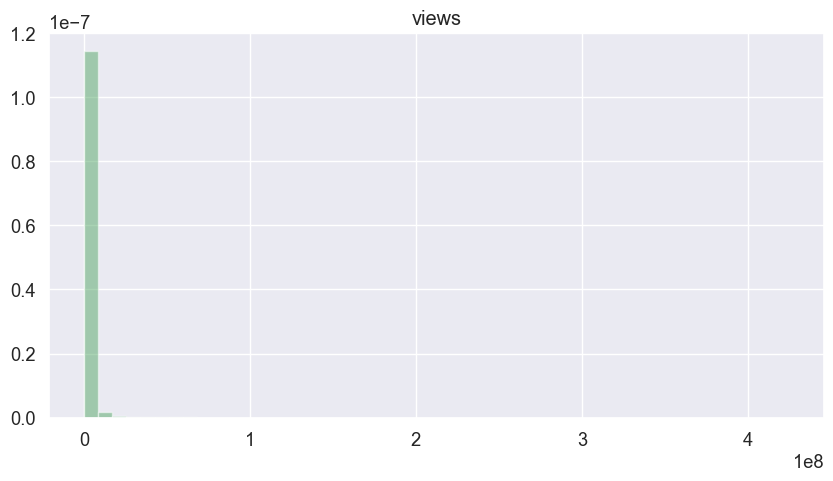

In [60]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

plt.hist(x=df['views'], bins=50, density=True, facecolor='g', alpha=0.5)
plt.title('views')
plt.show()

In [61]:
df['views'].describe()

count    3.633720e+05
mean     1.343185e+06
std      7.192440e+06
min      1.170000e+02
25%      4.629750e+04
50%      1.762810e+05
75%      6.500228e+05
max      4.245389e+08
Name: views, dtype: float64

In [62]:
print('Mediana:', df['views'].median())

Mediana: 176281.0


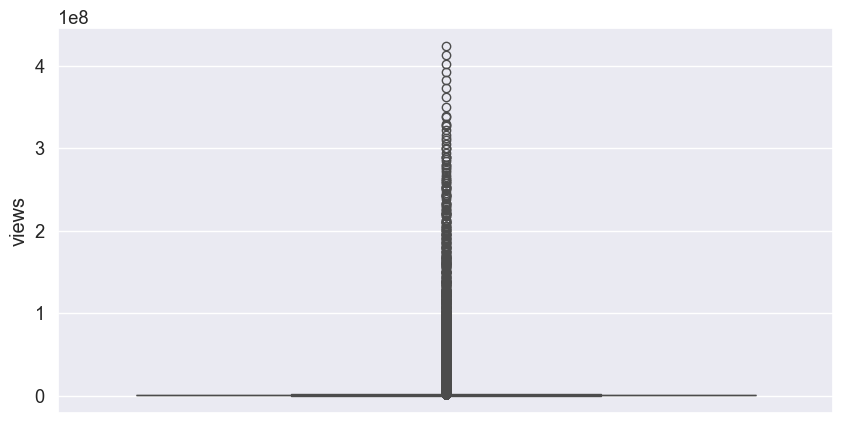

In [63]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

sns.boxplot(y=df['views'])
plt.show()

<b>likes</b>

Valores entre 0 y 5,6 millones, el más repetido tiene sólo un 1,9% de apariciones, y es el cero.<br>
Mediana en 3.500, valores concentrados en los más bajos.<br>
Muchos valores extremos por arriba. Como la variable indica el número de 'me gusta' de la publicación, todos los valores son válidos y mantenemos los extremos.

In [64]:
df['likes'].value_counts(normalize=True)

likes
0         0.018829
29        0.000746
36        0.000718
35        0.000716
38        0.000696
            ...   
140769    0.000003
92958     0.000003
90969     0.000003
191675    0.000003
357079    0.000003
Name: proportion, Length: 73693, dtype: float64

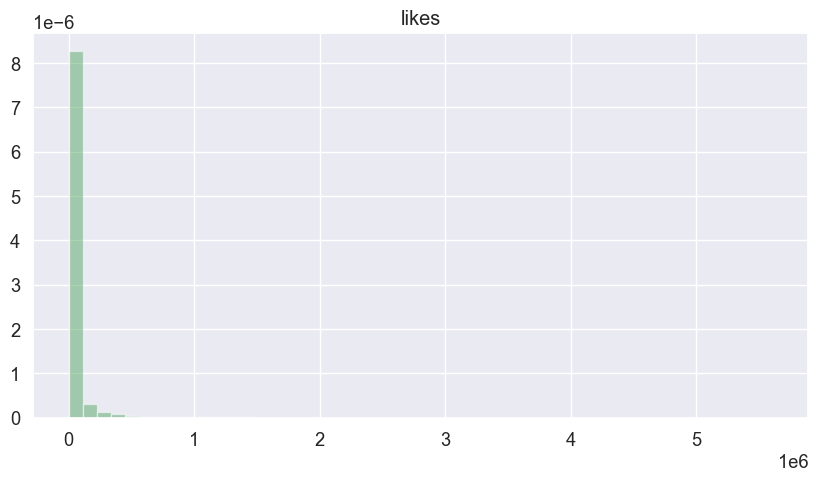

In [65]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

plt.hist(x=df['likes'], bins=50, density=True, facecolor='g', alpha=0.5)
plt.title('likes')
plt.show()

In [66]:
df['likes'].describe()

count    3.633720e+05
mean     3.841334e+04
std      1.661261e+05
min      0.000000e+00
25%      6.730000e+02
50%      3.516000e+03
75%      1.785950e+04
max      5.613827e+06
Name: likes, dtype: float64

In [67]:
print('Mediana:', df['likes'].median())

Mediana: 3516.0


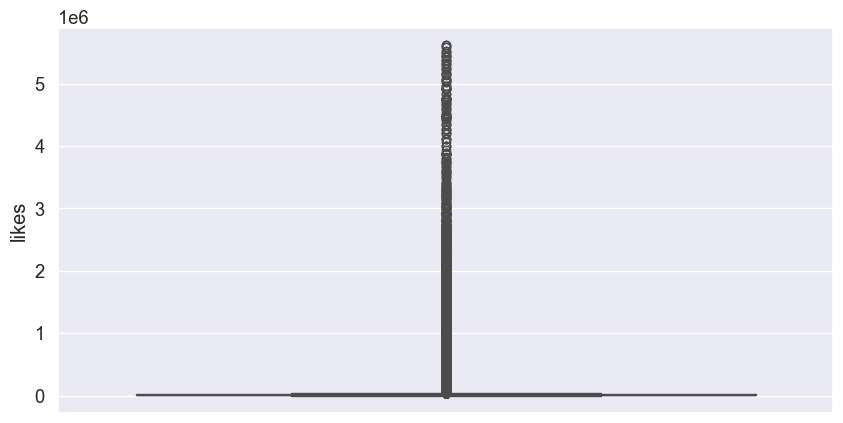

In [68]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

sns.boxplot(y=df['likes'])
plt.show()

<b>dislikes</b>

Valores entre 0 y 1,9 millones, el más repetido tiene sólo un 2,5% de apariciones, y es el cero.<br>
Mediana en 179, valores muy concentrados en los más bajos.<br>
Muchos valores extremos por arriba. Como la variable indica el número de 'no me gusta' de la publicación, todos los valores son válidos y mantenemos los extremos.

In [69]:
df['dislikes'].value_counts(normalize=True)

dislikes
0         0.025255
5         0.009051
3         0.008856
4         0.008784
2         0.008655
            ...   
35487     0.000003
39936     0.000003
119683    0.000003
6896      0.000003
212976    0.000003
Name: proportion, Length: 16715, dtype: float64

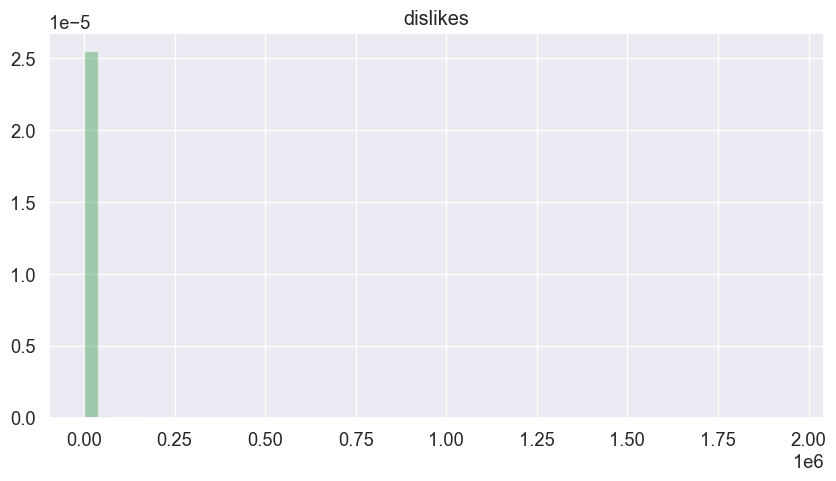

In [70]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

plt.hist(x=df['dislikes'], bins=50, density=True, facecolor='g', alpha=0.5)
plt.title('dislikes')
plt.show()

In [71]:
df['dislikes'].describe()

count    3.633720e+05
mean     2.156429e+03
std      2.284087e+04
min      0.000000e+00
25%      4.100000e+01
50%      1.790000e+02
75%      7.530000e+02
max      1.944971e+06
Name: dislikes, dtype: float64

In [72]:
print('Mediana:', df['dislikes'].median())

Mediana: 179.0


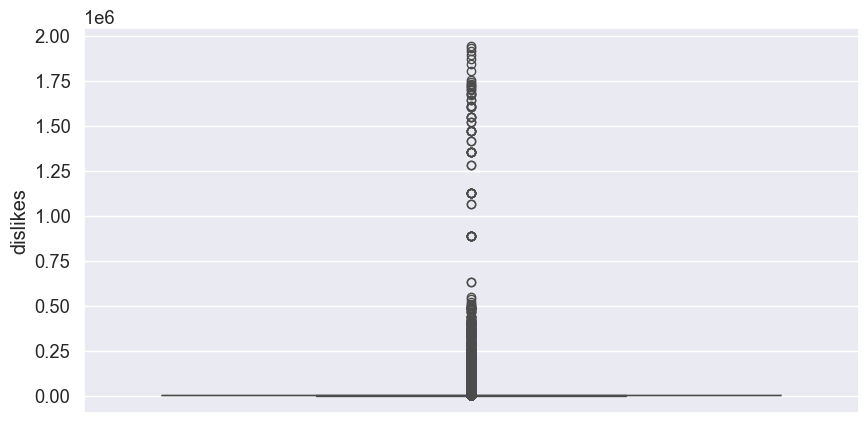

In [73]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

sns.boxplot(y=df['dislikes'])
plt.show()

<b>comment_count</b>

Valores entre 0 y 1,6 millones, el más repetido tiene sólo un 2,8% de apariciones, y es el cero.<br>
Mediana en 518, valores muy concentrados en los más bajos.<br>
Muchos valores extremos por arriba. Como la variable indica el número de comentarios de la publicación, todos los valores son válidos y mantenemos los extremos.

In [74]:
df['comment_count'].value_counts(normalize=True)

comment_count
0         0.027886
2         0.004378
1         0.004334
3         0.004299
4         0.004227
            ...   
33054     0.000003
15581     0.000003
26361     0.000003
91086     0.000003
144795    0.000003
Name: proportion, Length: 24477, dtype: float64

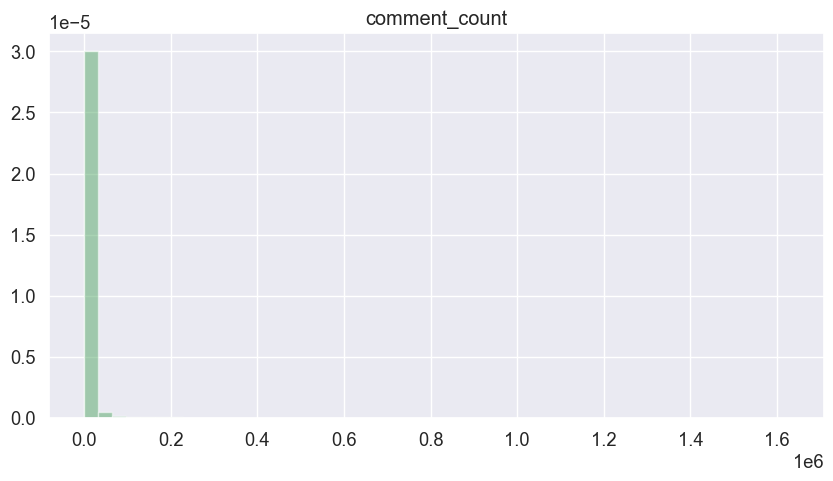

In [75]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

plt.hist(x=df['comment_count'], bins=50, density=True, facecolor='g', alpha=0.5)
plt.title('comment_count')
plt.show()

In [76]:
df['comment_count'].describe()

count    3.633720e+05
mean     4.303169e+03
std      2.542733e+04
min      0.000000e+00
25%      1.090000e+02
50%      5.180000e+02
75%      2.047000e+03
max      1.626501e+06
Name: comment_count, dtype: float64

In [77]:
print('Mediana:', df['comment_count'].median())

Mediana: 518.0


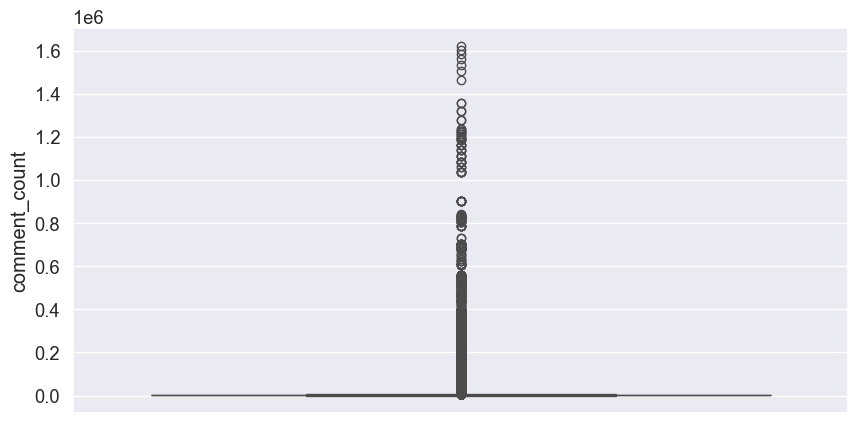

In [78]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

sns.boxplot(y=df['comment_count'])
plt.show()

<b>ratio_viralidad</b>

Nueva variable, calculada a partir de las variables numéricas anteriores. Su valor se encuentra entre 0 y 1.<br>
El valor más repetido es el cero con menos del 0,1% de apariciones.<br>
Mediana en torno a 0,03, con los valores concentrados por debajo de 0,2.<br>
Muchos valores extremos por arriba, que mantenemos ya que hemos mantenido los de las variables a partir de las que se ha calculado este ratio.

In [79]:
df['ratio_viralidad'].value_counts(normalize=True)

ratio_viralidad
0.000000    0.006310
0.142857    0.000022
0.024390    0.000022
0.105026    0.000022
0.125000    0.000022
              ...   
0.027319    0.000003
0.016246    0.000003
0.118198    0.000003
0.024854    0.000003
0.069362    0.000003
Name: proportion, Length: 331121, dtype: float64

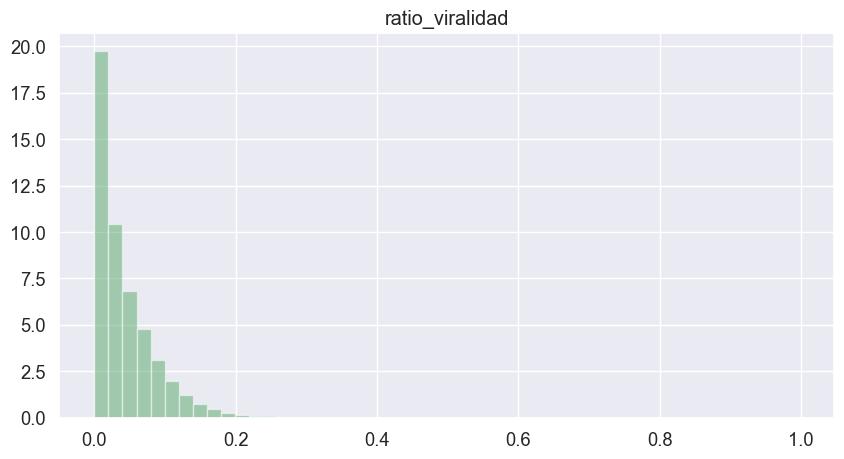

In [80]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

plt.hist(x=df['ratio_viralidad'], bins=50, density=True, facecolor='g', alpha=0.5)
plt.title('ratio_viralidad')
plt.show()

In [81]:
df['ratio_viralidad'].describe()

count    363372.000000
mean          0.043841
std           0.045606
min           0.000000
25%           0.011591
50%           0.029005
75%           0.061923
max           0.996741
Name: ratio_viralidad, dtype: float64

In [82]:
print('Mediana:', df['ratio_viralidad'].median())

Mediana: 0.029005076542892808


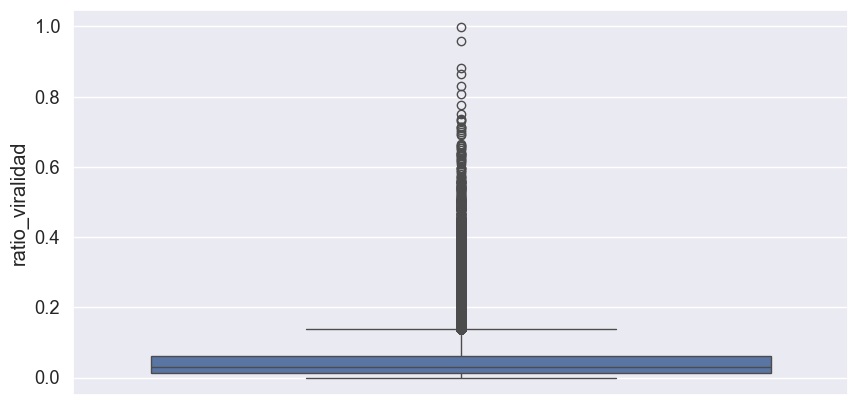

In [83]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

sns.boxplot(y=df['ratio_viralidad'])
plt.show()

<b>ratio_interaccion_dia</b>

Nueva variable, calculada a partir de las variables numéricas anteriores.<br>
Valores entre 0 y 3.000.<br>
El valor más repetido es el cero con sólo un 0,6% de apariciones.<br>
Mediana en torno a 1,93, con los valores concentrados por debajo de 0,4.<br>
Muchos valores extremos por arriba, que mantenemos ya que hemos mantenido los de las variables a partir de las que se ha calculado este ratio.

In [84]:
df['ratio_interaccion_dia'].value_counts(normalize=True)

ratio_interaccion_dia
0.000000      0.006310
0.500000      0.000080
1.000000      0.000069
0.111111      0.000063
0.142857      0.000052
                ...   
9.339754      0.000003
29.671581     0.000003
19.873874     0.000003
0.879098      0.000003
307.198109    0.000003
Name: proportion, Length: 303069, dtype: float64

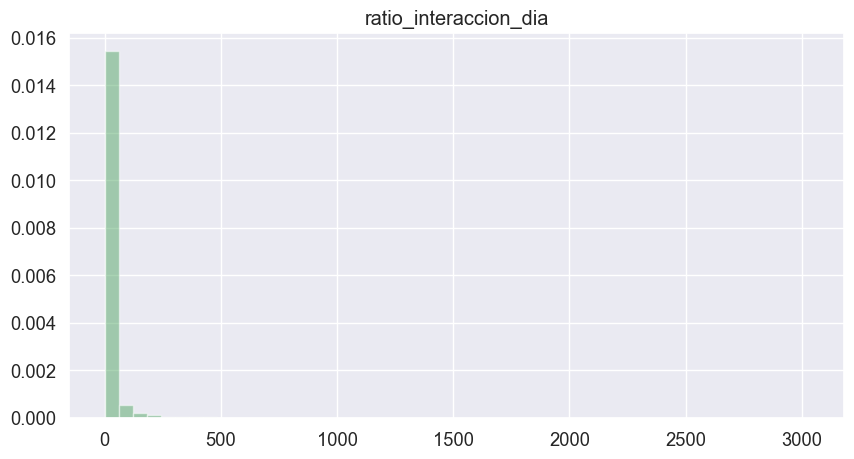

In [85]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

plt.hist(x=df['ratio_interaccion_dia'], bins=50, density=True, facecolor='g', alpha=0.5)
plt.title('ratio_interaccion_dia')
plt.show()

In [86]:
df['ratio_interaccion_dia'].describe()

count    363372.000000
mean         18.711041
std          83.321909
min           0.000000
25%           0.392573
50%           1.896312
75%           8.908709
max        3030.685297
Name: ratio_interaccion_dia, dtype: float64

In [87]:
print('Mediana:', df['ratio_interaccion_dia'].median())

Mediana: 1.8963123644251627


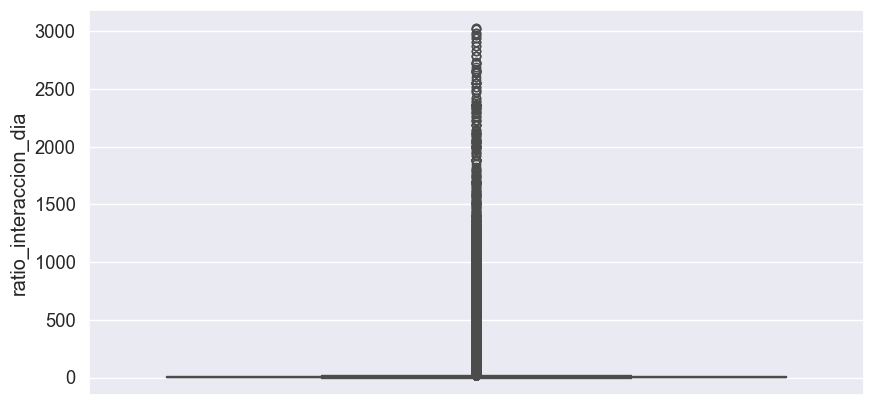

In [88]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

sns.boxplot(y=df['ratio_interaccion_dia'])
plt.show()

<b>trending_date</b>

Vamos a ver ahora las variables de año y mes de trending_date, y posteriormente en el apartado de variables categóricas estudiaremos la variable original completa.

- year<br>
Dos únicos valores, 2017 y 2018, con más del 76% concentrados en 2018.

In [89]:
df['trending_date_year'].value_counts(normalize=True)

trending_date_year
2018    0.76818
2017    0.23182
Name: proportion, dtype: float64

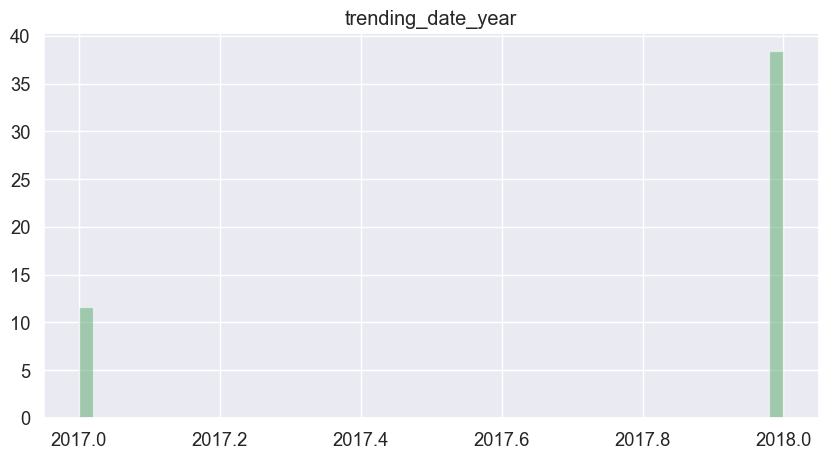

In [90]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

plt.hist(x=df['trending_date_year'], bins=50, density=True, facecolor='g', alpha=0.5)
plt.title('trending_date_year')
plt.show()

In [91]:
df['trending_date_year'].describe()

count    363372.000000
mean       2017.768180
std           0.421995
min        2017.000000
25%        2018.000000
50%        2018.000000
75%        2018.000000
max        2018.000000
Name: trending_date_year, dtype: float64

In [92]:
print('Mediana:', df['trending_date_year'].median())

Mediana: 2018.0


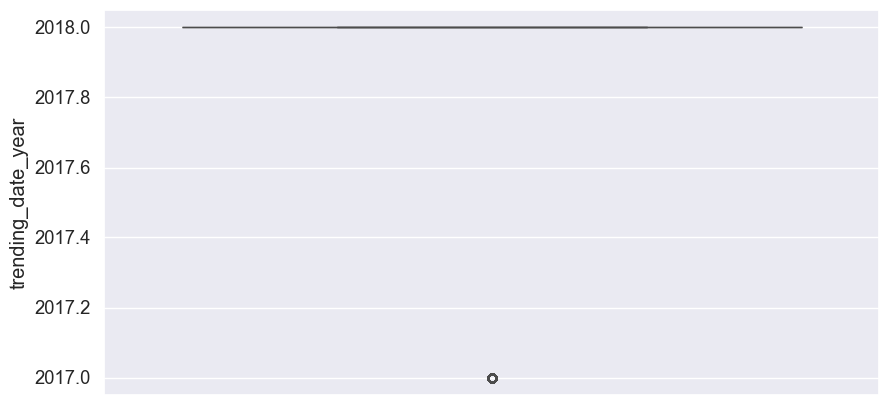

In [93]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

sns.boxplot(y=df['trending_date_year'])
plt.show()

- month<br>
Sin datos entre Julio y Octubre, y con muchos menos datos en Junio y Noviembre que en el resto de meses. Es posible que los datos de estos dos meses estén incompletos.

In [94]:
df['trending_date_month'].value_counts(normalize=True)

trending_date_month
3     0.154616
12    0.149489
5     0.147582
1     0.139237
2     0.138712
4     0.121336
11    0.082332
6     0.066697
Name: proportion, dtype: float64

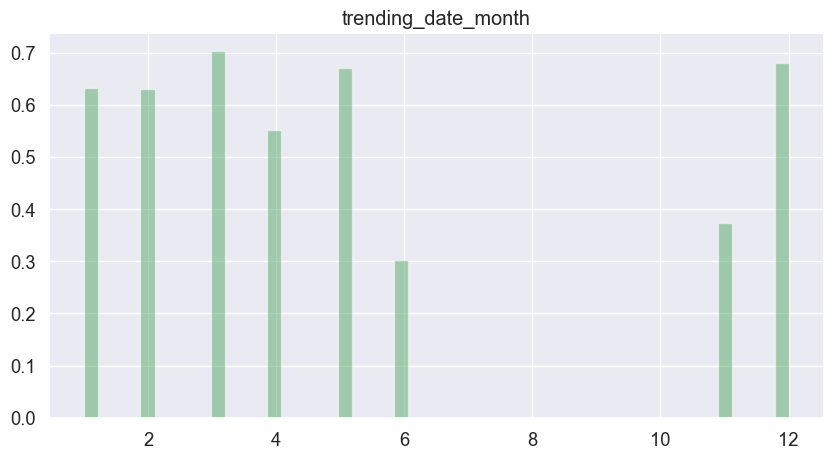

In [95]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

plt.hist(x=df['trending_date_month'], bins=50, density=True, facecolor='g', alpha=0.5)
plt.title('trending_date_month')
plt.show()

In [96]:
df['trending_date_month'].describe()

count    363372.000000
mean          5.203455
std           3.811854
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          12.000000
Name: trending_date_month, dtype: float64

In [97]:
print('Mediana:', df['trending_date_month'].median())

Mediana: 4.0


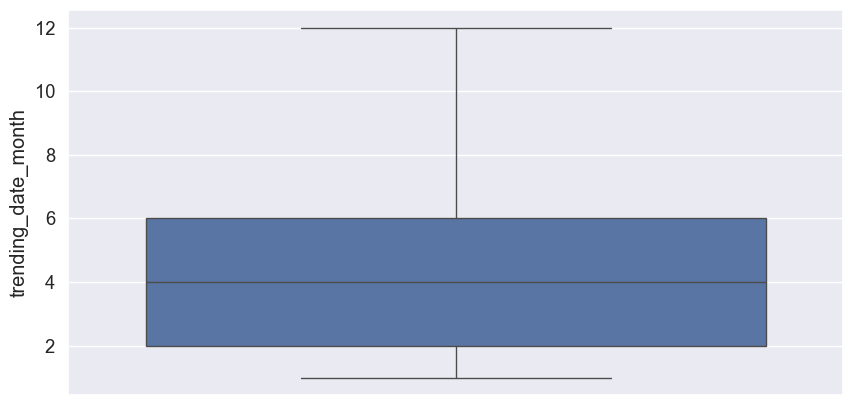

In [98]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

sns.boxplot(y=df['trending_date_month'])
plt.show()

<b>publish_time</b>

Vamos a ver ahora las variables de año y mes de publish_time, y posteriormente en el apartado de variables categóricas estudiaremos la variable original completa.

- year<br>
Datos entre 2006 y 2018, fuertemente concentrados en 2018 (más del 75%) y casi todos los demás en 2017 (más del 24%), es decir menos del 1% de los datos corresponden al periodo de 2006 a 2016.

In [99]:
df['publish_time_year'].value_counts(normalize=True)

publish_time_year
2018    0.753459
2017    0.244036
2015    0.000435
2016    0.000421
2013    0.000350
2014    0.000333
2011    0.000322
2010    0.000171
2008    0.000162
2012    0.000118
2007    0.000102
2009    0.000088
2006    0.000003
Name: proportion, dtype: float64

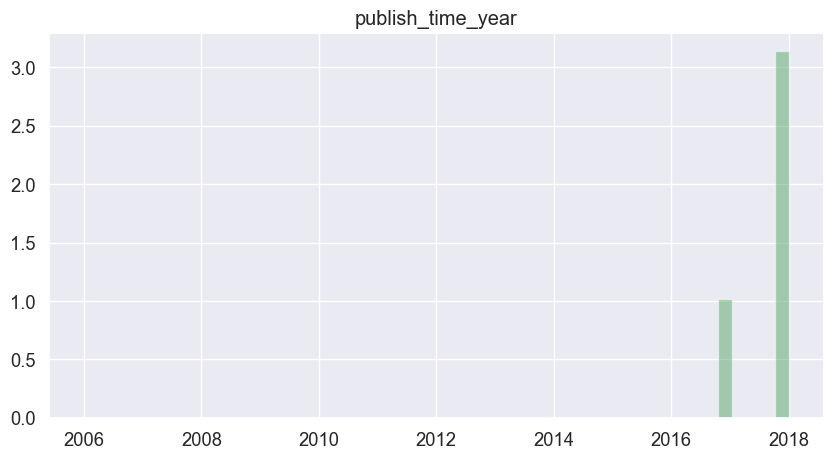

In [100]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

plt.hist(x=df['publish_time_year'], bins=50, density=True, facecolor='g', alpha=0.5)
plt.title('publish_time_year')
plt.show()

In [101]:
df['publish_time_year'].describe()

count    363372.000000
mean       2017.742839
std           0.514405
min        2006.000000
25%        2018.000000
50%        2018.000000
75%        2018.000000
max        2018.000000
Name: publish_time_year, dtype: float64

In [102]:
print('Mediana:', df['publish_time_year'].median())

Mediana: 2018.0


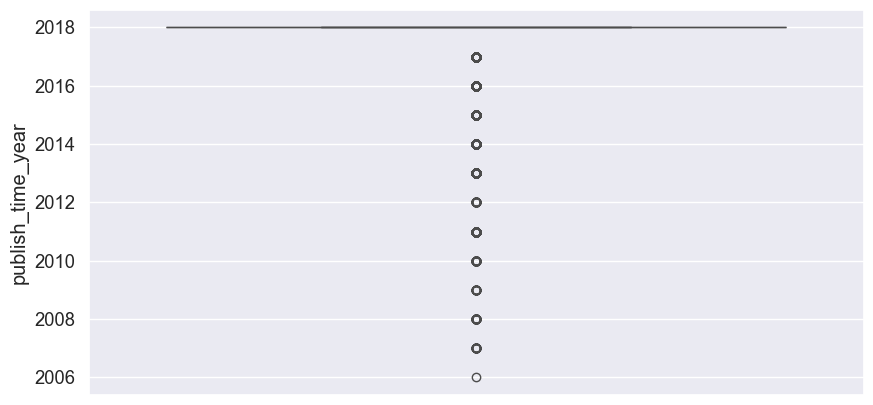

In [103]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

sns.boxplot(y=df['publish_time_year'])
plt.show()

- month<br>
En cuanto a los meses, ocurre como con trending_date, no hay datos entre Julio y Octubre y la cantidad de datos de Junio y Noviembre es muy inferior a la de otros meses. Como además hemos visto que los datos están concentrados en más del 99% entre 2017 y 2018 (en trending_date era el 100%), esto indica que los datos de Junio y Noviembre están incompletos, como sucedía en trending_date.

In [104]:
df['publish_time_month'].value_counts(normalize=True)

publish_time_month
3     0.155089
12    0.149291
5     0.147191
2     0.141778
1     0.138093
4     0.121958
11    0.094319
6     0.050785
10    0.000583
9     0.000394
8     0.000319
7     0.000201
Name: proportion, dtype: float64

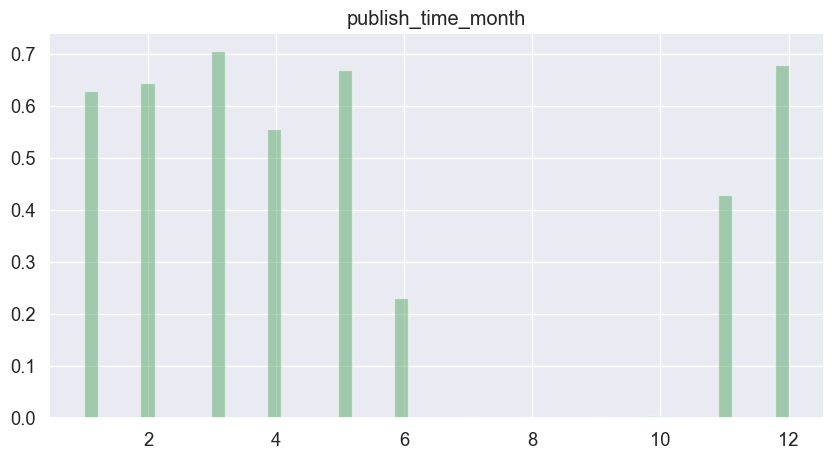

In [105]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

plt.hist(x=df['publish_time_month'], bins=50, density=True, facecolor='g', alpha=0.5)
plt.title('publish_time_month')
plt.show()

In [106]:
df['publish_time_month'].describe()

count    363372.000000
mean          5.257747
std           3.866197
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          12.000000
Name: publish_time_month, dtype: float64

In [107]:
print('Mediana:', df['publish_time_month'].median())

Mediana: 4.0


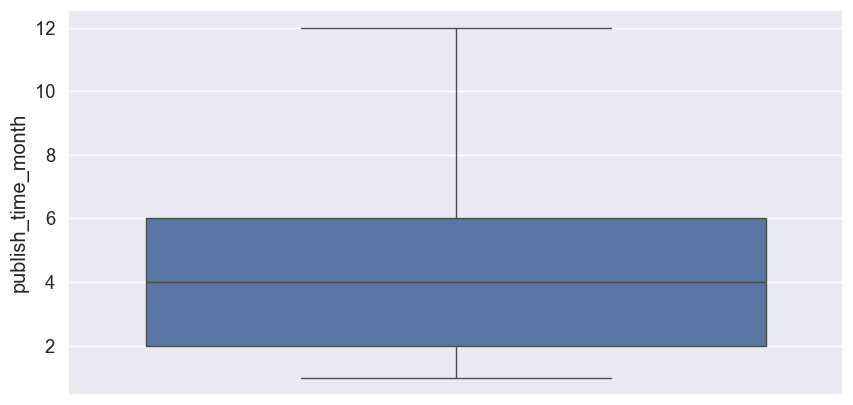

In [108]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

sns.boxplot(y=df['publish_time_month'])
plt.show()

### Variables categóricas

<b>category</b>

Categoría nominal con sólo 19 valores posibles.<br>
Todos los valores son válidos, aunque hay que destacar el valor 'categoría no encontrada en el fichero json'. Hay que recordar que esta variable proviene de un ID de categoría que enlazaba con un fichero json con todas las categorías. Este valor corresponde a los IDs de categoría que no tenían referencia válida en el fichero json. Mantenemos estos valores en el dataset.

In [109]:
df['category'].value_counts(normalize=True)

category
Entertainment                                 0.287768
People & Blogs                                0.143921
Music                                         0.114081
News & Politics                               0.098373
Comedy                                        0.071764
Sports                                        0.063392
Film & Animation                              0.055571
Howto & Style                                 0.051061
Gaming                                        0.030445
Science & Technology                          0.022203
Education                                     0.021135
Autos & Vehicles                              0.012874
Pets & Animals                                0.012456
categoría no encontrada en el fichero json    0.007458
Travel & Events                               0.004742
Shows                                         0.002502
Nonprofits & Activism                         0.000157
Movies                                        0.000083
T

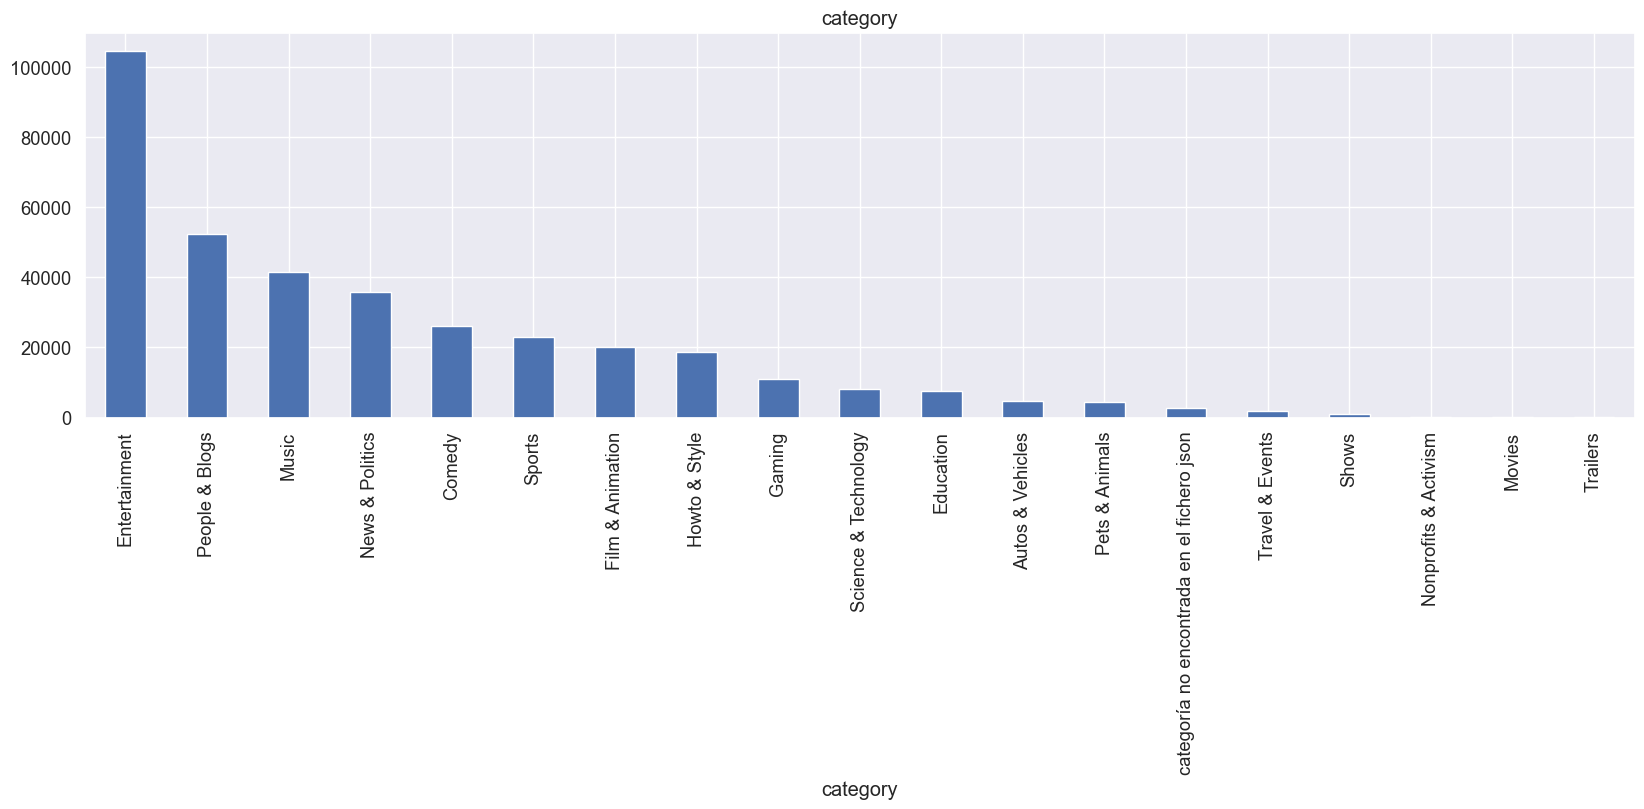

In [110]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 5))

df['category'].value_counts().plot.bar()
plt.title('category')
plt.show()

<b>country</b>

Categoría nominal, con 10 posibles valores distribuidos de manera bastante uniforme entre ellos.

In [111]:
df['country'].value_counts(normalize=True)

country
US    0.112560
CA    0.112505
DE    0.112392
FR    0.112072
RU    0.111987
MX    0.111186
GB    0.106626
IN    0.091061
KR    0.088755
JP    0.040856
Name: proportion, dtype: float64

In [112]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

df['country'].value_counts().plot.pie()
plt.title('country')
plt.show()

<b>comments_disabled</b>

Categórica binaria con casi un 98% de False.

In [113]:
df['comments_disabled'].value_counts(normalize=True)

comments_disabled
False    0.97824
True     0.02176
Name: proportion, dtype: float64

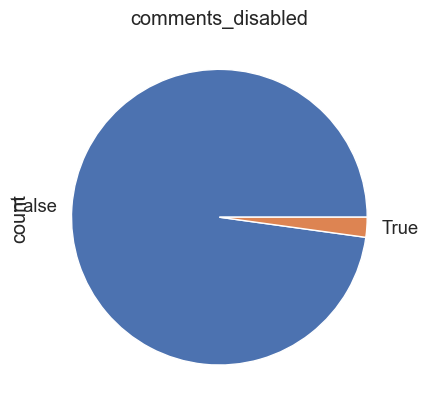

In [114]:
df['comments_disabled'].value_counts().plot.pie()
plt.title('comments_disabled')
plt.show()

<b>ratings_disabled</b>

Categórica binaria con más de un 98% de False.

In [115]:
df['ratings_disabled'].value_counts(normalize=True)

ratings_disabled
False    0.981366
True     0.018634
Name: proportion, dtype: float64

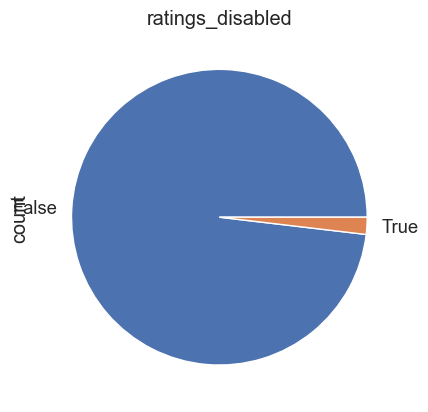

In [116]:
df['ratings_disabled'].value_counts().plot.pie()
plt.title('ratings_disabled')
plt.show()

<b>channel_title</b>

Categórica nominal con un 51,9% de valores únicos, como vimos, y el valor más repetido no llega al 0,3%, lo que indica que son valores muy dispersos.<br>
No vamos a graficar esta variable directamente, sino a graficar alguna de sus características.

In [117]:
df['channel_title'].value_counts(normalize=True)

channel_title
The Late Show with Stephen Colbert        0.002672
WWE                                       0.002166
Late Night with Seth Meyers               0.002119
TheEllenShow                              0.002028
The Tonight Show Starring Jimmy Fallon    0.001926
                                            ...   
Narins Beauty                             0.000003
marko curic                               0.000003
Thomas Koppe                              0.000003
TSG Hoffenheim                            0.000003
ã¯ã­ãã¡ãã£ã¢                     0.000003
Name: proportion, Length: 38155, dtype: float64

In [118]:
# gráfica de los N valores más comunes
N = 10
top_n = df['channel_title'].value_counts().nlargest(N)

sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

top_n.plot(kind='bar', color='skyblue')
plt.title(f'{N} valores más comunes de "channel_title"')
plt.ylabel('Frecuencia')
plt.show()

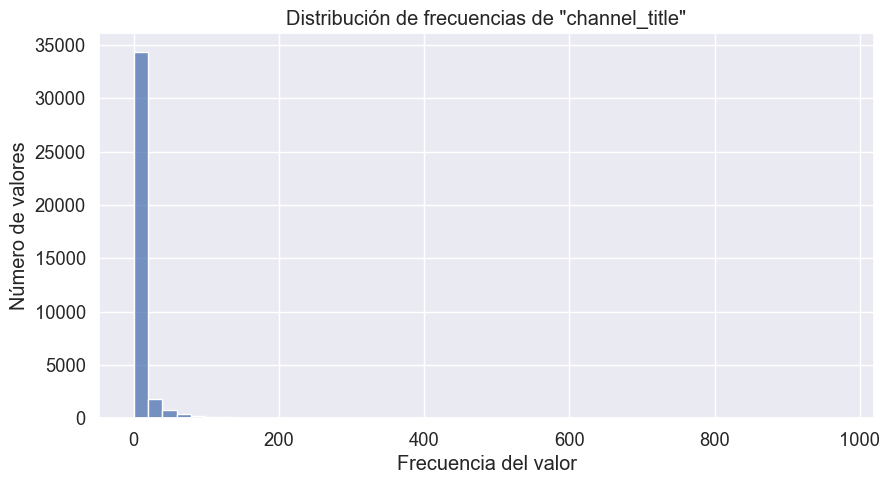

In [119]:
# gráfica de la distribución de la frecuencia de los valores
freq_counts = df['channel_title'].value_counts()

sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

sns.histplot(freq_counts, bins=50, kde=False)
plt.title(f'Distribución de frecuencias de "channel_title"')
plt.xlabel('Frecuencia del valor')
plt.ylabel('Número de valores')
plt.show()

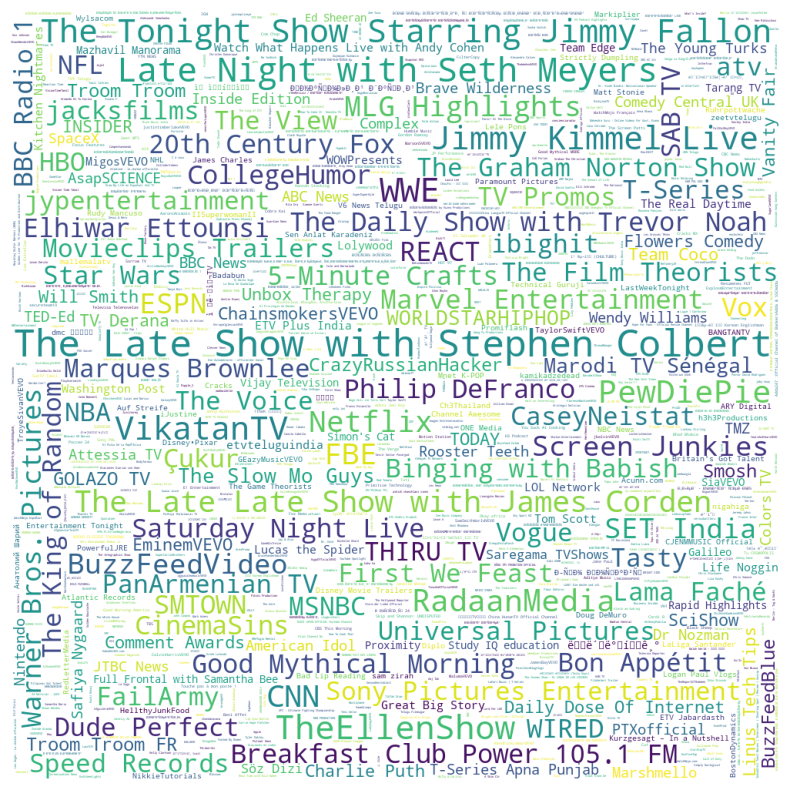

In [120]:
# gráfica de nube de palabras
wordcloud = WordCloud(background_color="white", max_words=2000, stopwords=STOPWORDS, max_font_size=60, width=1000, height=1000)
wordcloud.generate_from_frequencies(freq_counts)

plt.imshow(wordcloud)
plt.axis('off')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

<b>tags</b>

Categórica nominal, 39,6% de valores únicos. Además, cada valor está compuesto a su vez de varios valores individuales separados por el carácter "|".<br>
Como con channel_title, vamos a graficar características de esta variable.

In [121]:
df['tags'].value_counts(normalize=True)

tags
[none]                                                                                                                                                                                                                                                                                                                                                                                             0.099680
The Late Show|"Stephen Colbert"|"Colbert"|"Late Show"|"celebrities"|"late night"|"talk show"|"skits"|"bit"|"monologue"|"The Late Late Show"|"Late Late Show"|"letterman"|"david letterman"|"comedian"|"impressions"|"CBS"|"joke"|"jokes"|"funny"|"funny video"|"funny videos"|"humor"|"celebrity"|"celeb"|"hollywood"|"famous"|"James Corden"|"Corden"|"Comedy"                                    0.000938
Vaani rani|"rani"|"Radhika in funny character"|"venu aravind"|"SunTV"|"VaniRani"|"vani"|"vaani"|"Radhika's dual role serial"|"Ranimma veetu kuripu"|"Radhika as lawyer in serial"|"radikaa"|"rathika"|"Radh

Lo primero, vamos a descomponer la variable en los valores separados.

In [122]:
valores_separados_tags = df['tags'].str.split('|').explode()
conteo_valores = valores_separados_tags.value_counts()

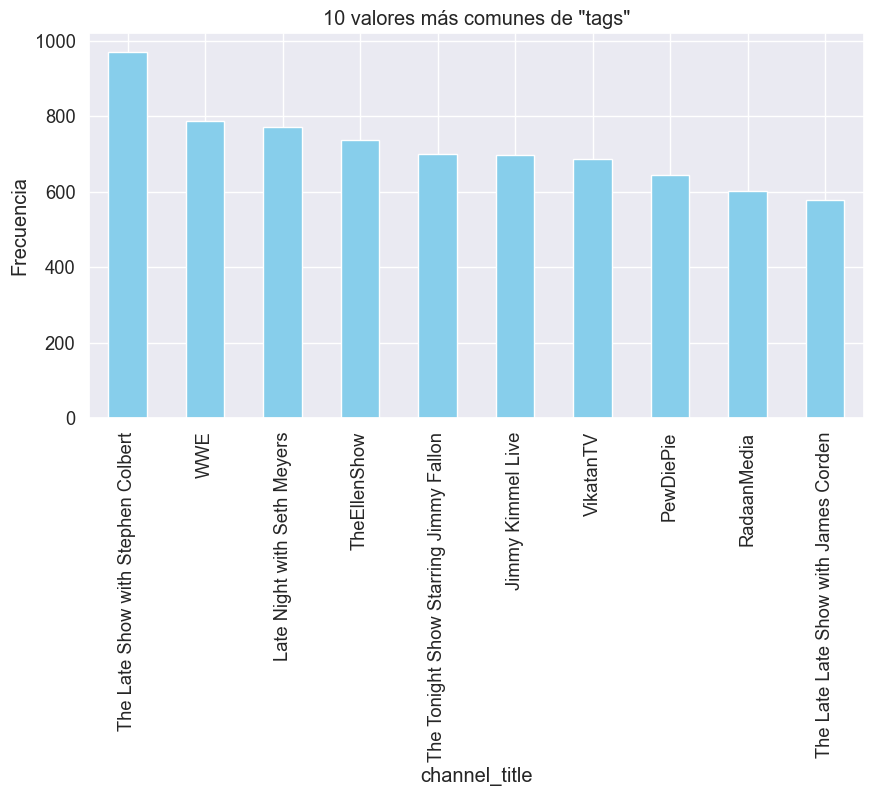

In [123]:
# gráfica de los N valores más comunes
N = 10
top_valores = conteo_valores.nlargest(N)

sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

top_n.plot(kind='bar', color='skyblue')
plt.title(f'{N} valores más comunes de "tags"')
plt.ylabel('Frecuencia')
plt.show()

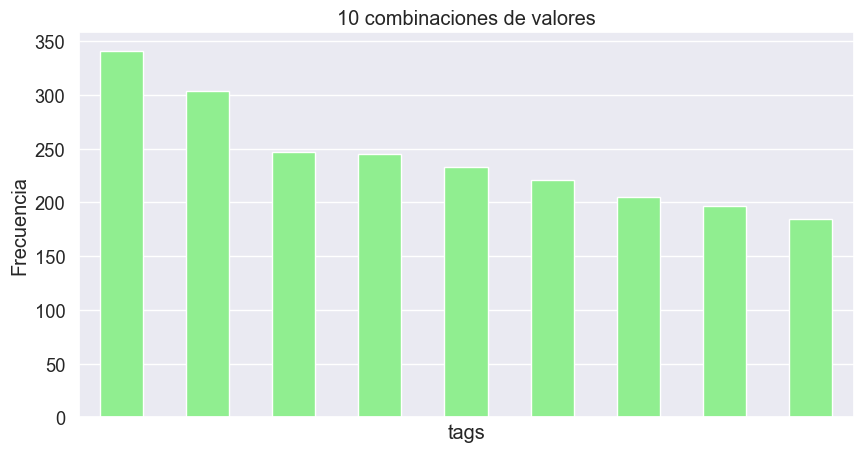

1: The Late Show|"Stephen Colbert"|"Colbert"|"Late Show"|"celebrities"|"late night"|"talk show"|"skits"|"bit"|"monologue"|"The Late Late Show"|"Late Late Show"|"letterman"|"david letterman"|"comedian"|"impressions"|"CBS"|"joke"|"jokes"|"funny"|"funny video"|"funny videos"|"humor"|"celebrity"|"celeb"|"hollywood"|"famous"|"James Corden"|"Corden"|"Comedy"
2: Vaani rani|"rani"|"Radhika in funny character"|"venu aravind"|"SunTV"|"VaniRani"|"vani"|"vaani"|"Radhika's dual role serial"|"Ranimma veetu kuripu"|"Radhika as lawyer in serial"|"radikaa"|"rathika"|"Radhika's new"
3: best vines 2018|"funny vines"|"funny videos"|"funniest videos 2018"
4: James Corden|"The Late Late Show"|"Colbert"|"late night"|"late night show"|"Stephen Colbert"|"Comedy"|"monologue"|"comedian"|"impressions"|"celebrities"|"carpool"|"karaoke"|"CBS"|"Late Late Show"|"Corden"|"joke"|"jokes"|"funny"|"funny video"|"funny videos"|"humor"|"celebrity"|"celeb"|"hollywood"|"famous"
5: flowers tv|"uppum mulakum"|"uppum"|"biju sopa

In [124]:
# gráfica de las combinaciones más comunes
combinaciones_valores = df['tags'].value_counts().nlargest(N)

# la combinación más repetida con diferencia es que la variable no contenga ningún valor; la eliminamos del gráfico
combinaciones_valores = combinaciones_valores.drop(combinaciones_valores.idxmax())

sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

combinaciones_valores.plot(kind='bar', color='lightgreen')
plt.title(f'{N} combinaciones de valores')
plt.ylabel('Frecuencia')
plt.xticks([])
plt.show()

# mostramos aparte las etiquetas del eje x
for i, label in enumerate(combinaciones_valores.index):
    print(f'{i+1}: {label}')

In [125]:
# gráfica de la distribución del número de valores individuales por registro
num_var_por_reg = df['tags'].str.split('|').apply(len)

sns.set(font_scale=1.2)
plt.figure(figsize=(20, 5))

sns.histplot(num_var_por_reg, bins=range(1, num_var_por_reg.max() + 1), kde=False)
plt.title('Distribución del número de valores por registro')
plt.xlabel('Número de valores')
plt.ylabel('Número de registros')
plt.show()

<b>trending_date</b><br>
En el apartado de variables numéricas hemos estudiado las variables de año y día de trending_date. Ahora vamos a ver la variable original completa.

Categórica ordinal de fechas, sólo 25 valores únicos.<br>
Vamos a graficar alguna de sus características.<br>
Considero que la hora en la que la publicación se hizo tendencia no va a ser relevante, sólo la fecha.

Valores muy repartidos, el más común tiene sólo el 0,05% de repeticiones, menos de 1.900 ocurrencias. La mayoría de valores está por encima de las 1.700 repeticiones.<br>
En el tiempo la distribución comienza a finales de 2017 y es ligeramente descendente, con un incremento a primeros de 2018 que volvió a descender a mediados de año.<br>
No se detectan valores extremos.

In [126]:
df[['trending_date', 'trending_date_str', 'trending_date_year', 'trending_date_month']].head()

trending_date trending_date_str  trending_date_year  trending_date_month
0    2017-11-14        2017-11-14                2017                   11
1    2017-11-14        2017-11-14                2017                   11
2    2017-11-14        2017-11-14                2017                   11
3    2017-11-14        2017-11-14                2017                   11
4    2017-11-14        2017-11-14                2017                   11

In [127]:
df['trending_date_str'].value_counts(normalize=True)

trending_date_str
2018-02-12    0.005182
2018-03-06    0.005174
2018-02-20    0.005171
2018-02-17    0.005149
2018-03-13    0.005138
                ...   
2018-02-02    0.004362
2018-05-19    0.004233
2018-03-15    0.004169
2018-05-14    0.004089
2018-05-20    0.004043
Name: proportion, Length: 205, dtype: float64

In [128]:
print('Periodo de fechas de trending_date: del', df['trending_date_str'].min(), 'al', df['trending_date_str'].max())

Periodo de fechas de trending_date: del 2017-11-14 al 2018-06-14


In [129]:
# gráfica de las N fechas más comunes
N = 25
top_n = df['trending_date_str'].value_counts().nlargest(N)

sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

top_n.plot(kind='bar', color='skyblue')
plt.title(f'{N} fechas más comunes de "trending_date"')
plt.ylabel('Frecuencia')
plt.show()

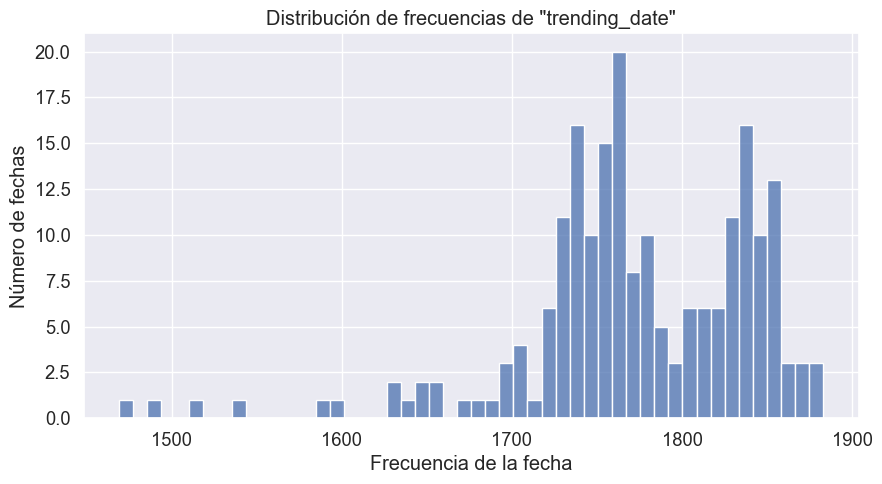

In [130]:
# gráfica de la distribución de la frecuencia de las fechas
freq_counts = df['trending_date_str'].value_counts()

sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

sns.histplot(freq_counts, bins=50, kde=False)
plt.title(f'Distribución de frecuencias de "trending_date"')
plt.xlabel('Frecuencia de la fecha')
plt.ylabel('Número de fechas')
plt.show()

In [131]:
# gráfica de distribución temporal
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 5))

df['trending_date_str'].value_counts().sort_index().plot(kind='line')
plt.title('Distribución temporal de fechas de "trending_date"')
plt.xlabel('Fecha')
plt.ylabel('Número de Registros')
plt.show()

<Figure size 1000x500 with 0 Axes>

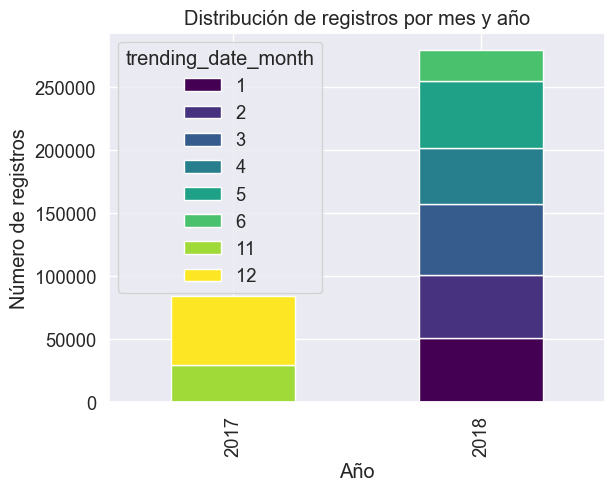

In [132]:
# gráfica de distribución por mes y año

#sns.set(font_scale=1.2)

plt.figure(figsize=(10, 5))

#plt.figure(figsize=(20, 10))

df.groupby(['trending_date_year', 'trending_date_month']).size().unstack().plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribución de registros por mes y año')
plt.xlabel('Año')
plt.ylabel('Número de registros')
plt.show()

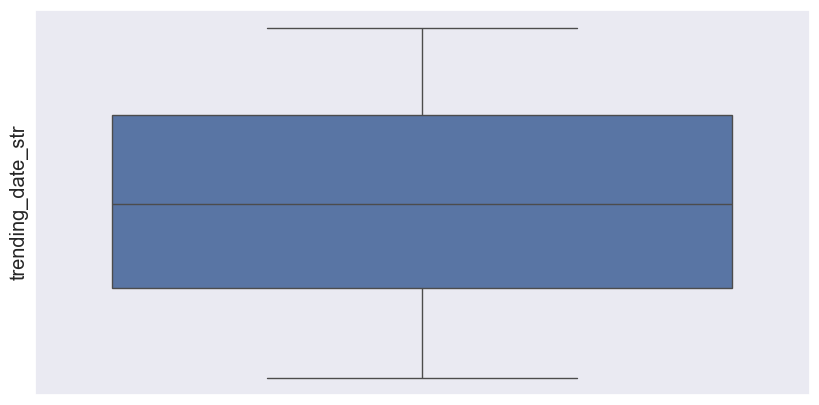

In [133]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

sns.boxplot(y=df['trending_date_str'])
plt.yticks([])
plt.show()

<b>publish_time</b><br>
En el apartado de variables numéricas hemos estudiado las variables de año y día de publish_time. Ahora vamos a ver la variable original completa.

Categórica ordinal de fechas, 46,6% de valores únicos.<br>
Vamos a graficar sólo alguna de sus características.<br>
Considero que la hora en la que se realizó la publicación no va a ser relevante, sólo la fecha.

Valores muy repartidos, el más común tiene sólo el 0,07% de repeticiones, con dos fechas que destacan ligeramente del resto. La mayoría de fechas tienen una muy baja tasa de repetición.<br>
La actividad es muy baja hasta finales de 2017, a partir de ese momento se produce un incremento significativo en el número de publicaciones. Podemos considerar que los valores de 2006 a 2016 son valores extremos.<br>
La coincidencia de que trending_date comience a finales de 2017 y de que publish_time tenga valores muy bajos hasta esas mismas fechas podría indicar o bien un incremento de la actividad o bien que previamente no se guardaran todos los datos de la actividad.

In [134]:
df[['publish_time', 'publish_time_str', 'publish_time_year', 'publish_time_month']].head()

publish_time publish_time_str  publish_time_year  publish_time_month
0 2017-11-10 17:00:03       2017-11-10               2017                  11
1 2017-11-13 17:00:00       2017-11-13               2017                  11
2 2017-11-12 19:05:24       2017-11-12               2017                  11
3 2017-11-12 18:01:41       2017-11-12               2017                  11
4 2017-11-09 11:04:14       2017-11-09               2017                  11

In [135]:
df['publish_time_str'].value_counts(normalize=True)

publish_time_str
2018-02-15    0.007395
2018-01-29    0.007340
2017-12-20    0.006467
2018-05-31    0.006420
2018-03-11    0.006343
                ...   
2016-05-18    0.000003
2010-10-21    0.000003
2010-03-04    0.000003
2013-04-05    0.000003
2016-10-13    0.000003
Name: proportion, Length: 609, dtype: float64

In [136]:
print('Periodo de fechas de publish_time: del', df['publish_time_str'].min(), 'al', df['publish_time_str'].max())

Periodo de fechas de publish_time: del 2006-07-23 al 2018-06-14


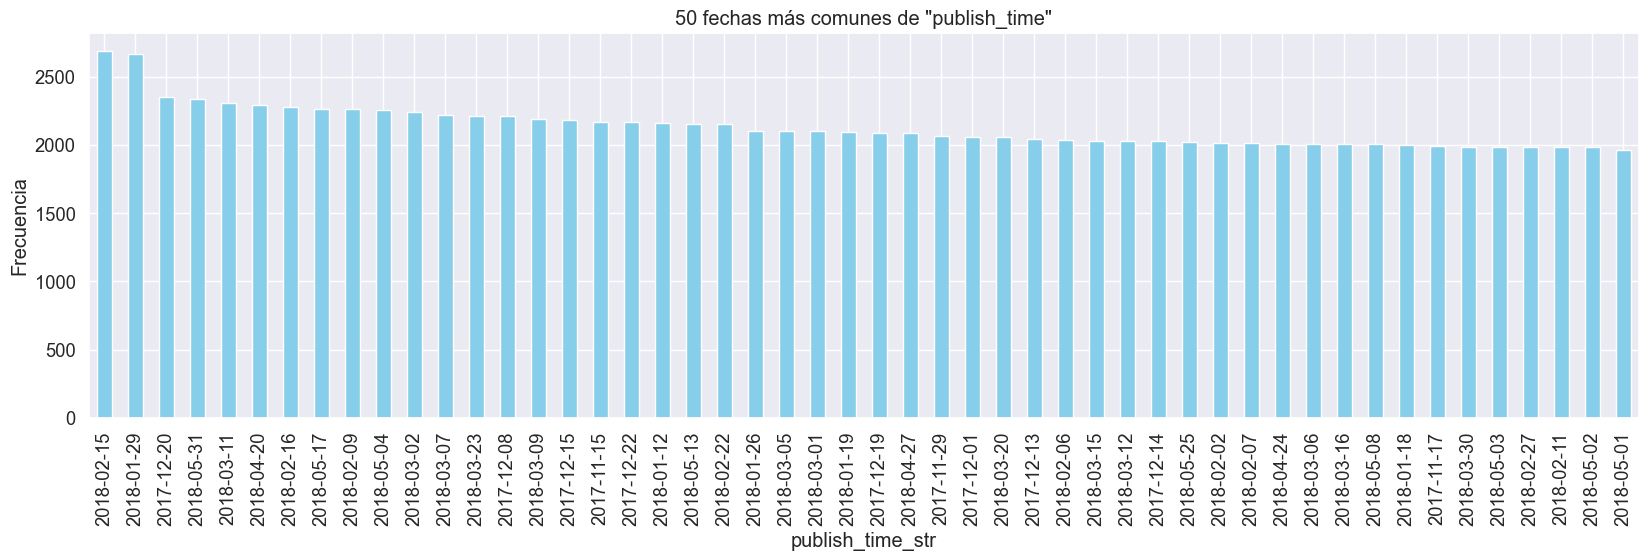

In [137]:
# gráfica de las N fechas más comunes
N = 50
top_n = df['publish_time_str'].value_counts().nlargest(N)

sns.set(font_scale=1.2)
plt.figure(figsize=(20, 5))

top_n.plot(kind='bar', color='skyblue')
plt.title(f'{N} fechas más comunes de "publish_time"')
plt.ylabel('Frecuencia')
plt.show()

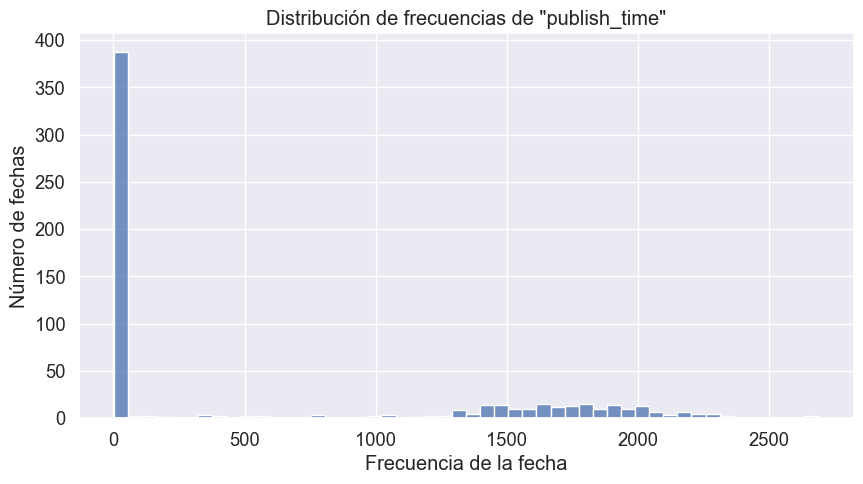

In [138]:
# gráfica de la distribución de la frecuencia de las fechas
freq_counts = df['publish_time_str'].value_counts()

sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))

sns.histplot(freq_counts, bins=50, kde=False)
plt.title(f'Distribución de frecuencias de "publish_time"')
plt.xlabel('Frecuencia de la fecha')
plt.ylabel('Número de fechas')
plt.show()

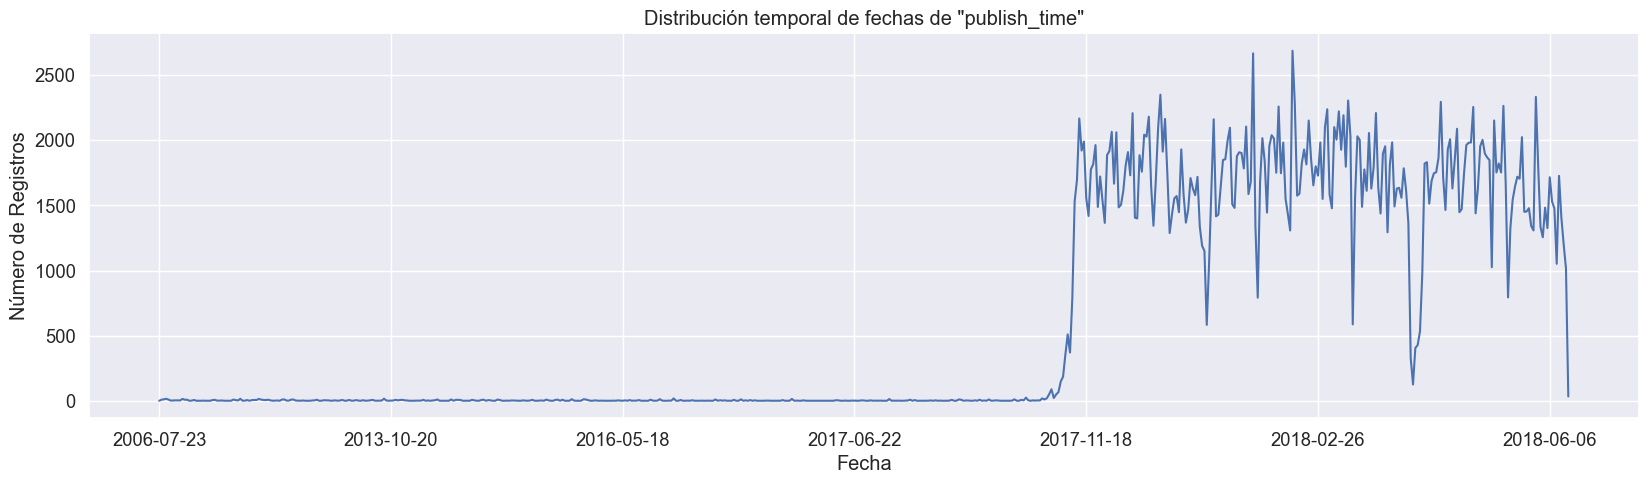

In [139]:
# gráfica de distribución temporal
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 5))

df['publish_time_str'].value_counts().sort_index().plot(kind='line')
plt.title('Distribución temporal de fechas de "publish_time"')
plt.xlabel('Fecha')
plt.ylabel('Número de Registros')
plt.show()

In [140]:
# gráfica de distribución por mes y año

#sns.set(font_scale=1.2)

plt.figure(figsize=(10, 5))

#plt.figure(figsize=(12, 6))

df.groupby(['publish_time_year', 'publish_time_month']).size().unstack().plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribución de registros por mes y año')
plt.xlabel('Año')
plt.ylabel('Número de registros')
plt.show()

<Figure size 1000x500 with 0 Axes>

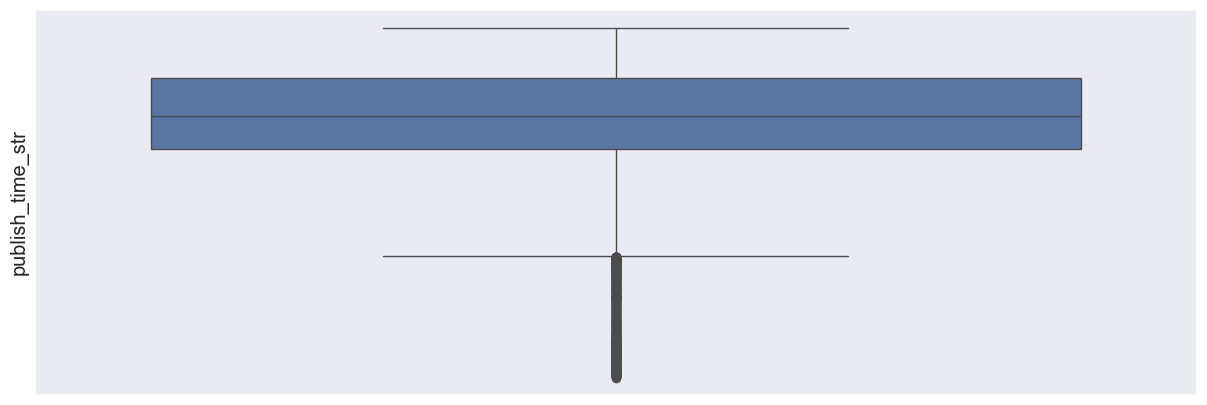

In [141]:

#sns.set(font_scale=1.2)

plt.figure(figsize=(15, 5))

sns.boxplot(y=df['publish_time_str'])
plt.yticks([])
plt.show()

<b>trending_date</b> y <b>publish_time</b>

Como vimos, publish_time, la fecha de publicación, tiene valores desde 2006 hasta 2018. Sin embargo, trending_date, fecha de tendencia, sólo tiene valores de Noviembre de 2017 a Junio de 2018.<br>
Entiendo que este hecho puede generar ruido en los algoritmos de Machine Learning. Vamos a ver si el año o el mes pueden tener algún tipo de relación con cada variable objetivo, y vamos a crear una nueva variable con el tiempo transcurrido en su caso entre la fecha de publicación y la fecha de tendencia, pero trending_date y publish_time como tales variables vamos a eliminarlas antes de aplicar los algoritmos.

<b>publish_trending_days</b><br>
Nueva variable: días transcurridos entre la fecha de publicación y la fecha de tendencia.

In [142]:
df['publish_trending_days'] = df.apply(lambda row: (row['trending_date'] - row['publish_time']).days, axis=1)
df[['publish_time_str', 'trending_date_str', 'publish_trending_days']]

publish_time_str trending_date_str  publish_trending_days
0            2017-11-10        2017-11-14                      3
1            2017-11-13        2017-11-14                      0
2            2017-11-12        2017-11-14                      1
3            2017-11-12        2017-11-14                      1
4            2017-11-09        2017-11-14                      4
...                 ...               ...                    ...
375937       2018-05-18        2018-06-14                     26
375938       2018-05-18        2018-06-14                     26
375939       2018-05-18        2018-06-14                     26
375940       2018-05-17        2018-06-14                     27
375941       2018-05-17        2018-06-14                     27

[363372 rows x 3 columns]

In [143]:
df['publish_trending_days'].value_counts(normalize=True)

publish_trending_days
 0       0.461739
 1       0.194255
 2       0.080180
-1       0.050326
 3       0.041836
           ...   
 2784    0.000003
 3412    0.000003
 749     0.000003
 750     0.000003
 1568    0.000003
Name: proportion, Length: 1029, dtype: float64

In [144]:
df['publish_trending_days'].describe()

count    363372.000000
mean          6.698078
std          99.016892
min          -1.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        4214.000000
Name: publish_trending_days, dtype: float64

In [145]:
print('Mediana:', df['publish_trending_days'].median())

Mediana: 0.0


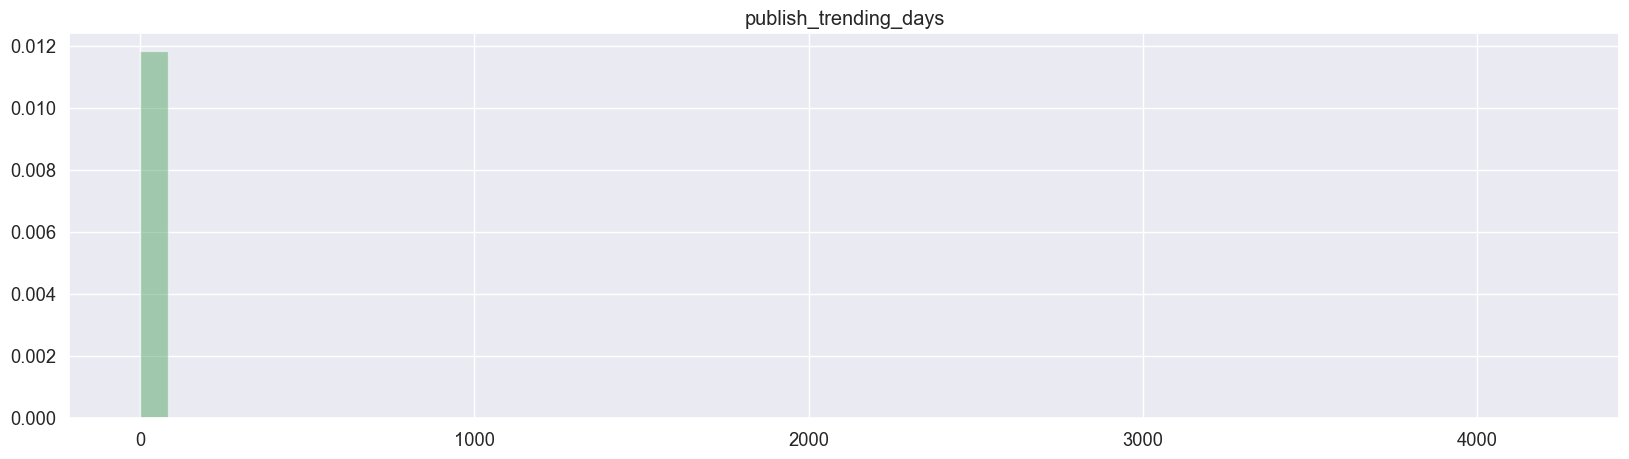

In [146]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 5))

plt.hist(x=df['publish_trending_days'], bins=50, density=True, facecolor='g', alpha=0.5)
plt.title('publish_trending_days')
plt.show()

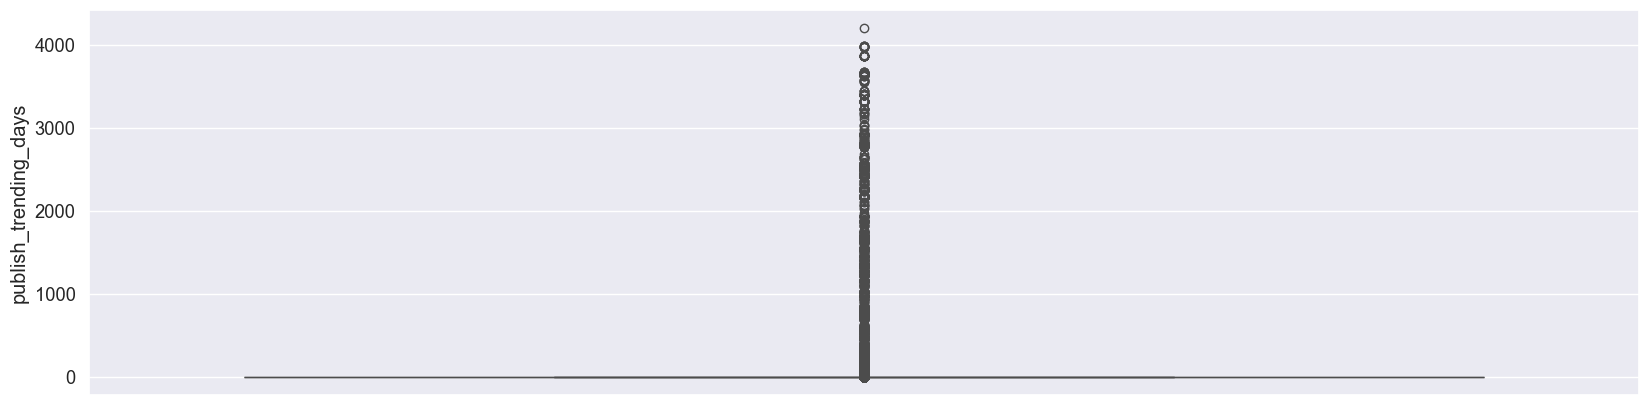

In [147]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 5))

sns.boxplot(y=df['publish_trending_days'])
plt.show()

Más del 46% de las publicaciones fueron tendencia el mismo día que se publicaron, y más del 19% lo fueron al día siguiente.<br>
Por otra parte, hay periodos de hasta 4.200 días entre publicación y tendencia y también hay periodos de -1 días, lo que apunta a que algunas de estas fechas de tendencia (un 0,3% de ellas) no sean reales.

In [148]:
valor_inferior = 0.05
valor_superior = 0.997
percentil_inferior = df['publish_trending_days'].quantile(valor_inferior)
percentil_superior = df['publish_trending_days'].quantile(valor_superior)
print('Percentil', valor_inferior, ':', percentil_inferior)
print('Percentil', valor_superior, ':', percentil_superior)

Percentil 0.05 : -1.0
Percentil 0.997 : 140.0


In [149]:
df[(df['publish_trending_days'] < percentil_inferior) | (df['publish_trending_days'] > percentil_superior)]

trending_date                                              title  \
114       2017-11-14  Grey's Anatomy - (It's the End of the World) -...   
161       2017-11-14                         Troydon bent - Jam African   
163       2017-11-14  Grey's Anatomy S10 Ep12 Jackson Stops The Wedding   
567       2017-11-16      Yung Dre ft V-Lo.. Guess Who (Studio session)   
1198      2017-11-19  Weird But Funny Moment With Angus And Malcolm ...   
...              ...                                                ...   
351093    2018-02-04                                  Magic Highway USA   
351140    2018-02-04            1980 toyota corolla liftback commercial   
351287    2018-02-05                   Budweiser - Original Whazzup? ad   
351289    2018-02-05  Man pouring drinks (Jagerbomb shots) with his ...   
351352    2018-02-05                                  Magic Highway USA   

                        channel_title        publish_time  \
114                         KatieWear 2009-02-13 06:17:12   
161                      Troydon bent 2016-12-08 19:29:25   
163                        Michelle 1 2014-09-03 21:24:07   
567     Panther Records Music Channel 2014-11-04 02:36:36   
1198            Rock Entertainment TV 2015-12-17 02:27:22   
...                               ...                 ...   
351093                   Joshua Levin 2013-10-20 14:23:54   
351140                Amarullah Rizky 2013-10-25 02:10:03   
351287                        dannotv 2006-07-23 08:24:11   
351289                 WhatsApp Wacky 2016-10-13 16:57:52   
351352                   Joshua Levin 2013-10-20 14:23:54   

                                                     tags   views  likes  \
114     Grey's|"Anatomy"|"Greys"|"GA"|"2.16"|"2x16"|"2...  264577    487   
161     New Danchall music world reggae traditional so...   16921    187   
163                                                [none]  107331    206   
567                #CREAMTEAM|"YUNGDRE"|"#PANTHERRECORDS"    7889    220   
1198    acdc|"funny"|"moments"|"angus young"|"intervie...   24576     93   
...                                                   ...     ...    ...   
351093                 Transportation|"Future"|"Highways"    5391     57   
351140  Corolla Citytownvillage|"Dx"|"Ke70"|"Racing"|"...   10345     39   
351287                     Budweiser|"Bud"|"Whazzup"|"ad"  258506    459   
351289  jagerbomb shots|"bar attender pouring drinks"|...    2585      7   
351352                 Transportation|"Future"|"Highways"    5454     60   

        dislikes  comment_count  comments_disabled  ...  country  \
114            5             48              False  ...       CA   
161            0              5              False  ...       CA   
163            5              8              False  ...       CA   
567            0              3              False  ...       CA   
1198           4              7              False  ...       CA   
...          ...            ...                ...  ...      ...   
351093         0              3              False  ...       US   
351140         0              0              False  ...       US   
351287       152             82              False  ...       US   
351289         0              0              False  ...       US   
351352         0              4              False  ...       US   

       trending_date_str trending_date_year trending_date_month  \
114           2017-11-14               2017                  11   
161           2017-11-14               2017                  11   
163           2017-11-14               2017                  11   
567           2017-11-16               2017                  11   
1198          2017-11-19               2017                  11   
...                  ...                ...                 ...   
351093        2018-02-04               2018                   2   
351140        2018-02-04               2018                   2   
351287        2018-02-05               2

Considero que eliminar este 0,3% de registros con fechas erróneas no va a afectar a los algoritmos de ML, al ser un porcentaje tan bajo, por lo que decido eliminarlos.

In [150]:
df = df[(df['publish_trending_days'] >= percentil_inferior) & (df['publish_trending_days'] <= percentil_superior)]
df

trending_date                                              title  \
0         2017-11-14         Eminem - Walk On Water (Audio) ft. Beyoncé   
1         2017-11-14                      PLUSH - Bad Unboxing Fan Mail   
2         2017-11-14  Racist Superman | Rudy Mancuso, King Bach & Le...   
3         2017-11-14                           I Dare You: GOING BALD!?   
4         2017-11-14        Ed Sheeran - Perfect (Official Music Video)   
...              ...                                                ...   
375937    2018-06-14                       The Cat Who Caught the Laser   
375938    2018-06-14                         True Facts : Ant Mutualism   
375939    2018-06-14  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
375940    2018-06-14                How Black Panther Should Have Ended   
375941    2018-06-14  Official Call of Duty®: Black Ops 4 — Multipla...   

                   channel_title        publish_time  \
0                     EminemVEVO 2017-11-10 17:00:03   
1                      iDubbbzTV 2017-11-13 17:00:00   
2                   Rudy Mancuso 2017-11-12 19:05:24   
3                       nigahiga 2017-11-12 18:01:41   
4                     Ed Sheeran 2017-11-09 11:04:14   
...                          ...                 ...   
375937             AaronsAnimals 2018-05-18 13:00:04   
375938                  zefrank1 2018-05-18 01:00:06   
375939                Brad Mondo 2018-05-18 17:34:22   
375940  How It Should Have Ended 2018-05-17 17:00:04   
375941              Call of Duty 2018-05-17 17:09:38   

                                                     tags     views    likes  \
0       Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1       plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2       racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3       ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4       edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   
...                                                   ...       ...      ...   
375937  aarons animals|"aarons"|"animals"|"cat"|"cats"...   1685609    38160   
375938                                             [none]   1064798    60008   
375939  I gave safiya nygaard a perfect hair makeover ...   1066451    48068   
375940  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813   192957   
375941      call of duty|"cod"|"activision"|"Black Ops 4"  10306119   357079   

        dislikes  comment_count  comments_disabled  ...  country  \
0          43420         125882              False  ...       CA   
1           1688          13030              False  ...       CA   
2           5339           8181              False  ...       CA   
3           1989          17518              False  ...       CA   
4          21082          85067              False  ...       CA   
...          ...            ...                ...  ...      ...   
375937      1385           2657              False  ...       US   
375938       382           3936              False  ...       US   
375939      1032           3992              False  ...       US   
375940      2846          13088              False  ...       US   
375941    212976         144795              False  ...       US   

       trending_date_str trending_date_year trending_date_month  \
0             2017-11-14               2017                  11   
1             2017-11-14               2017                  11   
2             2017-11-14               2017                  11   
3             2017-11-14               2017                  11   
4             2017-11-14               2017                  11   
...                  ...                ...                 ...   
375937        2018-06-14               2018                   6   
375938        2018-06-14               2018                   6   
375939        2018-06-14               2018         

## Codificación y escalado de datos

Vamos a tener que aplicar varios algoritmos de Machine Learning con diferentes objetivos. Por ello, una vez realizada la limpieza de los datos, vamos a proceder a codificar las variables categóricas y a escalar las numéricas, guardando en todos los casos las variables originales. De esta forma, cuando vayamos a aplicar cada algoritmo de Machine Learning sólo tendremos que eliminar las variables que no vayamos a utilizar, en vez de codificar y escalar todas las variables necesarias.<br>
Mantenemos también la variable title para el apartado de Recomendación.

In [151]:
df_encoded = df.copy()

In [152]:
df_encoded[['title', 'channel_title', 'tags', 'category', 'country']]

title  \
0              Eminem - Walk On Water (Audio) ft. Beyoncé   
1                           PLUSH - Bad Unboxing Fan Mail   
2       Racist Superman | Rudy Mancuso, King Bach & Le...   
3                                I Dare You: GOING BALD!?   
4             Ed Sheeran - Perfect (Official Music Video)   
...                                                   ...   
375937                       The Cat Who Caught the Laser   
375938                         True Facts : Ant Mutualism   
375939  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
375940                How Black Panther Should Have Ended   
375941  Official Call of Duty®: Black Ops 4 — Multipla...   

                   channel_title  \
0                     EminemVEVO   
1                      iDubbbzTV   
2                   Rudy Mancuso   
3                       nigahiga   
4                     Ed Sheeran   
...                          ...   
375937             AaronsAnimals   
375938                  zefrank1   
375939                Brad Mondo   
375940  How It Should Have Ended   
375941              Call of Duty   

                                                     tags          category  \
0       Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...             Music   
1       plush|"bad unboxing"|"unboxing"|"fan mail"|"id...            Comedy   
2       racist superman|"rudy"|"mancuso"|"king"|"bach"...            Comedy   
3       ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...     Entertainment   
4       edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...             Music   
...                                                   ...               ...   
375937  aarons animals|"aarons"|"animals"|"cat"|"cats"...    Pets & Animals   
375938                                             [none]    People & Blogs   
375939  I gave safiya nygaard a perfect hair makeover ...     Entertainment   
375940  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...  Film & Animation   
375941      call of duty|"cod"|"activision"|"Black Ops 4"            Gaming   

       country  
0           CA  
1           CA  
2           CA  
3           CA  
4           CA  
...        ...  
375937      US  
375938      US  
375939      US  
375940      US  
375941      US  

[362283 rows x 5 columns]

In [153]:
le_dict = {}
le = LabelEncoder()

### Codificación de variables categóricas

<b>channel_title</b>: variable categórica nominal con un elevado número de valores únicos, por lo que vamos a codificarla usando Label Encoder.

In [154]:
model_channel_title = le.fit(df_encoded['channel_title'])
df_encoded['channel_title_encoded'] = model_channel_title.transform(df_encoded['channel_title'])
le_dict['channel_title'] = le
df_encoded['channel_title_encoded'].value_counts()

channel_title_encoded
23989    971
26008    787
13570    770
24201    737
24096    700
        ... 
20436      1
12744      1
20193      1
3411       1
33539      1
Name: count, Length: 37830, dtype: int64

<b>tags</b>: variable categórica nominal con un elevado número de valores únicos, por lo que vamos a codificarla usando Label Encoder.

In [155]:
model_tags = le.fit(df_encoded['tags'])
df_encoded['tags_encoded'] = model_tags.transform(df_encoded['tags'])
le_dict['tags'] = le
df_encoded['tags_encoded'].value_counts()

tags_encoded
51138     36043
45780       341
48669       304
56337       247
23180       245
          ...  
127734        1
47876         1
128168        1
130736        1
74587         1
Name: count, Length: 143750, dtype: int64

<b>category</b>: variable categórica con 19 valores únicos. Aplicamos LabelEncoder.

In [156]:
model_category = le.fit(df_encoded['category'])
df_encoded['category_encoded'] = model_category.transform(df_encoded['category'])
le_dict['category'] = le
df_encoded['category_encoded'].value_counts()

category_encoded
3     104403
11     52084
8      41245
9      35715
1      25981
15     22978
4      20097
6      18522
5      11041
13      8032
2       7616
0       4648
12      4506
18      2707
17      1707
14       909
10        57
7         30
16         5
Name: count, dtype: int64

<b>country</b>: variable categórica nominal con 10 valores únicos.<br>
Aplicamos LabelEncoder, por no añadir 10 nuevas variables a un dataset tan grande.

In [157]:
model_country = le.fit(df_encoded['country'])
df_encoded['country_encoded'] = model_country.transform(df_encoded['country'])
le_dict['country'] = le
df_encoded['country_encoded'].value_counts()

country_encoded
0    40829
1    40825
2    40675
9    40630
8    40615
7    40372
3    38177
4    33087
6    32230
5    14843
Name: count, dtype: int64

In [158]:
df_encoded[['channel_title_encoded', 'tags_encoded', 'category_encoded', 'country_encoded']]

channel_title_encoded  tags_encoded  category_encoded  country_encoded
0                        7408         15414                 8                0
1                       28209         87447                 1                0
2                       20687         88781                 1                0
3                       29088         91178                 3                0
4                        7030         64232                 8                0
...                       ...           ...               ...              ...
375937                    910         51299                12                9
375938                  30196         51138                11                9
375939                   3535         21958                 3                9
375940                  10426          8106                 4                9
375941                   4097         58272                 5                9

[362283 rows x 4 columns]

### Escalado de variables numéricas

In [159]:
df_encoded[['views', 'likes', 'dislikes', 'comment_count', 'ratio_interaccion_dia', 'trending_date_year', 'trending_date_month',\
   'publish_time_year', 'publish_time_month']]

views    likes  dislikes  comment_count  ratio_interaccion_dia  \
0       17158579   787425     43420         125882             380.408350   
1        1014651   127794      1688          13030              56.732484   
2        3191434   146035      5339           8181              63.517118   
3        2095828   132239      1989          17518              60.408439   
4       33523622  1634130     21082          85067             691.684817   
...          ...      ...       ...            ...                    ...   
375937   1685609    38160      1385           2657              18.143594   
375938   1064798    60008       382           3936              27.655202   
375939   1066451    48068      1032           3992              22.825451   
375940   5660813   192957      2846          13088              89.768371   
375941  10306119   357079    212976         144795             307.198109   

        trending_date_year  trending_date_month  publish_time_year  \
0                     2017                   11               2017   
1                     2017                   11               2017   
2                     2017                   11               2017   
3                     2017                   11               2017   
4                     2017                   11               2017   
...                    ...                  ...                ...   
375937                2018                    6               2018   
375938                2018                    6               2018   
375939                2018                    6               2018   
375940                2018                    6               2018   
375941                2018                    6               2018   

        publish_time_month  
0                       11  
1                       11  
2                       11  
3                       11  
4                       11  
...                    ...  
375937                   5  
375938                   5  
375939                   5  
375940                   5  
375941                   5  

[362283 rows x 9 columns]

Ninguna variable numérica tiene distribución gaussiana, por lo que en principio emplearíamos MinMax Scale.<br>
Pero todas las variables numéricas, excepto trending_date_month y publish_time_month, tienen muchos valores extremos, y Standard Scale es más robusto ante valores extremos. Por ello, vamos a usar Standard Scale salvo para las dos variables mencionadas.

In [160]:
scaler_dict = {}

<b>views</b>

In [161]:
model_views = StandardScaler().fit(df_encoded['views'].to_numpy().reshape(-1, 1))
df_encoded['views_encoded'] = model_views.transform(df_encoded['views'].to_numpy().reshape(-1, 1))
scaler_dict['views'] = StandardScaler()

<b>likes</b>

In [162]:
model_likes = StandardScaler().fit(df_encoded['likes'].to_numpy().reshape(-1, 1))
df_encoded['likes_encoded'] = model_likes.transform(df_encoded['likes'].to_numpy().reshape(-1, 1))
scaler_dict['likes'] = StandardScaler()

<b>dislikes</b>

In [163]:
model_dislikes = StandardScaler().fit(df_encoded['dislikes'].to_numpy().reshape(-1, 1))
df_encoded['dislikes_encoded'] = model_dislikes.transform(df_encoded['dislikes'].to_numpy().reshape(-1, 1))
scaler_dict['dislikes'] = StandardScaler()

<b>comment_count</b>

In [164]:
model_comment_count = StandardScaler().fit(df_encoded['comment_count'].to_numpy().reshape(-1, 1))
df_encoded['comment_count_encoded'] = model_comment_count.transform(df_encoded['comment_count'].to_numpy().reshape(-1, 1))
scaler_dict['comment_count'] = StandardScaler()

<b>ratio_interaccion_dia</b>

In [165]:
model_ratio_interaccion_dia = StandardScaler().fit(df_encoded['ratio_interaccion_dia'].to_numpy().reshape(-1, 1))
df_encoded['ratio_interaccion_dia_encoded'] = model_ratio_interaccion_dia.transform(df_encoded['ratio_interaccion_dia'].to_numpy().reshape(-1, 1))
scaler_dict['ratio_interaccion_dia'] = StandardScaler()

<b>trending_date_year</b>

In [166]:
model_trending_date_year = StandardScaler().fit(df_encoded['trending_date_year'].to_numpy().reshape(-1, 1))
df_encoded['trending_date_year_encoded'] = model_trending_date_year.transform(df_encoded['trending_date_year'].to_numpy().reshape(-1, 1))
scaler_dict['trending_date_year'] = StandardScaler()

<b>trending_date_month</b>

In [167]:
model_trending_date_month = MinMaxScaler().fit(df_encoded['trending_date_month'].to_numpy().reshape(-1, 1))
df_encoded['trending_date_month_encoded'] = model_trending_date_month.transform(df_encoded['trending_date_month'].to_numpy().reshape(-1, 1))
scaler_dict['trending_date_month'] = MinMaxScaler()

<b>publish_time_year</b>

In [168]:
model_publish_time_year = StandardScaler().fit(df_encoded['publish_time_year'].to_numpy().reshape(-1, 1))
df_encoded['publish_time_year_encoded'] = model_publish_time_year.transform(df_encoded['publish_time_year'].to_numpy().reshape(-1, 1))
scaler_dict['publish_time_year'] = StandardScaler()

<b>publish_time_month</b>

In [169]:
model_publish_time_month = MinMaxScaler().fit(df_encoded['publish_time_month'].to_numpy().reshape(-1, 1))
df_encoded['publish_time_month_encoded'] = model_publish_time_month.transform(df_encoded['publish_time_month'].to_numpy().reshape(-1, 1))
scaler_dict['publish_time_month'] = MinMaxScaler()

In [170]:
scaler_dict

{'views': StandardScaler(),
 'likes': StandardScaler(),
 'dislikes': StandardScaler(),
 'comment_count': StandardScaler(),
 'ratio_interaccion_dia': StandardScaler(),
 'trending_date_year': StandardScaler(),
 'trending_date_month': MinMaxScaler(),
 'publish_time_year': StandardScaler(),
 'publish_time_month': MinMaxScaler()}

In [171]:
df_encoded[['views_encoded', 'likes_encoded', 'dislikes_encoded', 'comment_count_encoded', 'ratio_interaccion_dia_encoded',\
            'trending_date_year_encoded', 'trending_date_month_encoded', 'publish_time_year_encoded', 'publish_time_month_encoded']]

views_encoded  likes_encoded  dislikes_encoded  comment_count_encoded  \
0            2.195188       4.501606          1.803614               4.773962   
1           -0.046118       0.536588         -0.020748               0.342217   
2            0.256091       0.646234          0.138859               0.151795   
3            0.103985       0.563307         -0.007590               0.518462   
4            4.467192       9.591119          0.827083               3.171140   
...               ...            ...               ...                    ...   
375937       0.047033      -0.002199         -0.033994              -0.065135   
375938      -0.039156       0.129129         -0.077842              -0.014908   
375939      -0.038926       0.057358         -0.049426              -0.012709   
375940       0.598922       0.928280          0.029875               0.344494   
375941       1.243842       1.914812          9.215949               5.516684   

        ratio_interaccion_dia_encoded  trending_date_year_encoded  \
0                            4.334115                   -1.823782   
1                            0.455009                   -1.823782   
2                            0.536320                   -1.823782   
3                            0.499064                   -1.823782   
4                            8.064620                   -1.823782   
...                               ...                         ...   
375937                      -0.007461                    0.548311   
375938                       0.106531                    0.548311   
375939                       0.048649                    0.548311   
375940                       0.850929                    0.548311   
375941                       3.456724                    0.548311   

        trending_date_month_encoded  publish_time_year_encoded  \
0                          0.909091                  -1.758901   
1                          0.909091                  -1.758901   
2                          0.909091                  -1.758901   
3                          0.909091                  -1.758901   
4                          0.909091                  -1.758901   
...                             ...                        ...   
375937                     0.454545                   0.568537   
375938                     0.454545                   0.568537   
375939                     0.454545                   0.568537   
375940                     0.454545                   0.568537   
375941                     0.454545                   0.568537   

        publish_time_month_encoded  
0                         0.909091  
1                         0.909091  
2                         0.909091  
3                         0.909091  
4                         0.909091  
...                            ...  
375937                    0.363636  
375938                    0.363636  
375939                    0.363636  
375940                    0.363636  
375941                    0.363636  

[362283 rows x 9 columns]

In [172]:
df_encoded.columns

Index(['trending_date', 'title', 'channel_title', 'publish_time', 'tags',
       'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled',
       'ratings_disabled', 'category', 'country', 'trending_date_str',
       'trending_date_year', 'trending_date_month', 'publish_time_str',
       'publish_time_year', 'publish_time_month', 'ratio_viralidad',
       'ratio_interaccion_dia', 'publish_trending_days',
       'channel_title_encoded', 'tags_encoded', 'category_encoded',
       'country_encoded', 'views_encoded', 'likes_encoded', 'dislikes_encoded',
       'comment_count_encoded', 'ratio_interaccion_dia_encoded',
       'trending_date_year_encoded', 'trending_date_month_encoded',
       'publish_time_year_encoded', 'publish_time_month_encoded'],
      dtype='object')

In [173]:
df_encoded.head()

trending_date                                              title  \
0    2017-11-14         Eminem - Walk On Water (Audio) ft. Beyoncé   
1    2017-11-14                      PLUSH - Bad Unboxing Fan Mail   
2    2017-11-14  Racist Superman | Rudy Mancuso, King Bach & Le...   
3    2017-11-14                           I Dare You: GOING BALD!?   
4    2017-11-14        Ed Sheeran - Perfect (Official Music Video)   

  channel_title        publish_time  \
0    EminemVEVO 2017-11-10 17:00:03   
1     iDubbbzTV 2017-11-13 17:00:00   
2  Rudy Mancuso 2017-11-12 19:05:24   
3      nigahiga 2017-11-12 18:01:41   
4    Ed Sheeran 2017-11-09 11:04:14   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count  comments_disabled  ...  country_encoded  \
0     43420         125882              False  ...                0   
1      1688          13030              False  ...                0   
2      5339           8181              False  ...                0   
3      1989          17518              False  ...                0   
4     21082          85067              False  ...                0   

  views_encoded likes_encoded dislikes_encoded  comment_count_encoded  \
0      2.195188      4.501606         1.803614               4.773962   
1     -0.046118      0.536588        -0.020748               0.342217   
2      0.256091      0.646234         0.138859               0.151795   
3      0.103985      0.563307        -0.007590               0.518462   
4      4.467192      9.591119         0.827083               3.171140   

   ratio_interaccion_dia_encoded trending_date_year_encoded  \
0                       4.334115                  -1.823782   
1                       0.455009                  -1.823782   
2                       0.536320                  -1.823782   
3                       0.499064                  -1.823782   
4                       8.064620                  -1.823782   

   trending_date_month_encoded  publish_time_year_encoded  \
0                     0.909091                  -1.758901   
1                     0.909091                  -1.758901   
2                     0.909091                  -1.758901   
3                     0.909091                  -1.758901   
4                     0.909091                  -1.758901   

   publish_time_month_encoded  
0                    0.909091  
1                    0.909091  
2                    0.909091  
3                    0.909091  
4                    0.909091  

[5 rows x 35 columns]

## Análisis bivariado

### Variables numéricas

Lista de variables numéricas para la graficación:

In [174]:
graphical_col = []
for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        graphical_col.append(column)
print(graphical_col)

['views', 'likes', 'dislikes', 'comment_count', 'trending_date_year', 'trending_date_month', 'publish_time_year', 'publish_time_month', 'ratio_viralidad', 'ratio_interaccion_dia', 'publish_trending_days']


<b>Gráficas de dispersión y matrices de correlación</b>

In [175]:
def dispersion_num(df, var_num, lista_var_num, filas, columnas):
    '''
    Grafica las gráficas de dispersión de una variable numérica (x) y todas las demás numéricas
    df: dataframe
    var_num: variable numérica
    lista_var_num: lista de variables numéricas
    filas: número de filas a graficar
    columnas: número de columnas a graficar
    '''
    sns.set(font_scale=1.2)
    plt.figure(figsize=(30, 5))
    plt.suptitle(var_num, fontsize=32, y=1)
    k = 1
    x = var_num
    for y in lista_var_num:
        if x != y:
            plt.subplot(filas, columnas, k)
            plt.scatter(x=df[x], y=df[y])
            plt.xlabel(f'{x}')
            plt.ylabel(f'{y}')
            plt.xticks([])
            k += 1
    #plt.tight_layout()
    plt.show()

In [176]:
def corr_num(df, var_num, lista_var_num, filas, columnas):
    '''
    Grafica las gráficas de correlación de una variable numérica (x) y todas las demás numéricas
    df: dataframe
    var_num: variable numérica
    lista_var_num: lista de variables numéricas
    filas: número de filas a graficar
    columnas: número de columnas a graficar
    '''
    sns.set(font_scale=1.2)
    plt.figure(figsize=(30, 5))
    plt.suptitle(var_num, fontsize=32, y=1)
    k = 1
    x = var_num
    for y in lista_var_num:
        if x != y:
            plt.subplot(filas, columnas, k)
            corr_matrix = df[[x, y]].corr(numeric_only=True)
            sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(20, 220, n=256))
            k += 1
    #plt.tight_layout()
    plt.show()

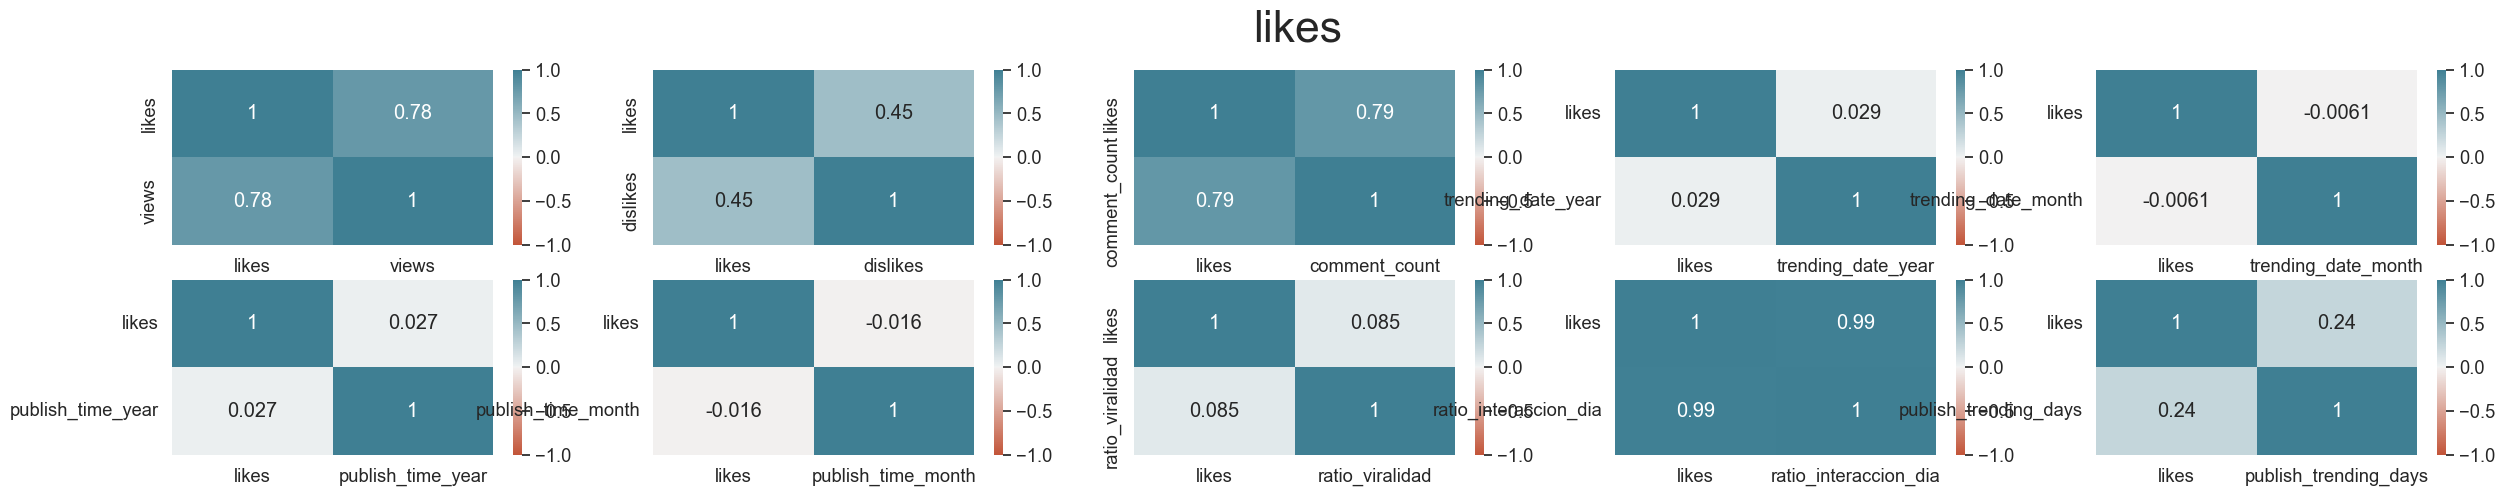

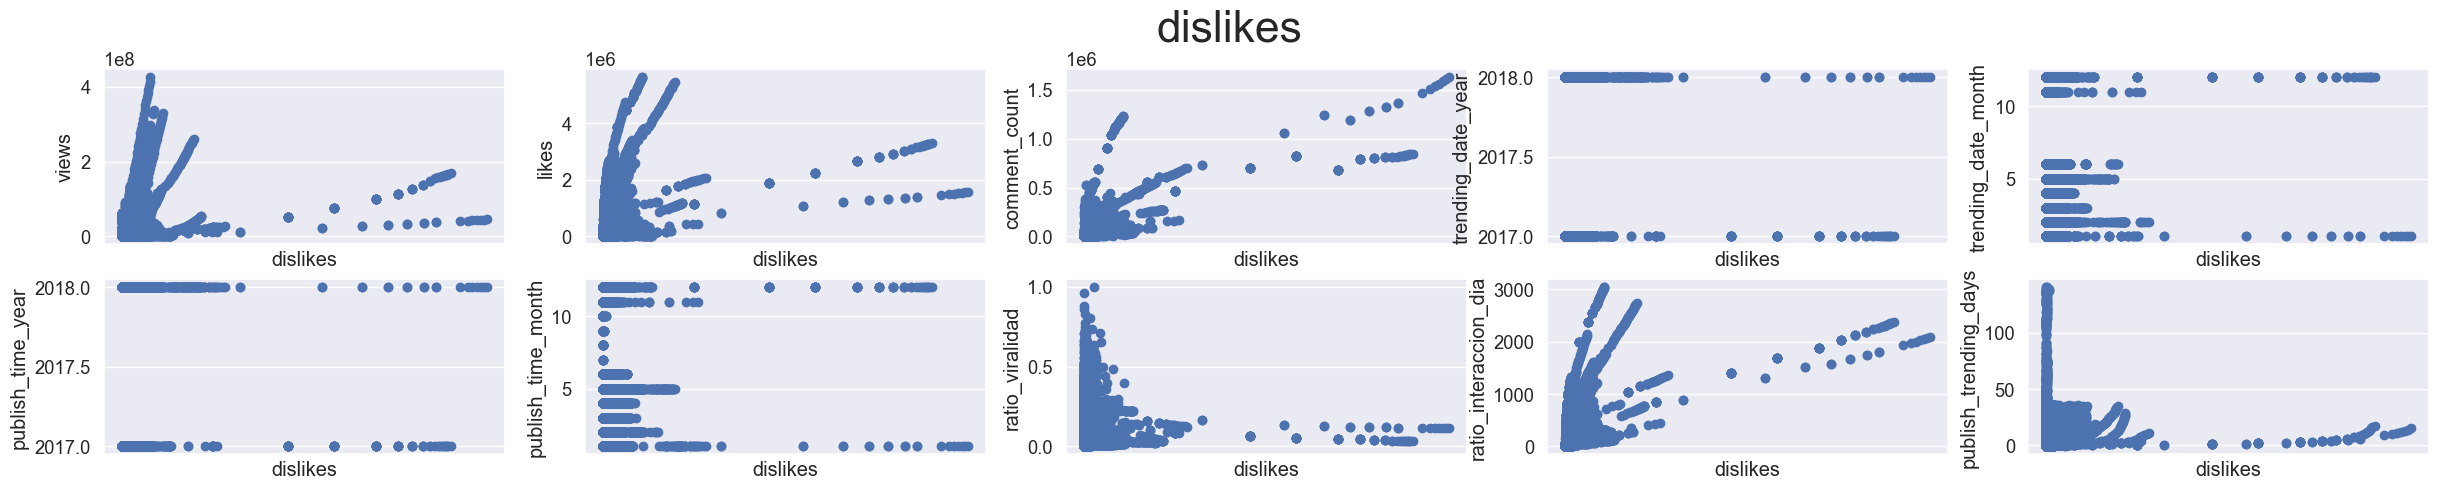

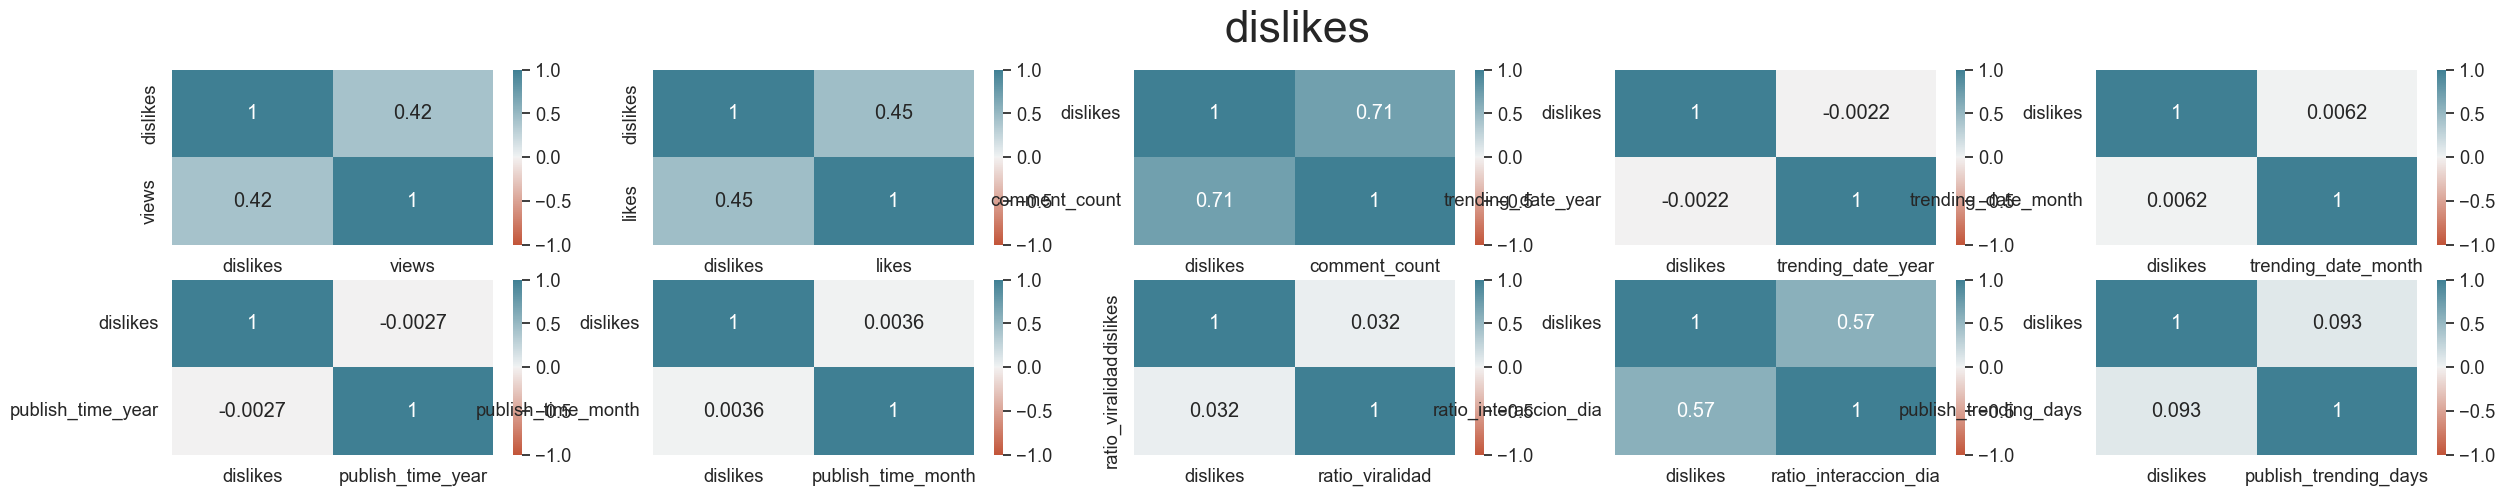

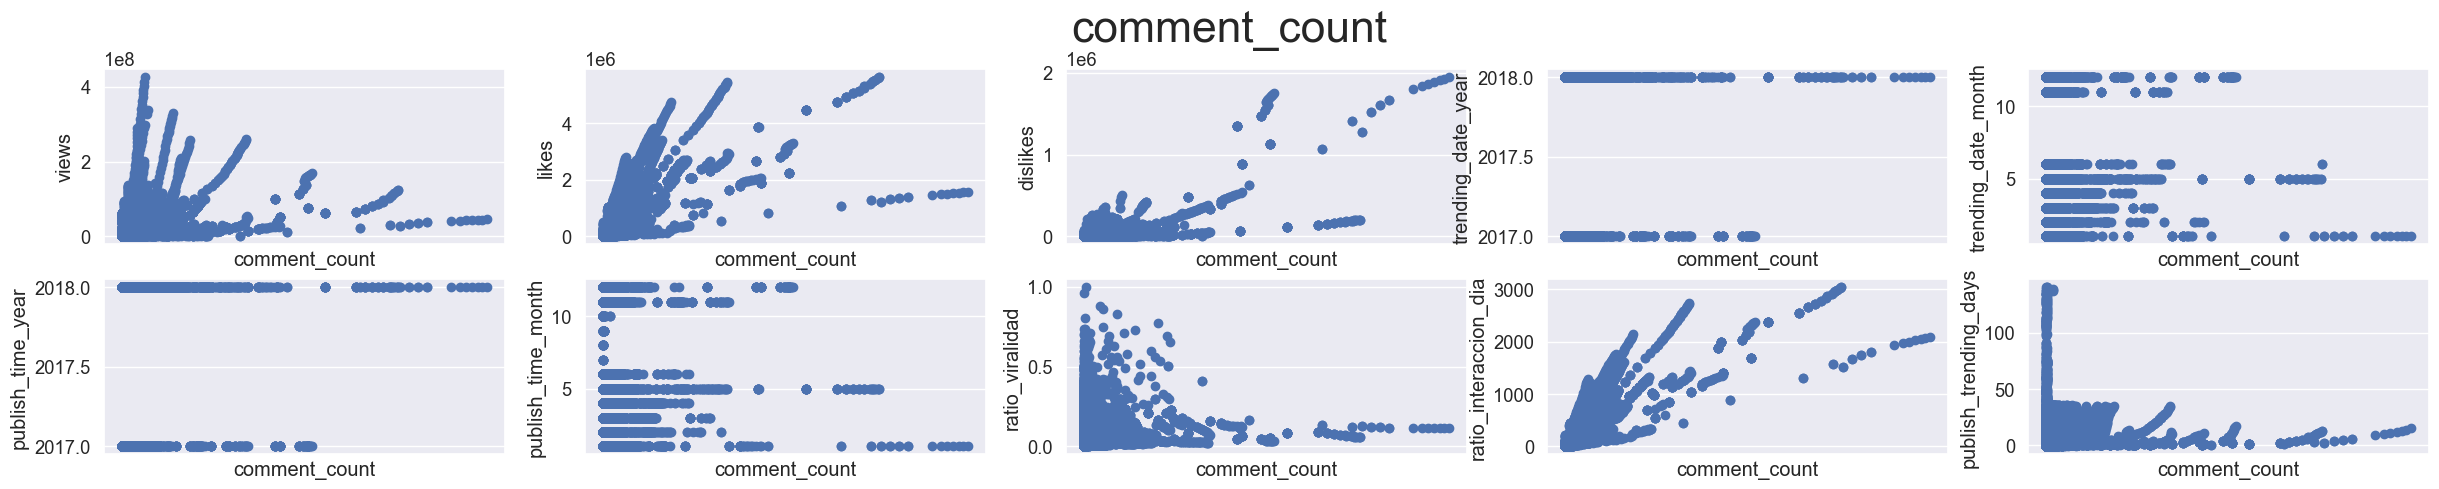

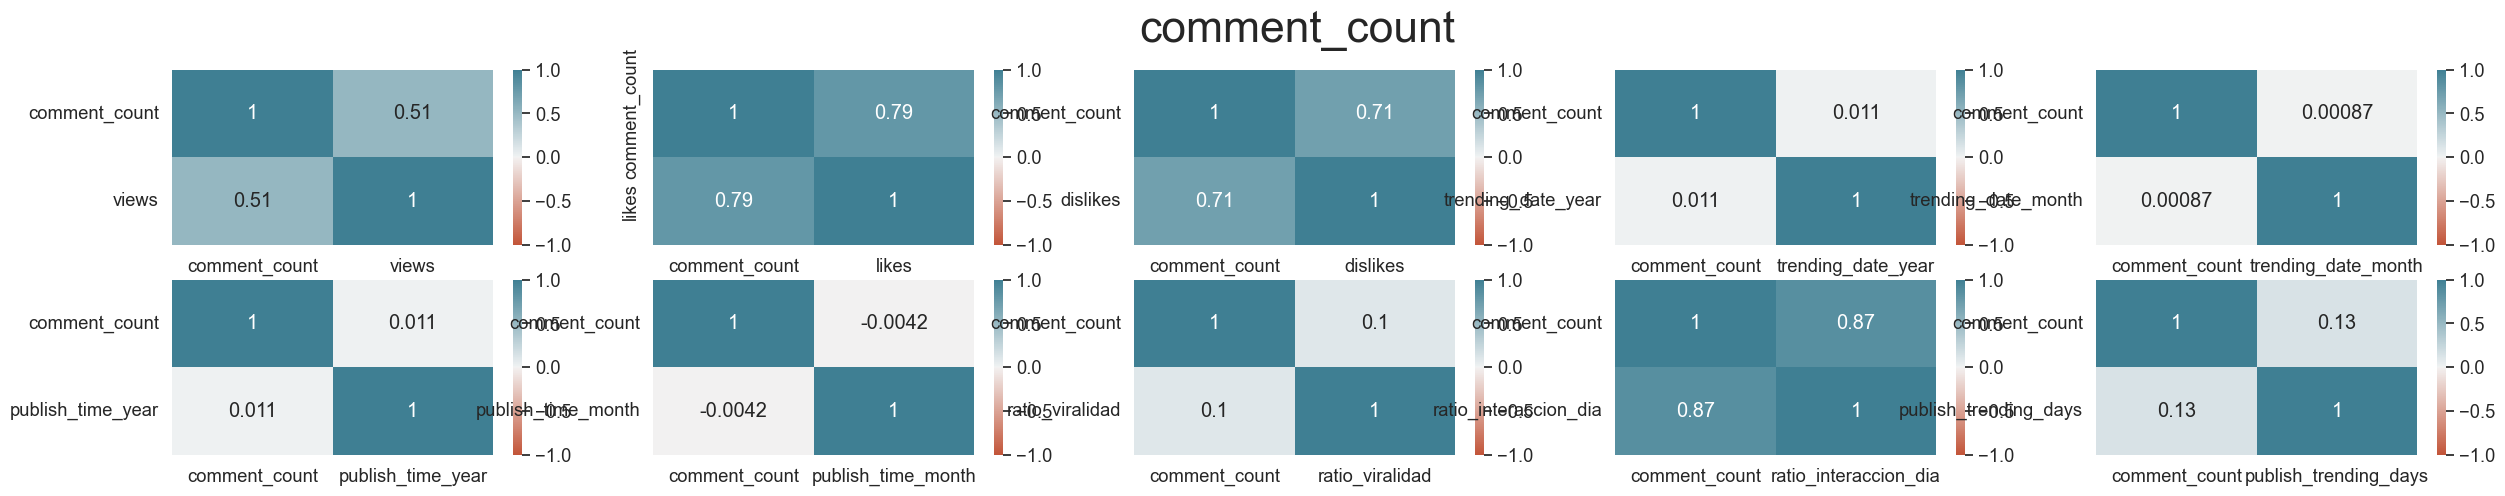

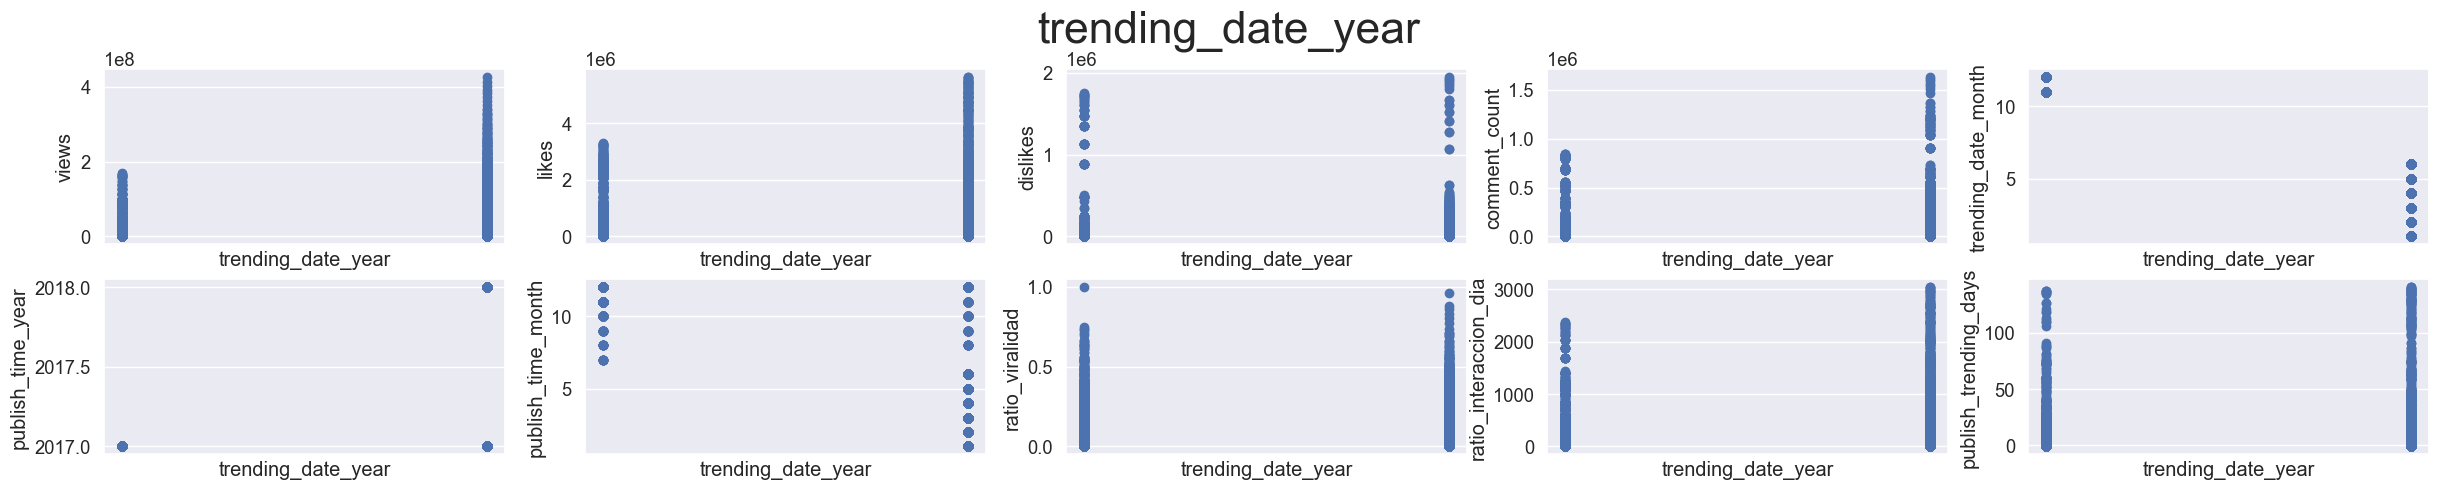

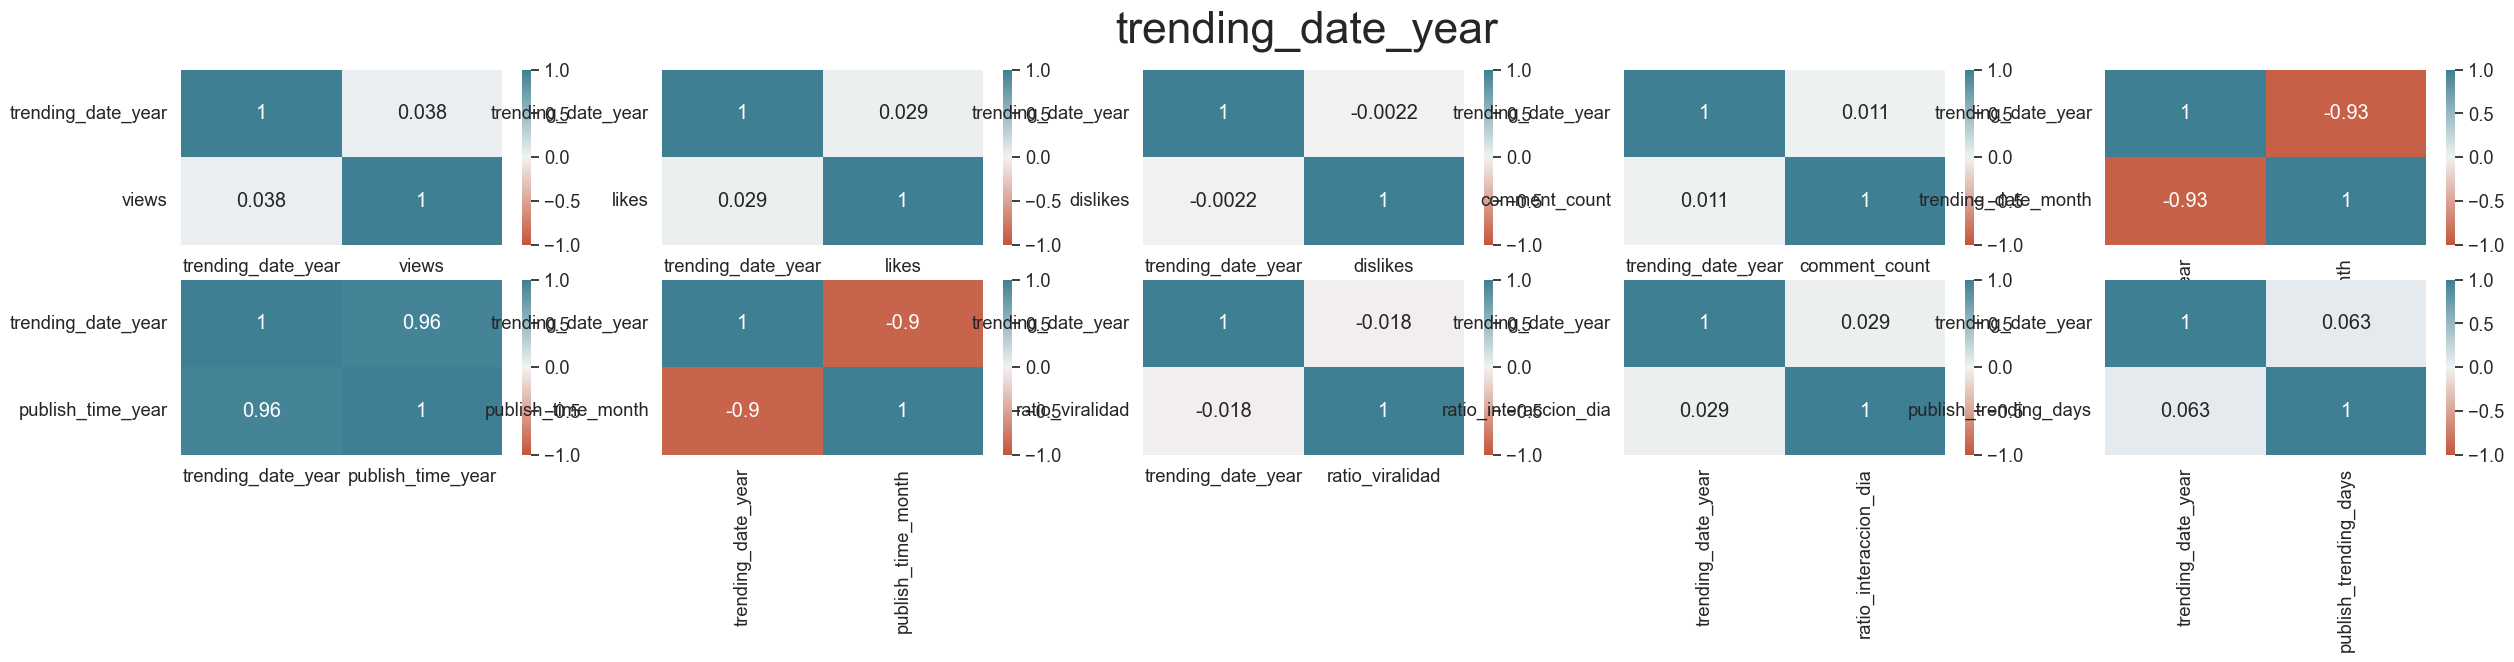

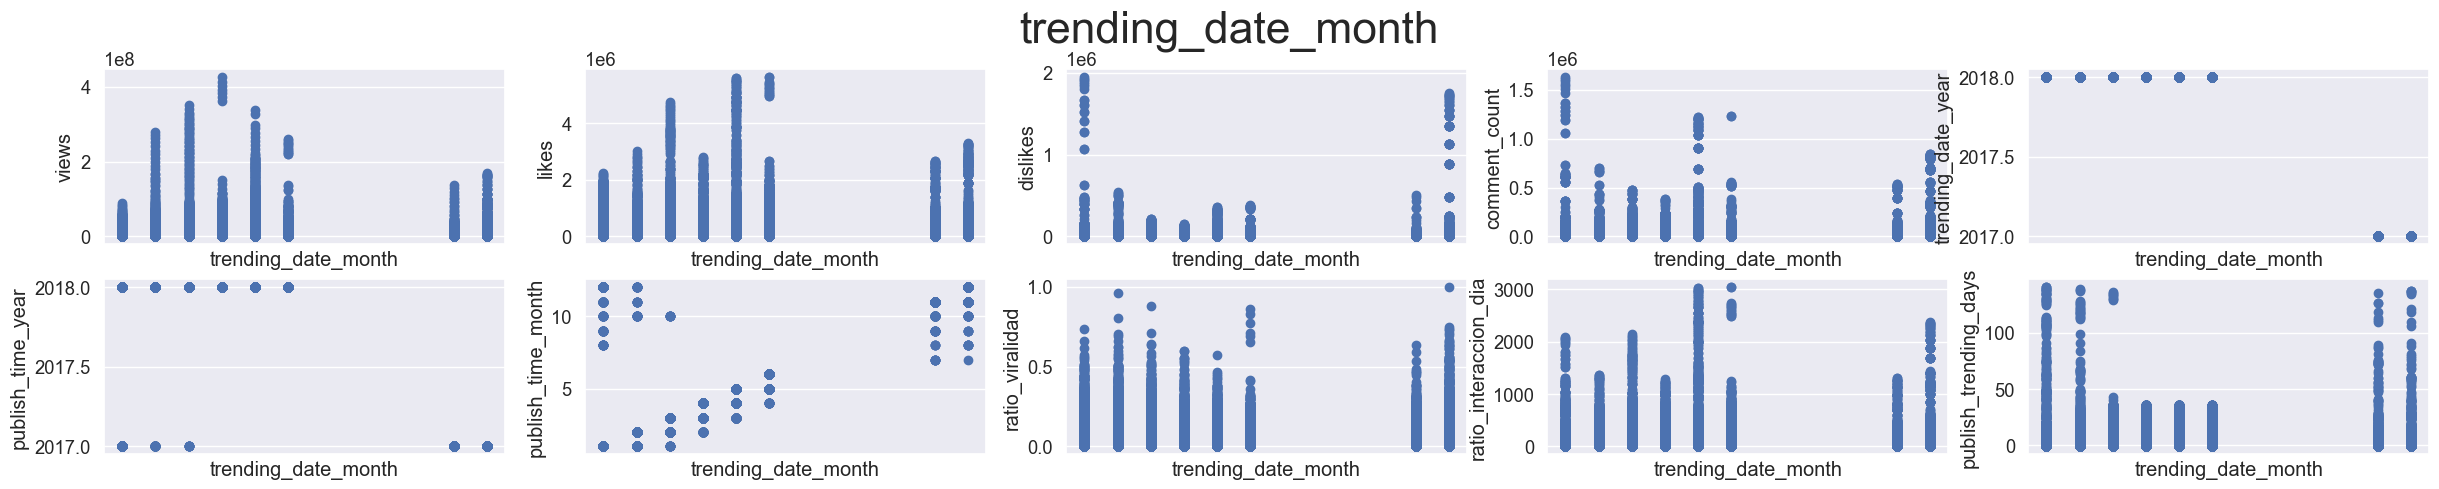

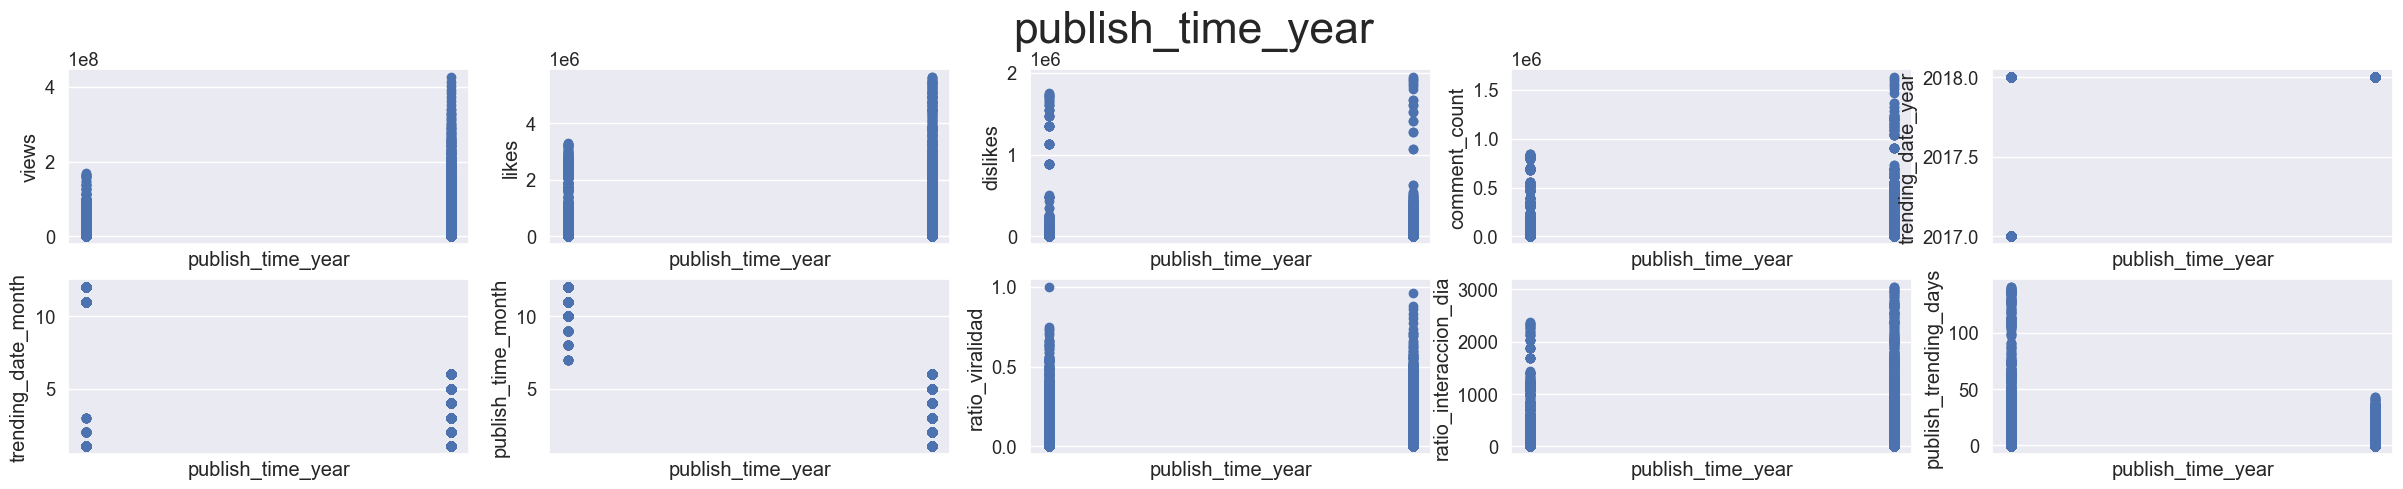

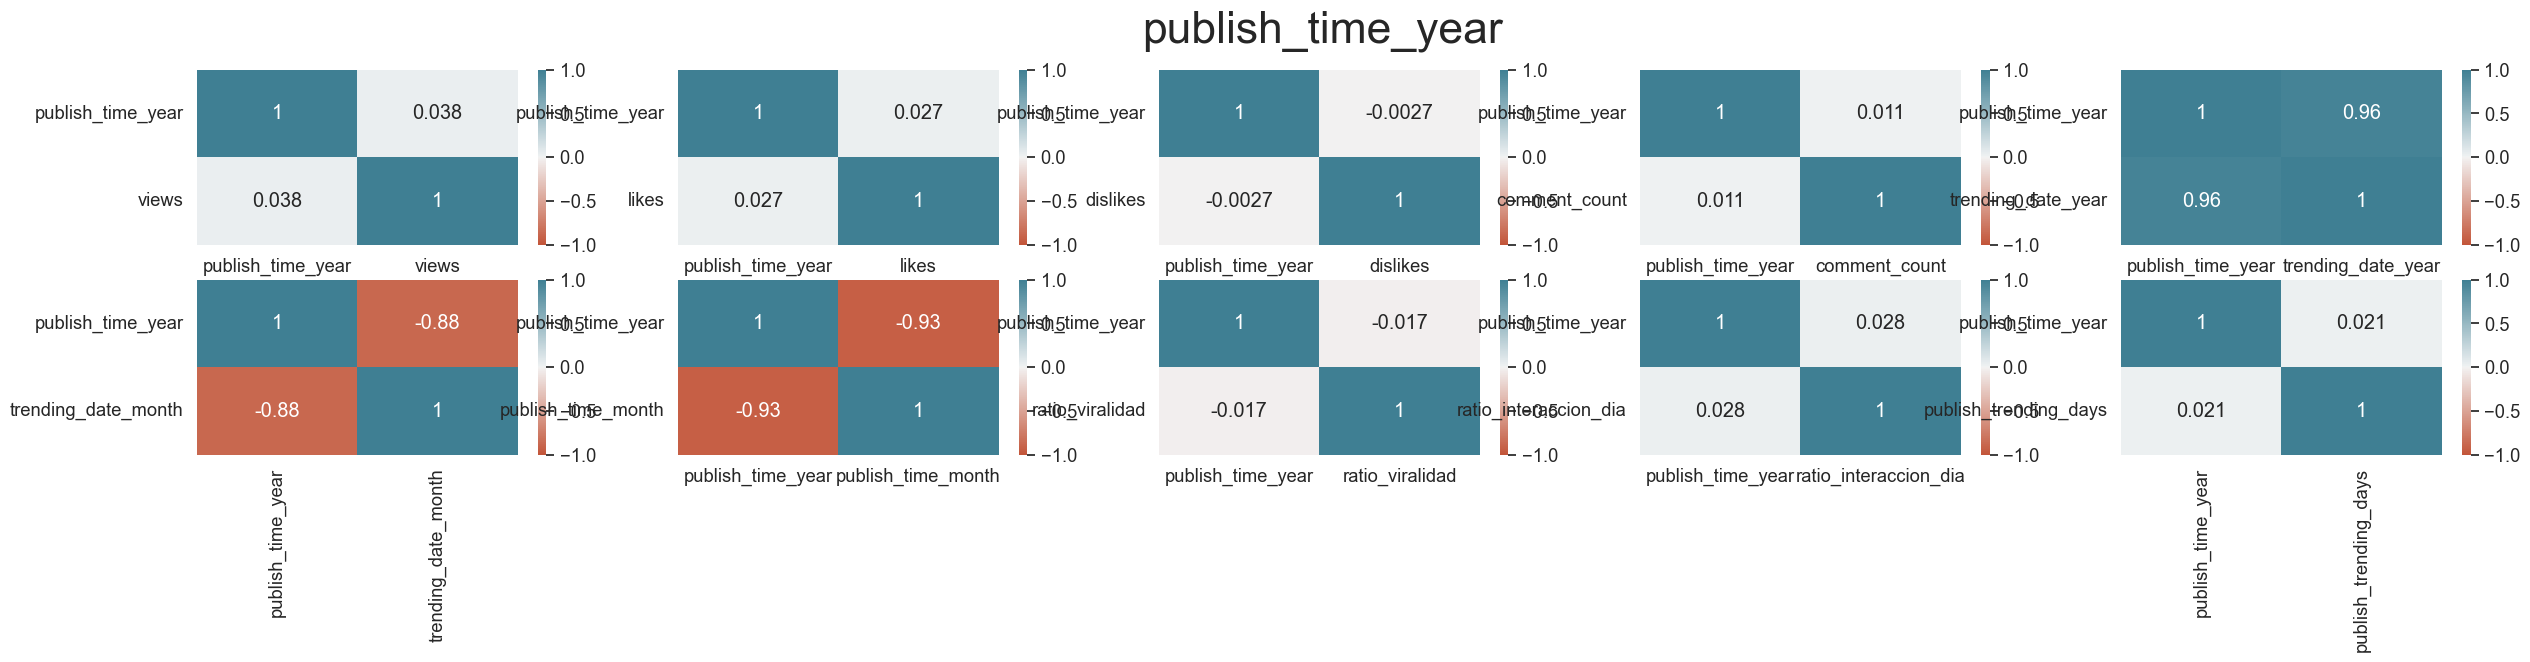

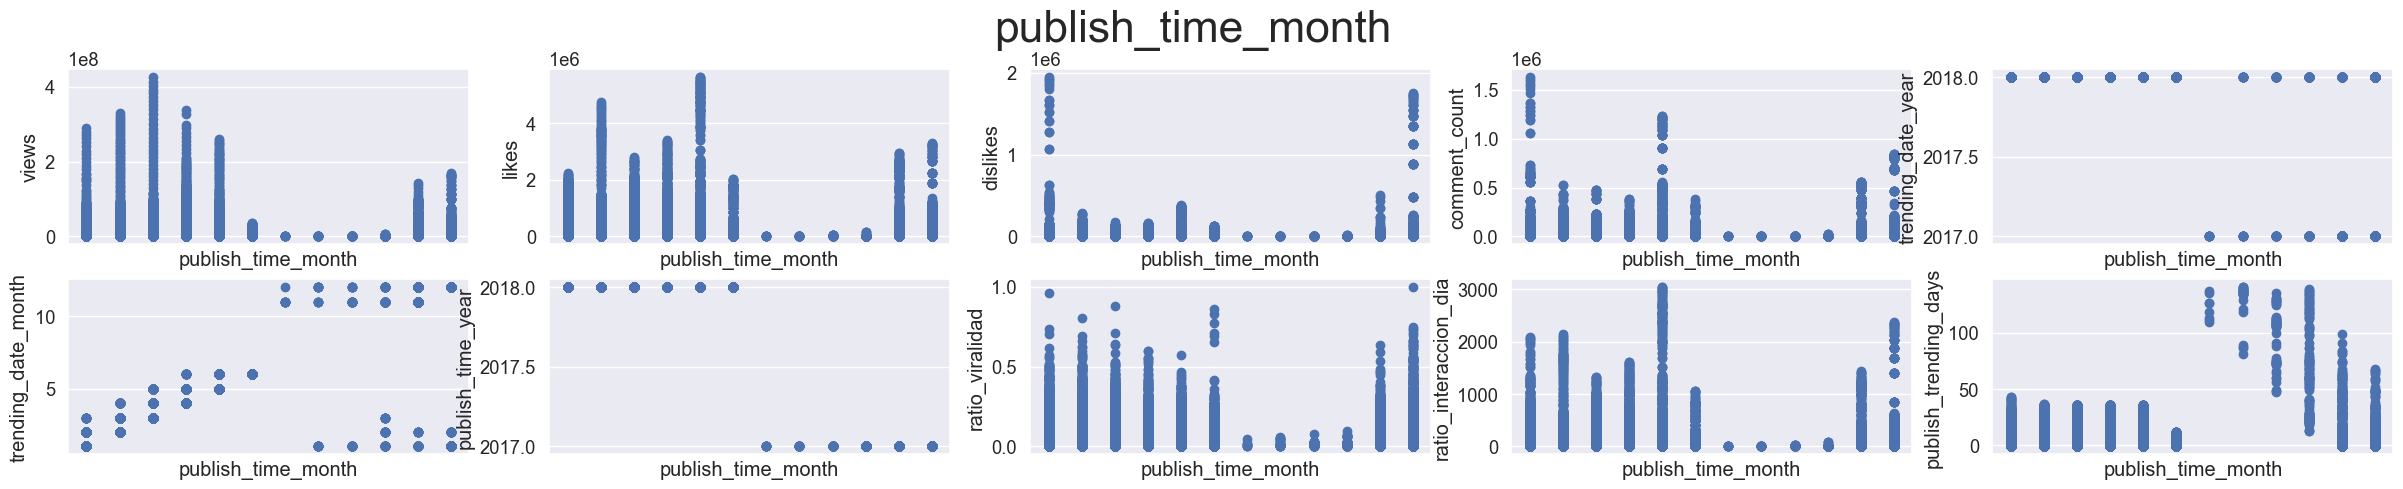

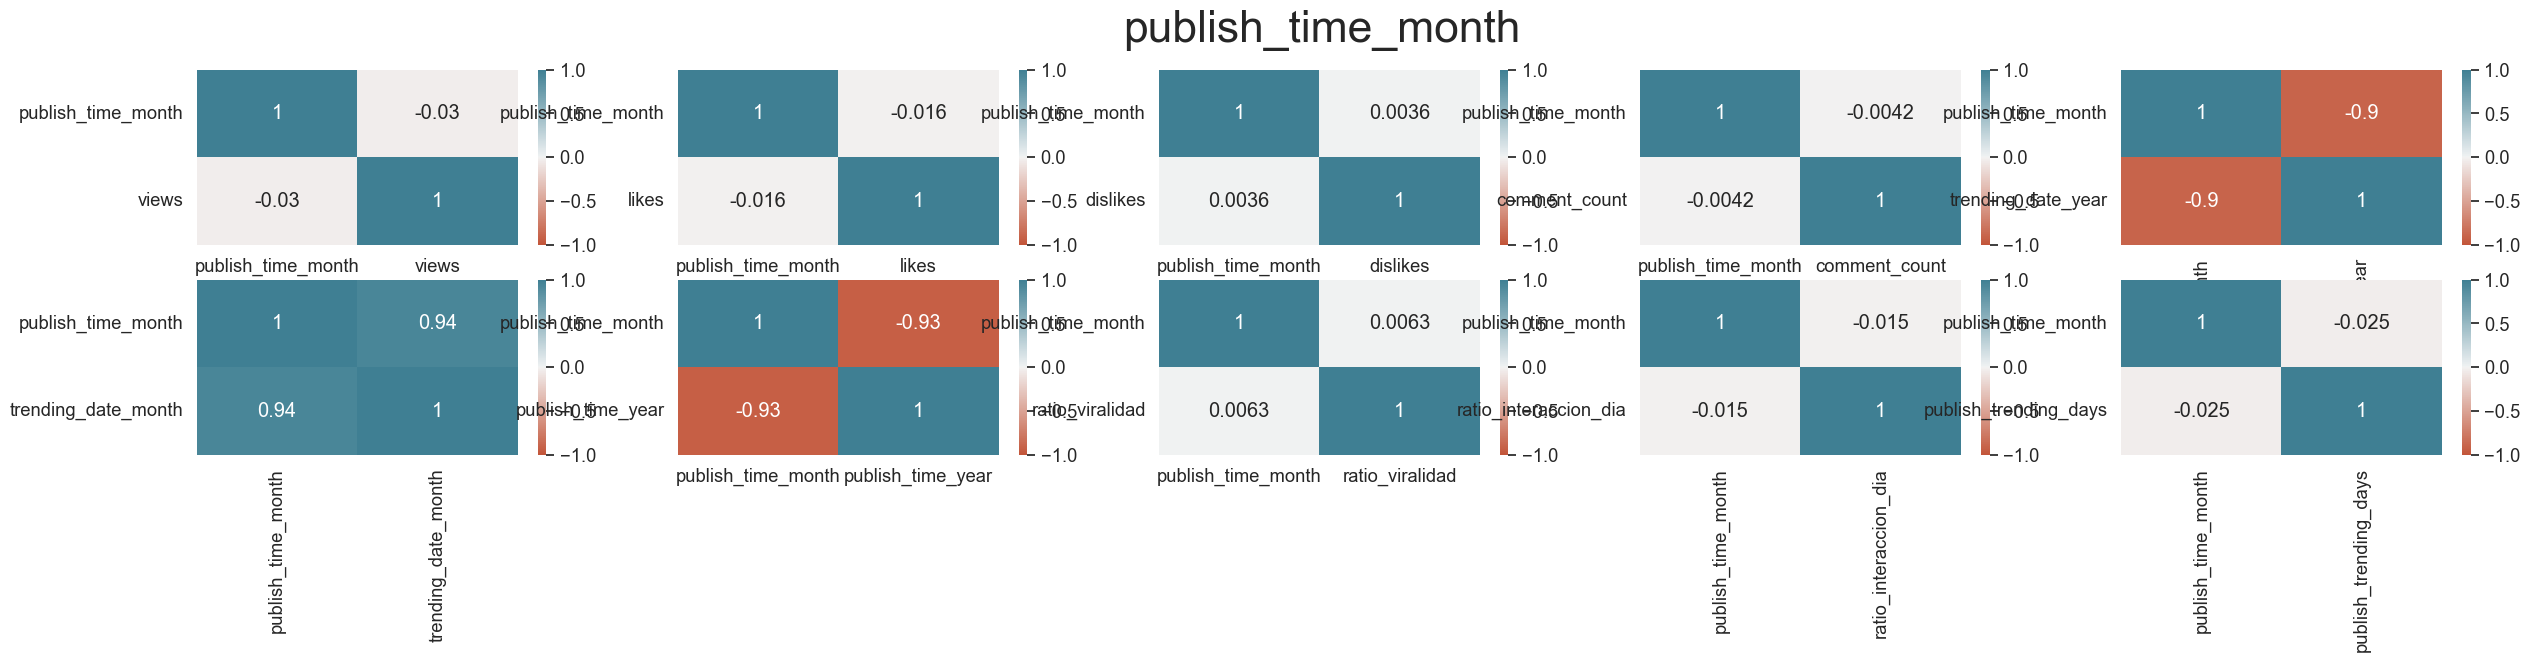

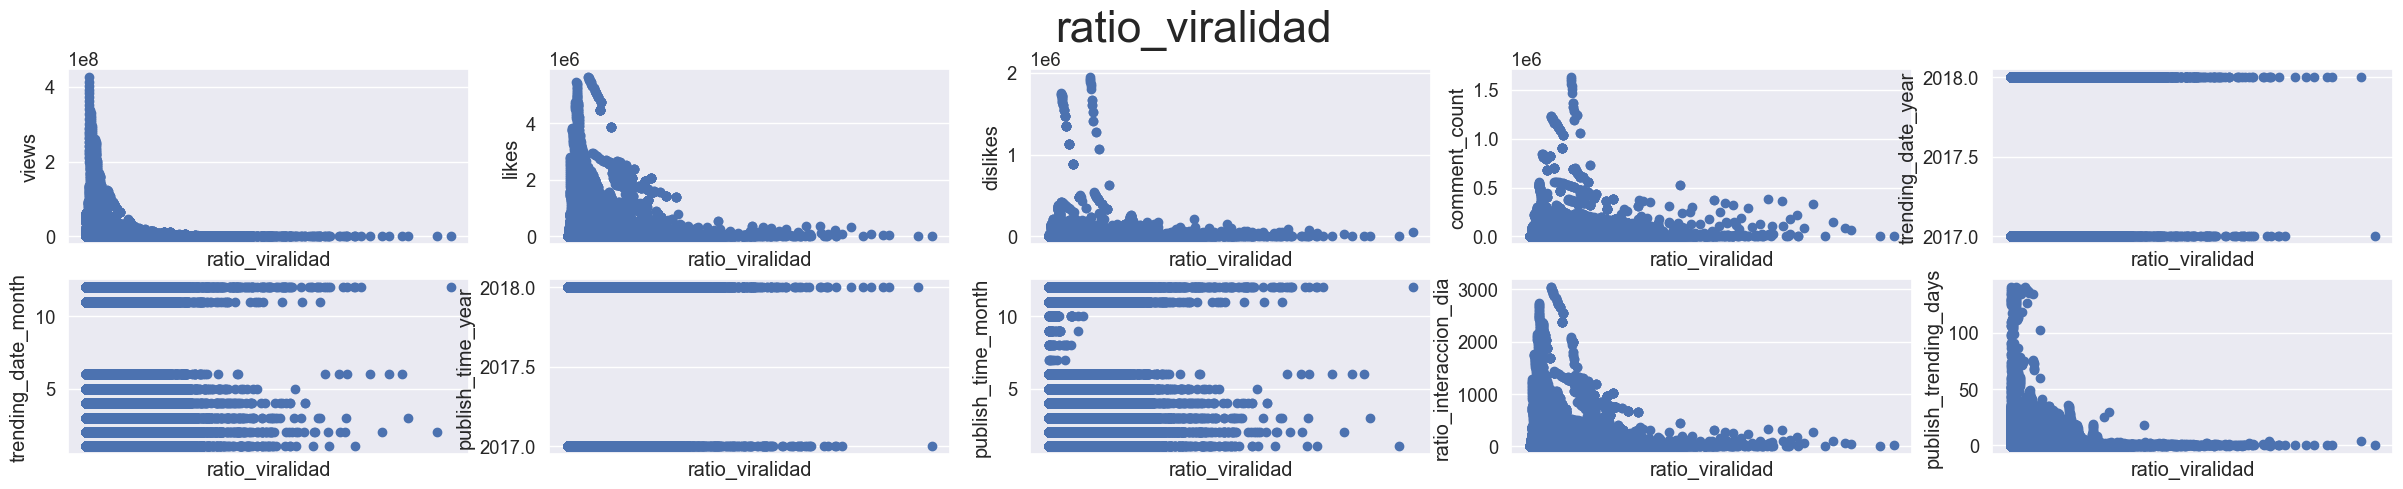

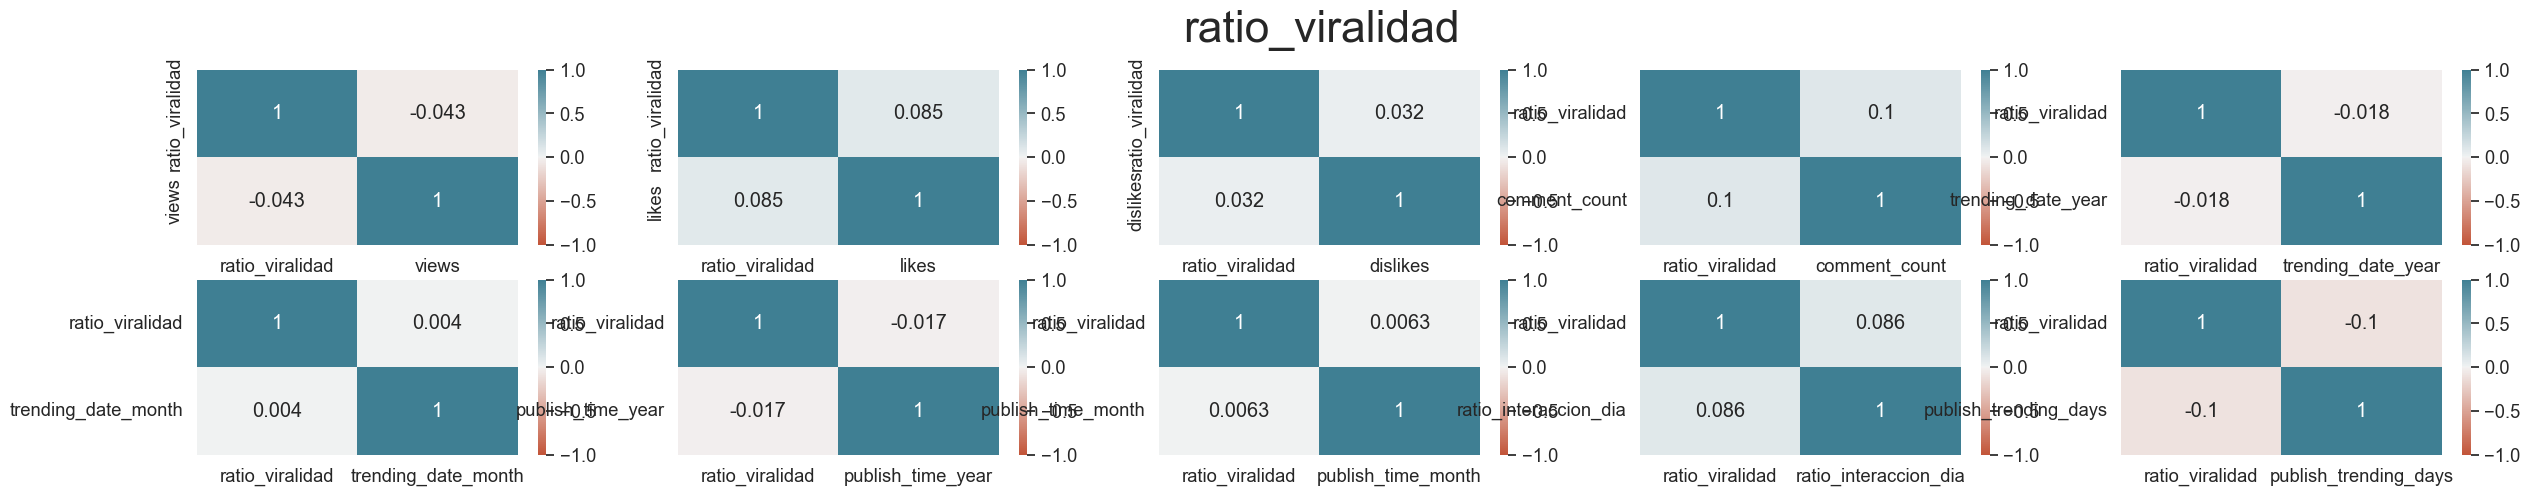

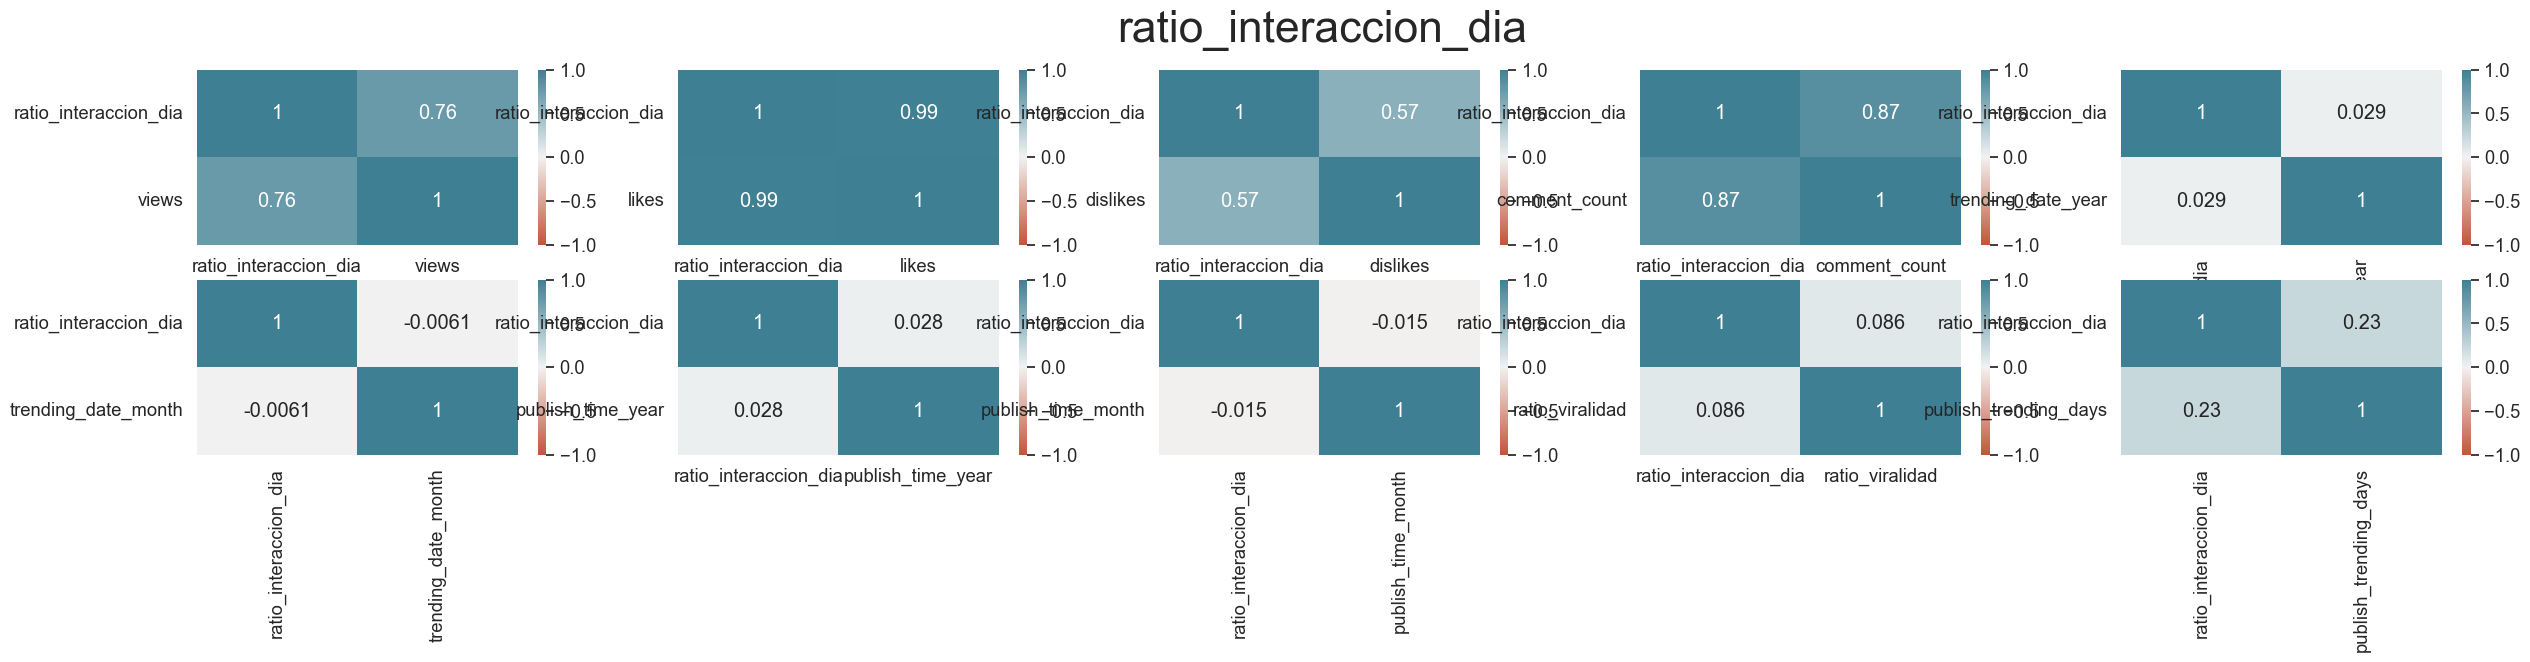

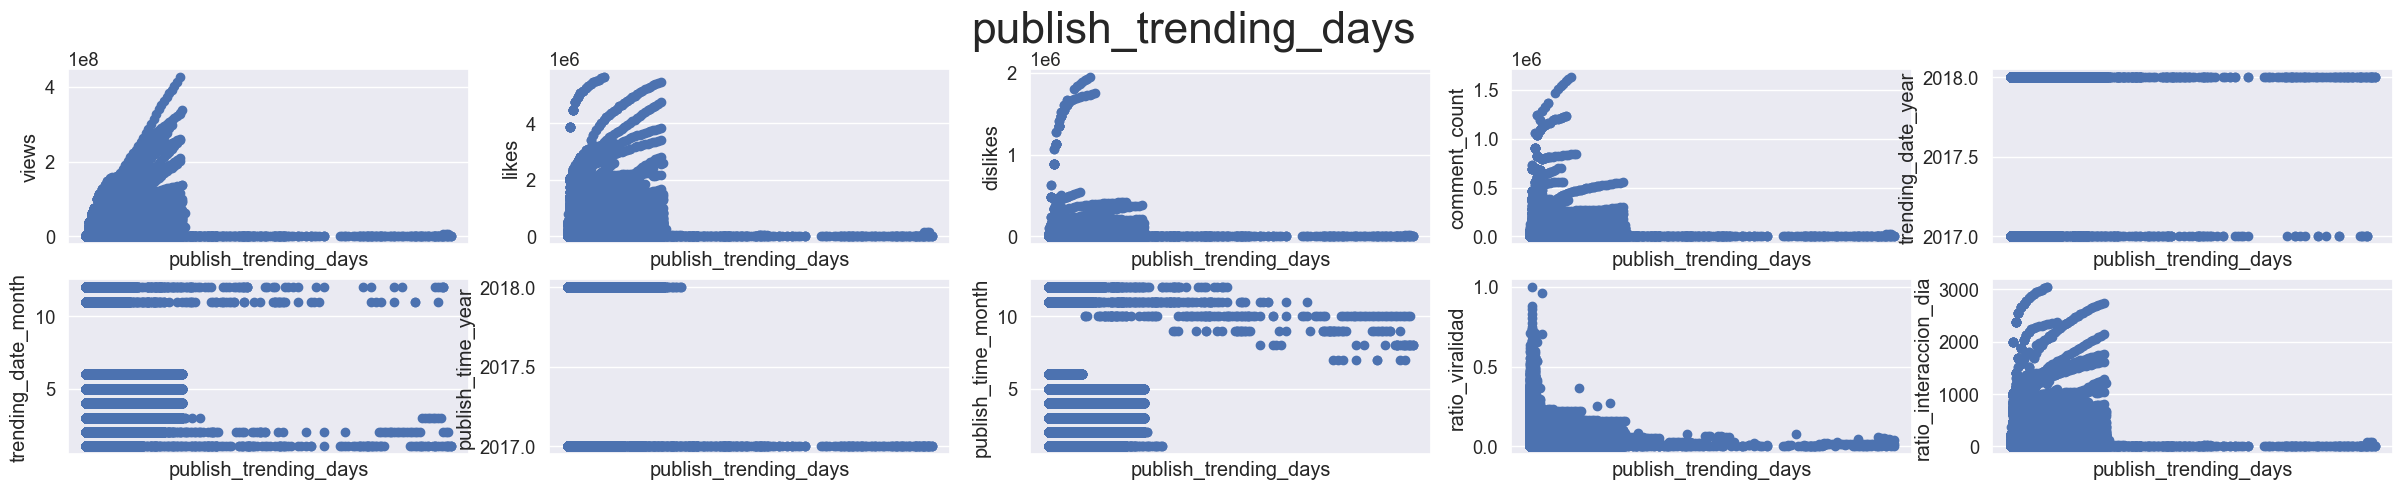

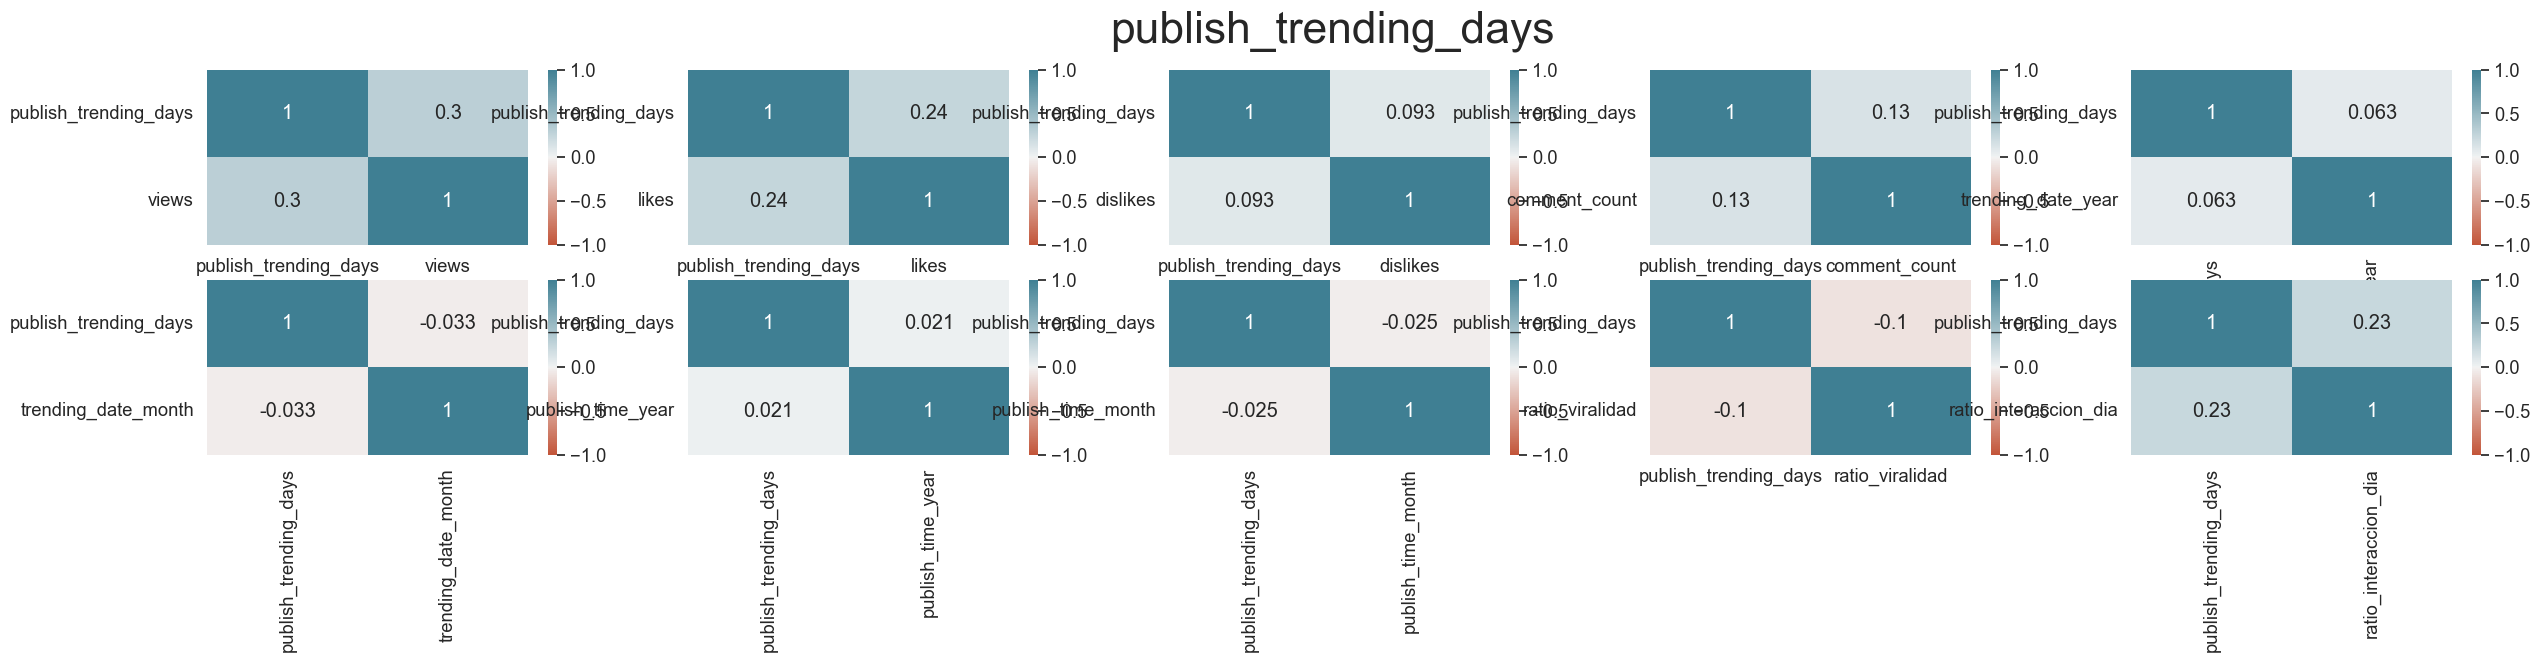

In [177]:
for x in graphical_col:
    dispersion_num(df, x, graphical_col, 2, 5)
    corr_num(df, x, graphical_col, 2, 5)

<b>views</b>: alta correlación con likes y con ratio_interaccion_dia, y media con dislikes y comment_count.<br>
<b>likes</b>: muy alta correlación con ratio_interaccion_dia, alta correlación con views y comment_count, y correlación media con dislikes.<br>
<b>dislikes</b>: alta correlación con comment_count, y correlación media con views, likes y ratio_interaccion_dia.<br>
<b>comment_count</b>: alta correlación con likes, dislikes y ratio_interaccion_dia, y correlación media con views.<br>
<b>trending_date_year</b>:  no tiene correlación con las demás variables numéricas.<br>
Aunque la matriz de correlación parece indicar que trending_date_year tiene muy alta correlación con trending_date_month y publish_time_month, y correlación alta con publish_time_year, hay que tener en cuenta que todos los valores de estas variables se corresponden con años concretos y con los meses del año, por lo que la correlación que muestran estas gráficas podría ser casual, como indican las gráficas de dispersión.<br>
<b>trending_date_month</b>: caso análogo al de trending_date_year, no tiene correlación lineal con las demás variables numéricas.<br>
<b>publish_time_year</b>: mismo caso que los anteriores, no tiene correlación lineal con el resto de variables numéricas.<br>
<b>publish_time_month</b>: se repite lo anterior, no tiene correlación lineal con el resto de variables numéricas.<br>
<b>ratio_viralidad</b>: no tiene relación lineal con las demás variables numéricas.<br>
<b>ratio_interaccion_dia</b>: muy alta correlación con likes, alta correlación con views y comment_count, y correlación media con dislikes.<br>
<b>publish_trending_days</b>: baja correlación con views, likes y ratio_interaccion_dia.

### Variables numéricas y categóricas

In [178]:
# vamos a guardar en numerical_col todas las variables numéricas a graficar
numerical_col = ['views_encoded', 'likes_encoded', 'dislikes_encoded', 'comment_count_encoded', 'trending_date_year_encoded',\
                 'trending_date_month_encoded', 'publish_time_year_encoded', 'publish_time_month_encoded', 'ratio_viralidad',\
                 'ratio_interaccion_dia_encoded', 'publish_trending_days']

numerical_col

['views_encoded',
 'likes_encoded',
 'dislikes_encoded',
 'comment_count_encoded',
 'trending_date_year_encoded',
 'trending_date_month_encoded',
 'publish_time_year_encoded',
 'publish_time_month_encoded',
 'ratio_viralidad',
 'ratio_interaccion_dia_encoded',
 'publish_trending_days']

In [179]:
# vamos a guardar en categorical_col todas las variables categóricas a graficar
categorical_col = ['channel_title_encoded', 'tags_encoded', 'comments_disabled', 'ratings_disabled', 'category_encoded', 'country_encoded']

categorical_col

['channel_title_encoded',
 'tags_encoded',
 'comments_disabled',
 'ratings_disabled',
 'category_encoded',
 'country_encoded']

In [180]:
def corr_num_cat(df, var_num, lista_var_cat, filas, columnas):
    '''
    Grafica las matrices de correlación de una variable numérica y todas las categóricas
    df: dataframe
    var_num: variable numérica
    lista_var_cat: lista de variables categóricas
    filas: número de filas a graficar
    columnas: número de columnas a graficar
    '''
    sns.set(font_scale=1.2)
    plt.figure(figsize=(30, 5))
    plt.suptitle(var_num, fontsize=32, y=1)
    k = 1
    x = var_num
    for y in lista_var_cat:
        corr_matrix = df[[x, y]].corr()
        plt.subplot(filas, columnas, k)
        sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(20, 220, n=256))
        k += 1
    #plt.tight_layout()
    plt.show()

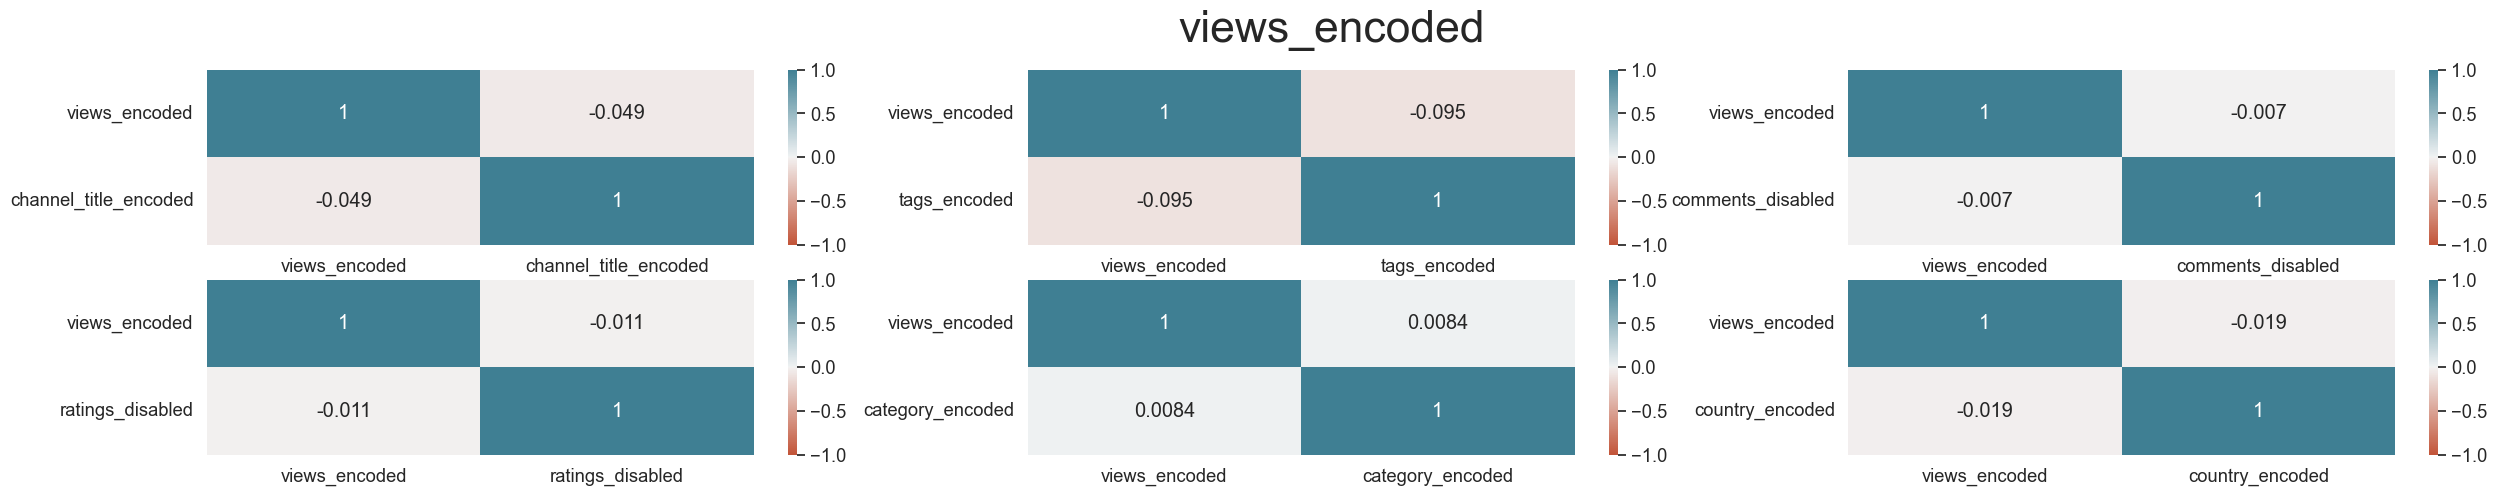

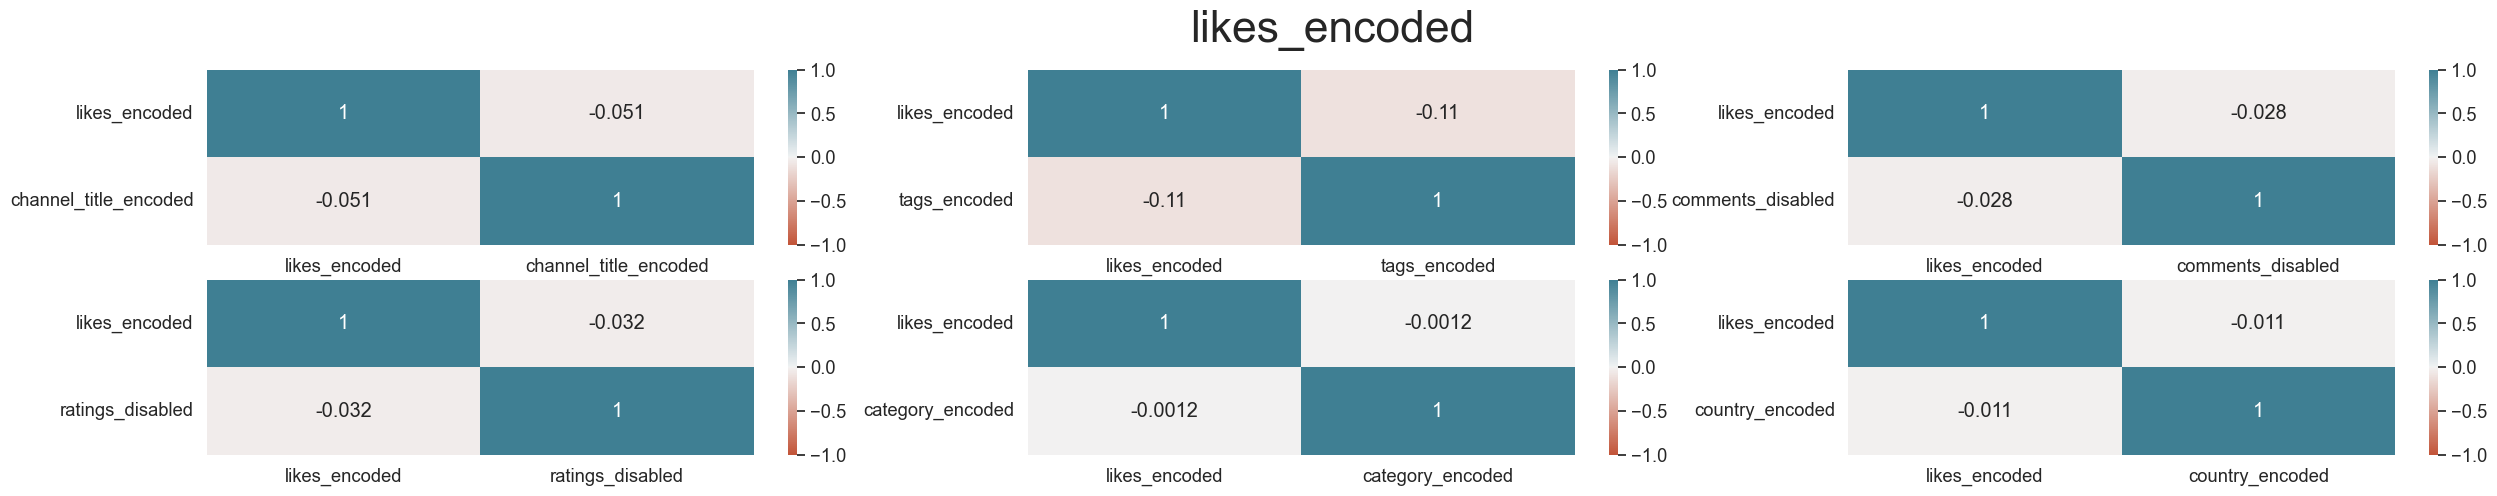

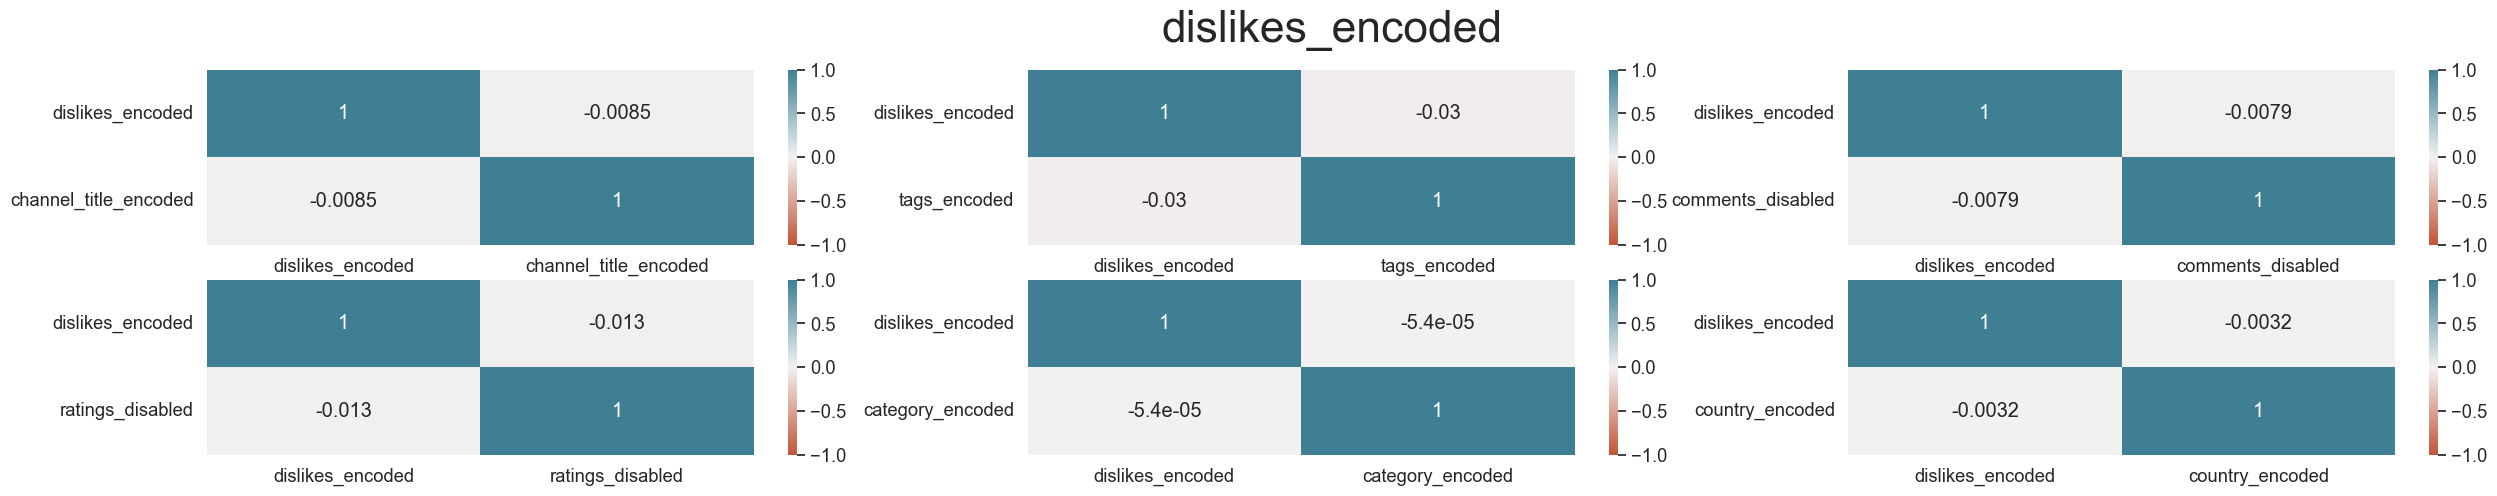

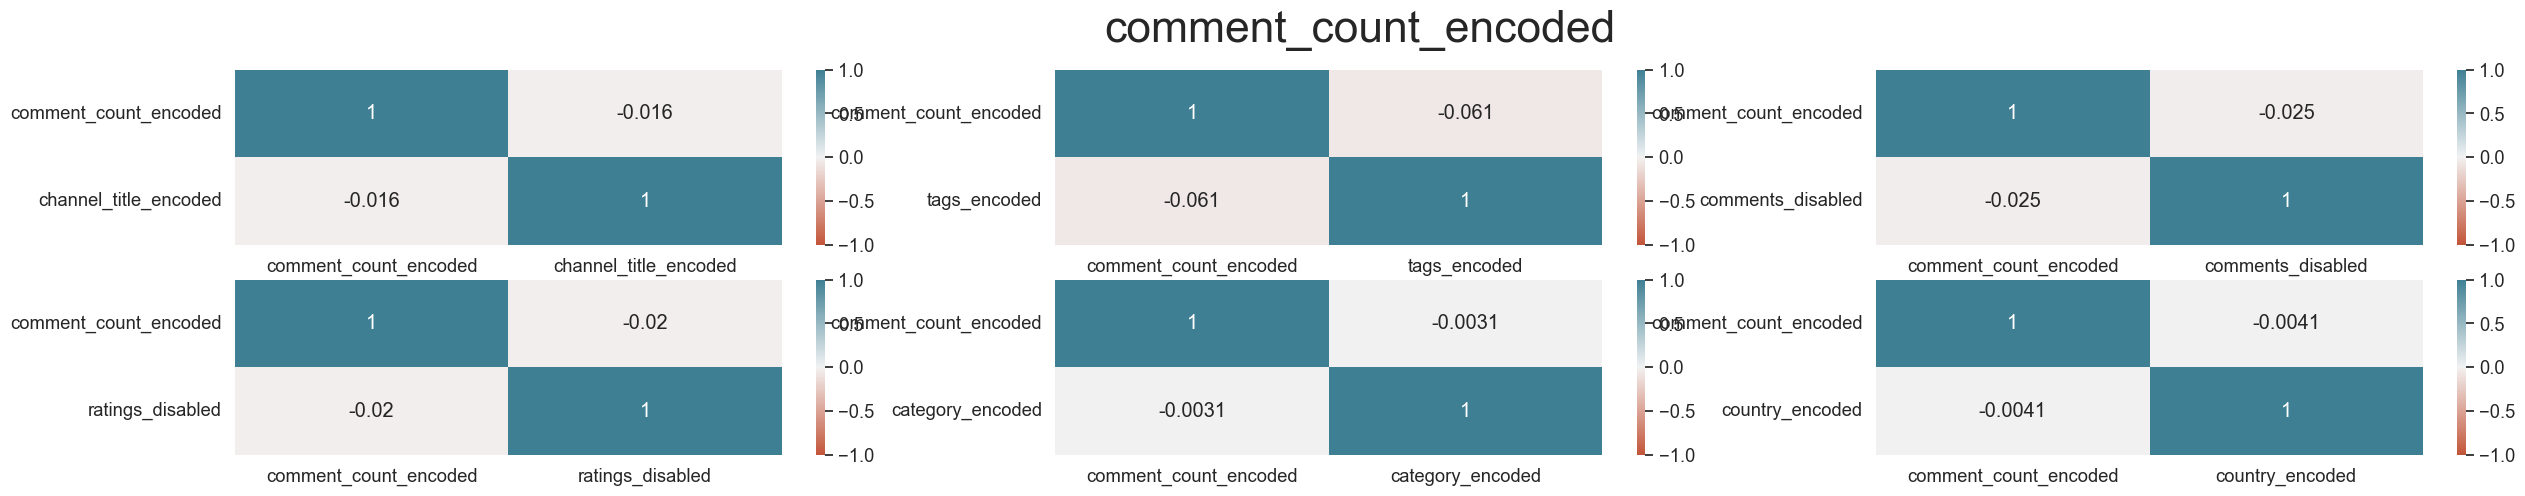

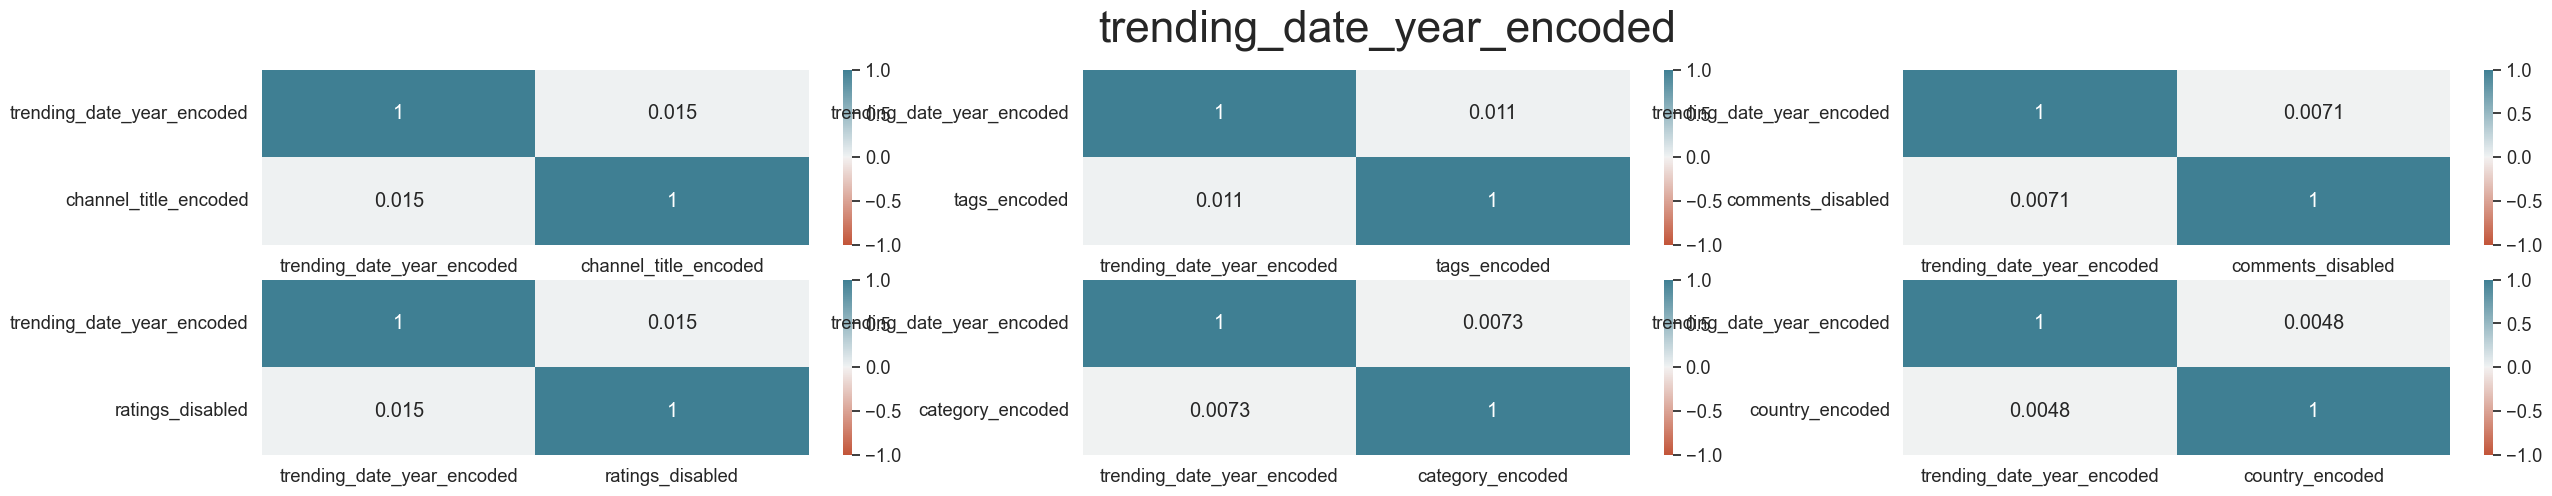

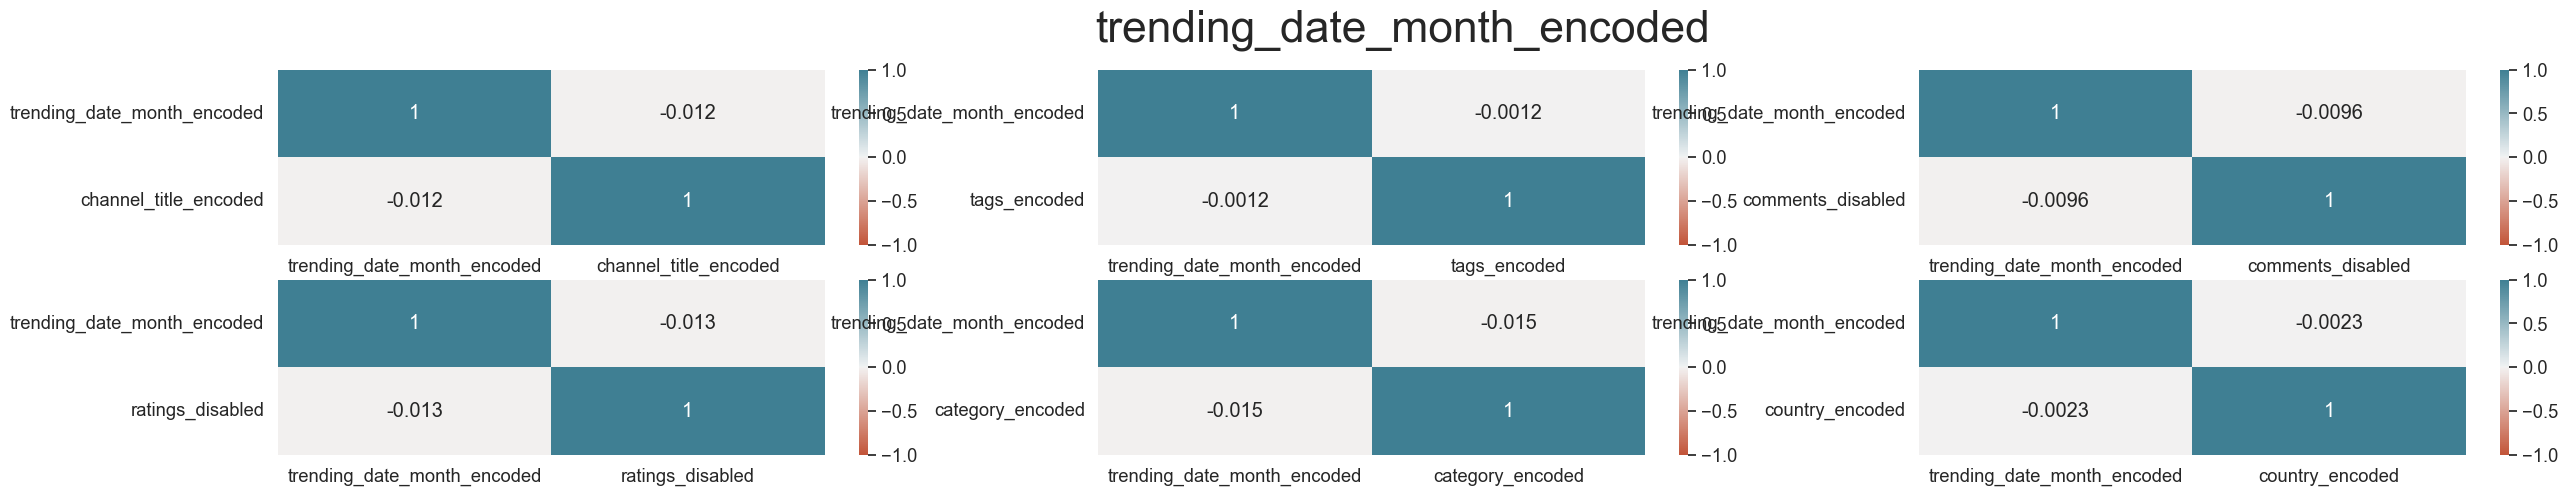

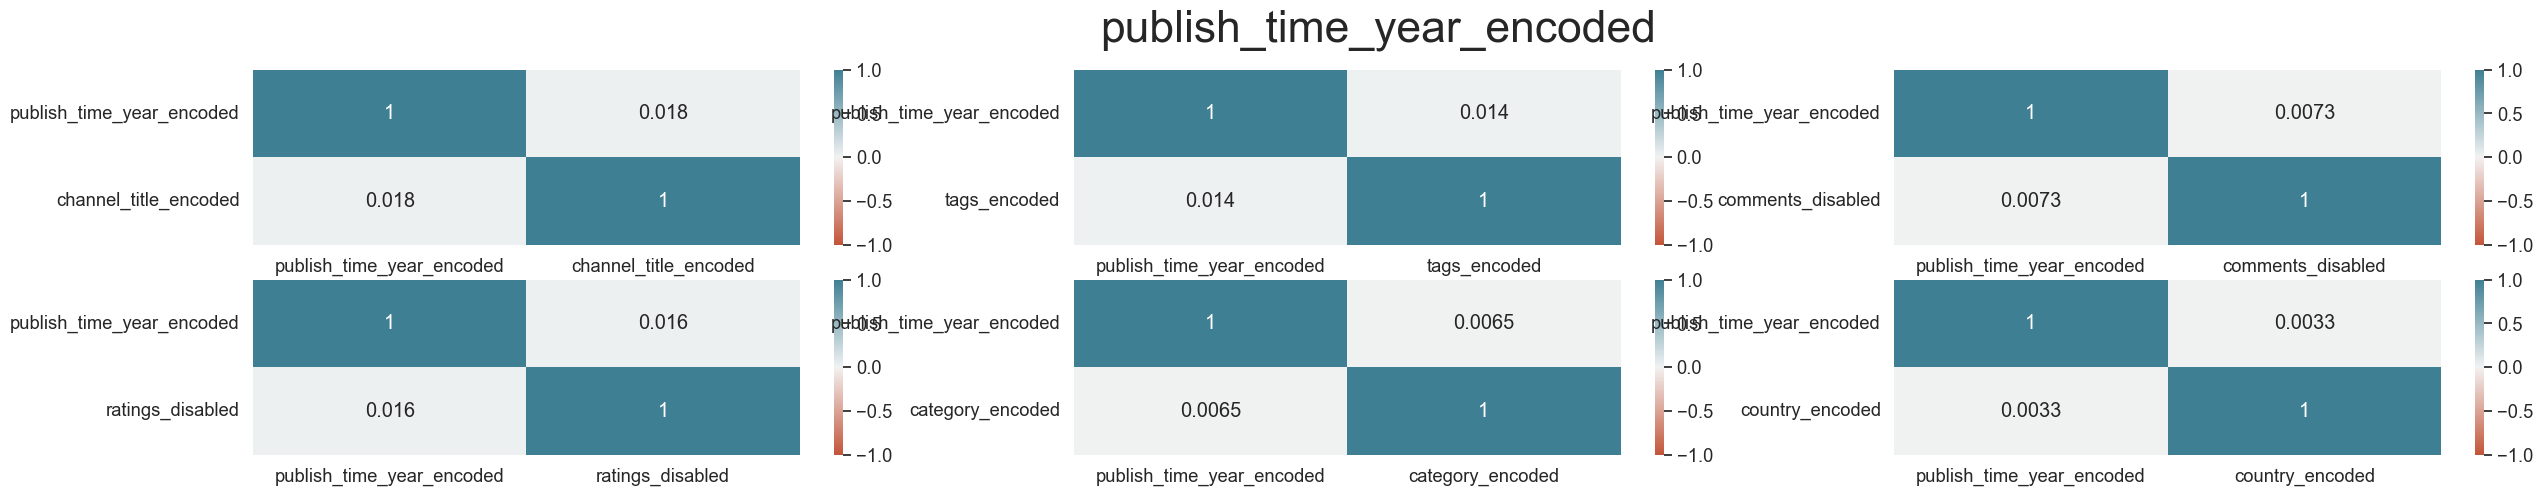

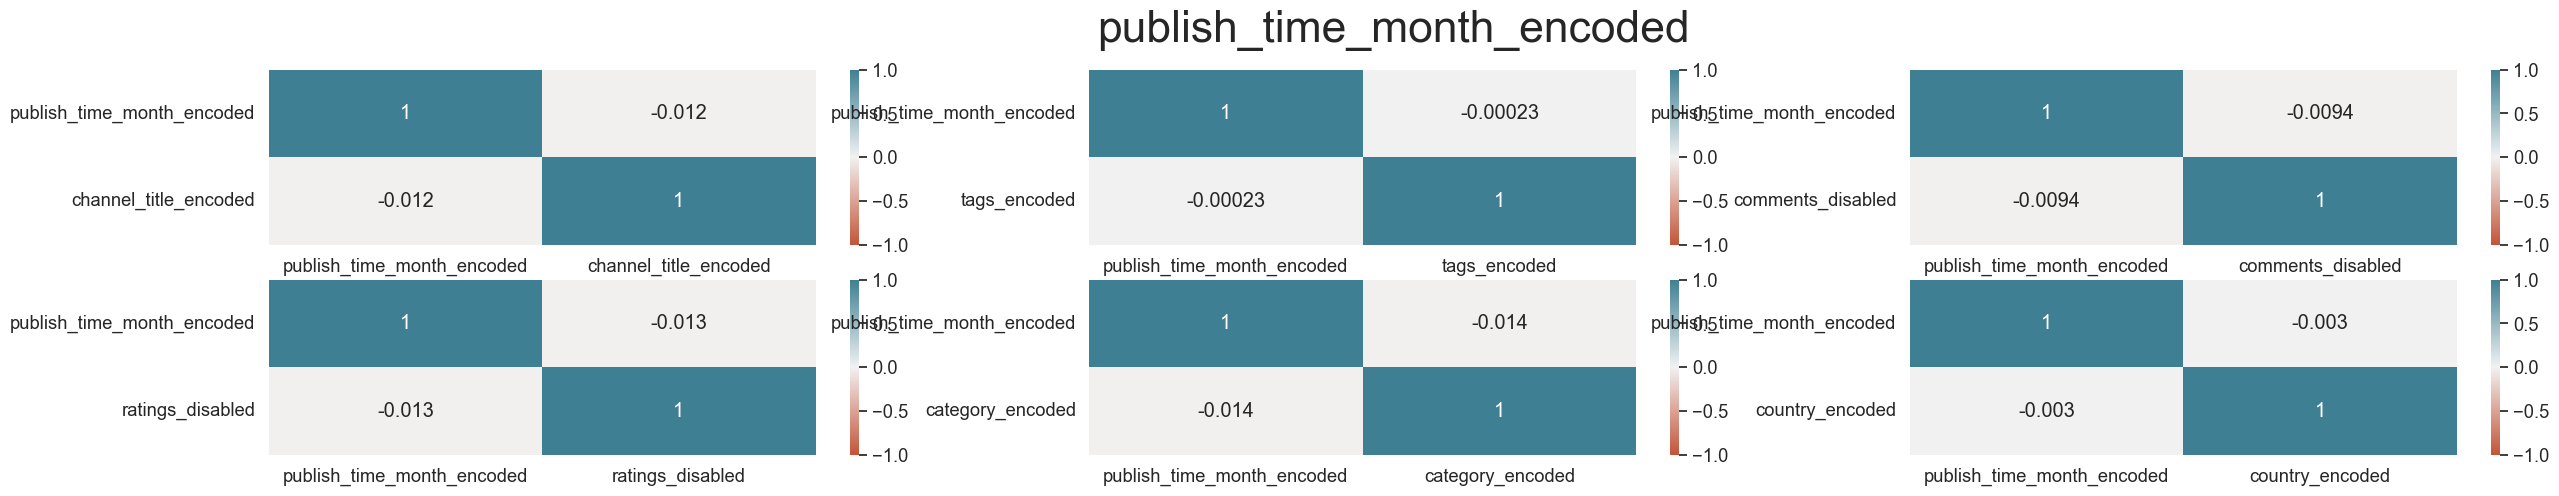

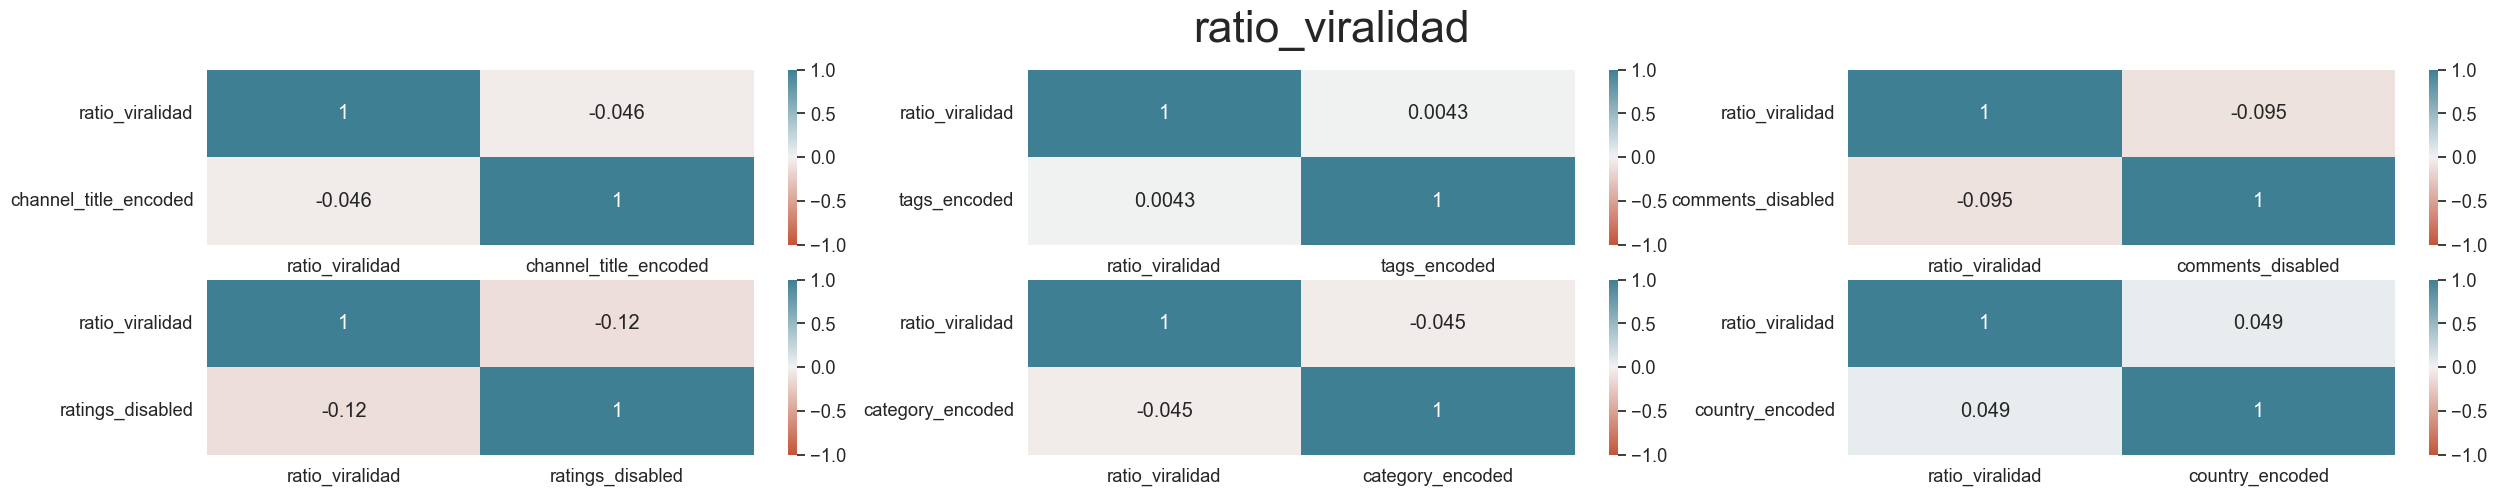

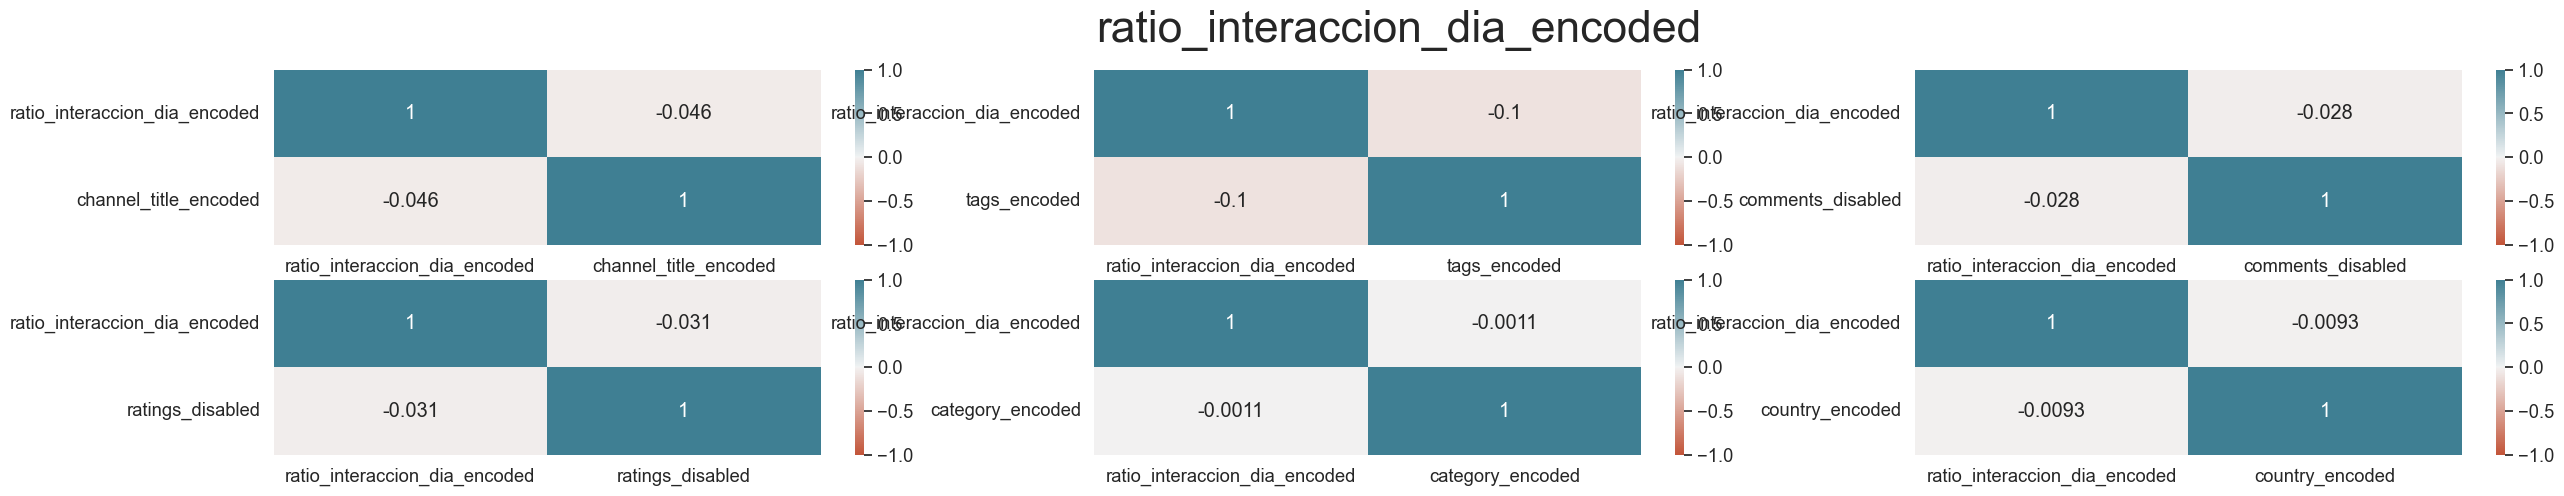

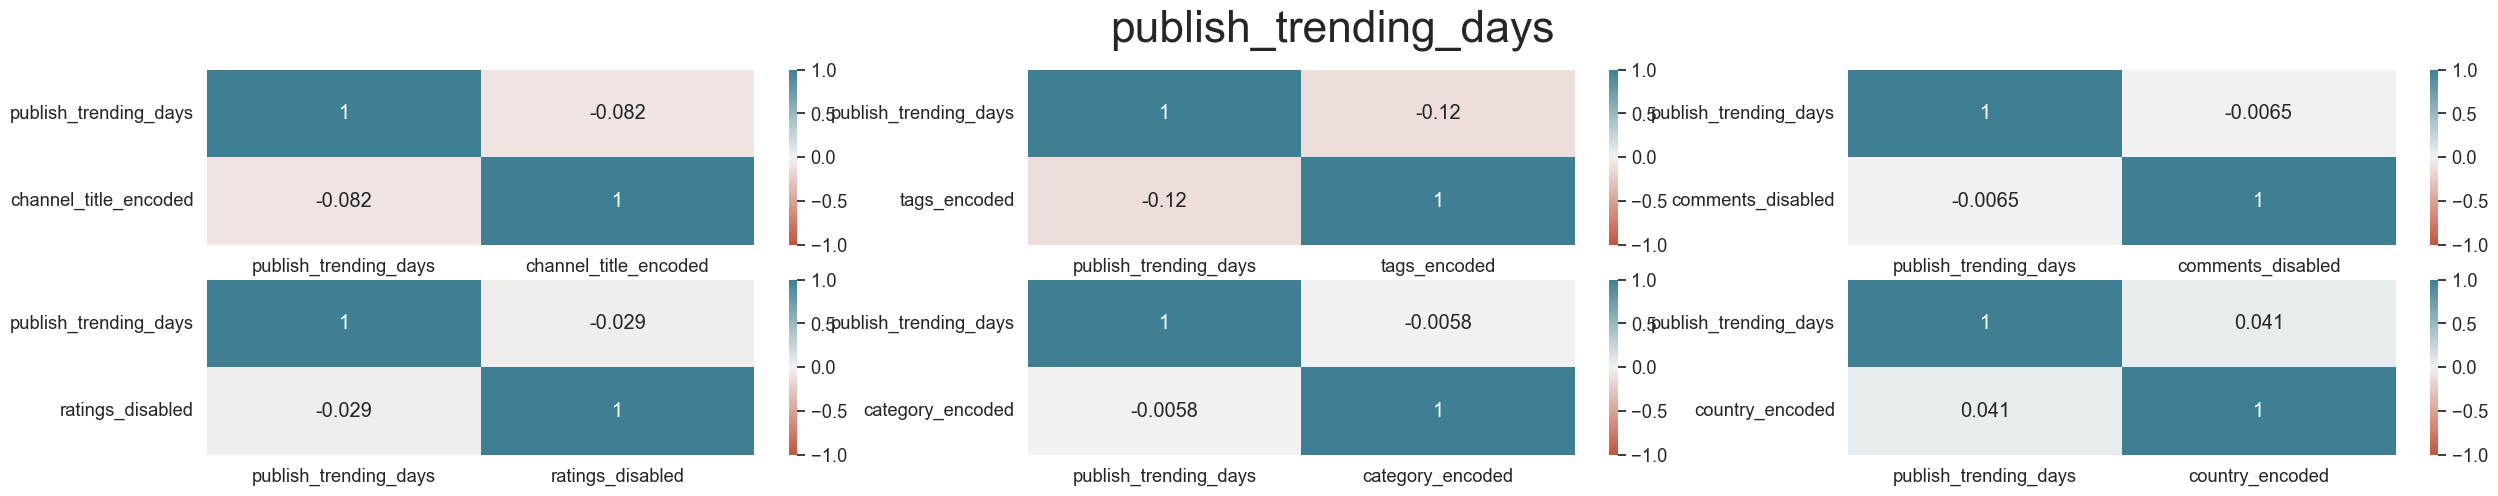

In [181]:
for x in numerical_col:
    corr_num_cat(df_encoded, x, categorical_col, 2, 3)

Las matrices de correlación indican que no hay correlación lineal entre las variables numéricas y las categóricas.

## Mapa de correlaciones

Dado que vamos a realizar varios estudios diferentes con distintas variables objetivo, en este EDA vamos a limitarnos a obtener la matriz de correlación de todas las variables del dataset.

<b>Eliminación de variables</b>: las que no vayamos a utilizar

In [182]:
df_encoded.columns

Index(['trending_date', 'title', 'channel_title', 'publish_time', 'tags',
       'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled',
       'ratings_disabled', 'category', 'country', 'trending_date_str',
       'trending_date_year', 'trending_date_month', 'publish_time_str',
       'publish_time_year', 'publish_time_month', 'ratio_viralidad',
       'ratio_interaccion_dia', 'publish_trending_days',
       'channel_title_encoded', 'tags_encoded', 'category_encoded',
       'country_encoded', 'views_encoded', 'likes_encoded', 'dislikes_encoded',
       'comment_count_encoded', 'ratio_interaccion_dia_encoded',
       'trending_date_year_encoded', 'trending_date_month_encoded',
       'publish_time_year_encoded', 'publish_time_month_encoded'],
      dtype='object')

In [183]:
corr_matrix = df_encoded.copy()
corr_matrix.drop(['title', 'trending_date', 'channel_title', 'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',\
                  'category', 'country', 'trending_date_str', 'trending_date_year', 'trending_date_month', 'publish_time_str',\
                  'publish_time_year', 'publish_time_month', 'ratio_interaccion_dia'], axis='columns', inplace=True)
corr_matrix.columns

Index(['comments_disabled', 'ratings_disabled', 'ratio_viralidad',
       'publish_trending_days', 'channel_title_encoded', 'tags_encoded',
       'category_encoded', 'country_encoded', 'views_encoded', 'likes_encoded',
       'dislikes_encoded', 'comment_count_encoded',
       'ratio_interaccion_dia_encoded', 'trending_date_year_encoded',
       'trending_date_month_encoded', 'publish_time_year_encoded',
       'publish_time_month_encoded'],
      dtype='object')

In [184]:
corr_matrix

comments_disabled  ratings_disabled  ratio_viralidad  \
0                   False             False         0.055758   
1                   False             False         0.140454   
2                   False             False         0.049995   
3                   False             False         0.072404   
4                   False             False         0.051912   
...                   ...               ...              ...   
375937              False             False         0.025037   
375938              False             False         0.060411   
375939              False             False         0.049784   
375940              False             False         0.036901   
375941              False             False         0.069362   

        publish_trending_days  channel_title_encoded  tags_encoded  \
0                           3                   7408         15414   
1                           0                  28209         87447   
2                           1                  20687         88781   
3                           1                  29088         91178   
4                           4                   7030         64232   
...                       ...                    ...           ...   
375937                     26                    910         51299   
375938                     26                  30196         51138   
375939                     26                   3535         21958   
375940                     27                  10426          8106   
375941                     27                   4097         58272   

        category_encoded  country_encoded  views_encoded  likes_encoded  \
0                      8                0       2.195188       4.501606   
1                      1                0      -0.046118       0.536588   
2                      1                0       0.256091       0.646234   
3                      3                0       0.103985       0.563307   
4                      8                0       4.467192       9.591119   
...                  ...              ...            ...            ...   
375937                12                9       0.047033      -0.002199   
375938                11                9      -0.039156       0.129129   
375939                 3                9      -0.038926       0.057358   
375940                 4                9       0.598922       0.928280   
375941                 5                9       1.243842       1.914812   

        dislikes_encoded  comment_count_encoded  \
0               1.803614               4.773962   
1              -0.020748               0.342217   
2               0.138859               0.151795   
3              -0.007590               0.518462   
4               0.827083               3.171140   
...                  ...                    ...   
375937         -0.033994              -0.065135   
375938         -0.077842              -0.014908   
375939         -0.049426              -0.012709   
375940          0.029875               0.344494   
375941          9.215949               5.516684   

        ratio_interaccion_dia_encoded  trending_date_year_encoded  \
0                            4.334115                   -1.823782   
1                            0.455009                   -1.823782   
2                            0.536320                   -1.823782   
3                            0.499064                   -1.823782   
4                            8.064620                   -1.823782   
...                               ...                         ...   
375937                      -0.007461                    0.548311   
375938                       0.106531                    0.548311   
375939                       0.048649                    0.548311   
375940                       0.850929                    0.548311   
375941                       3.456724                    0.548311   

        trending_date_month_encoded  publish_time_year_

### Matriz de correlación

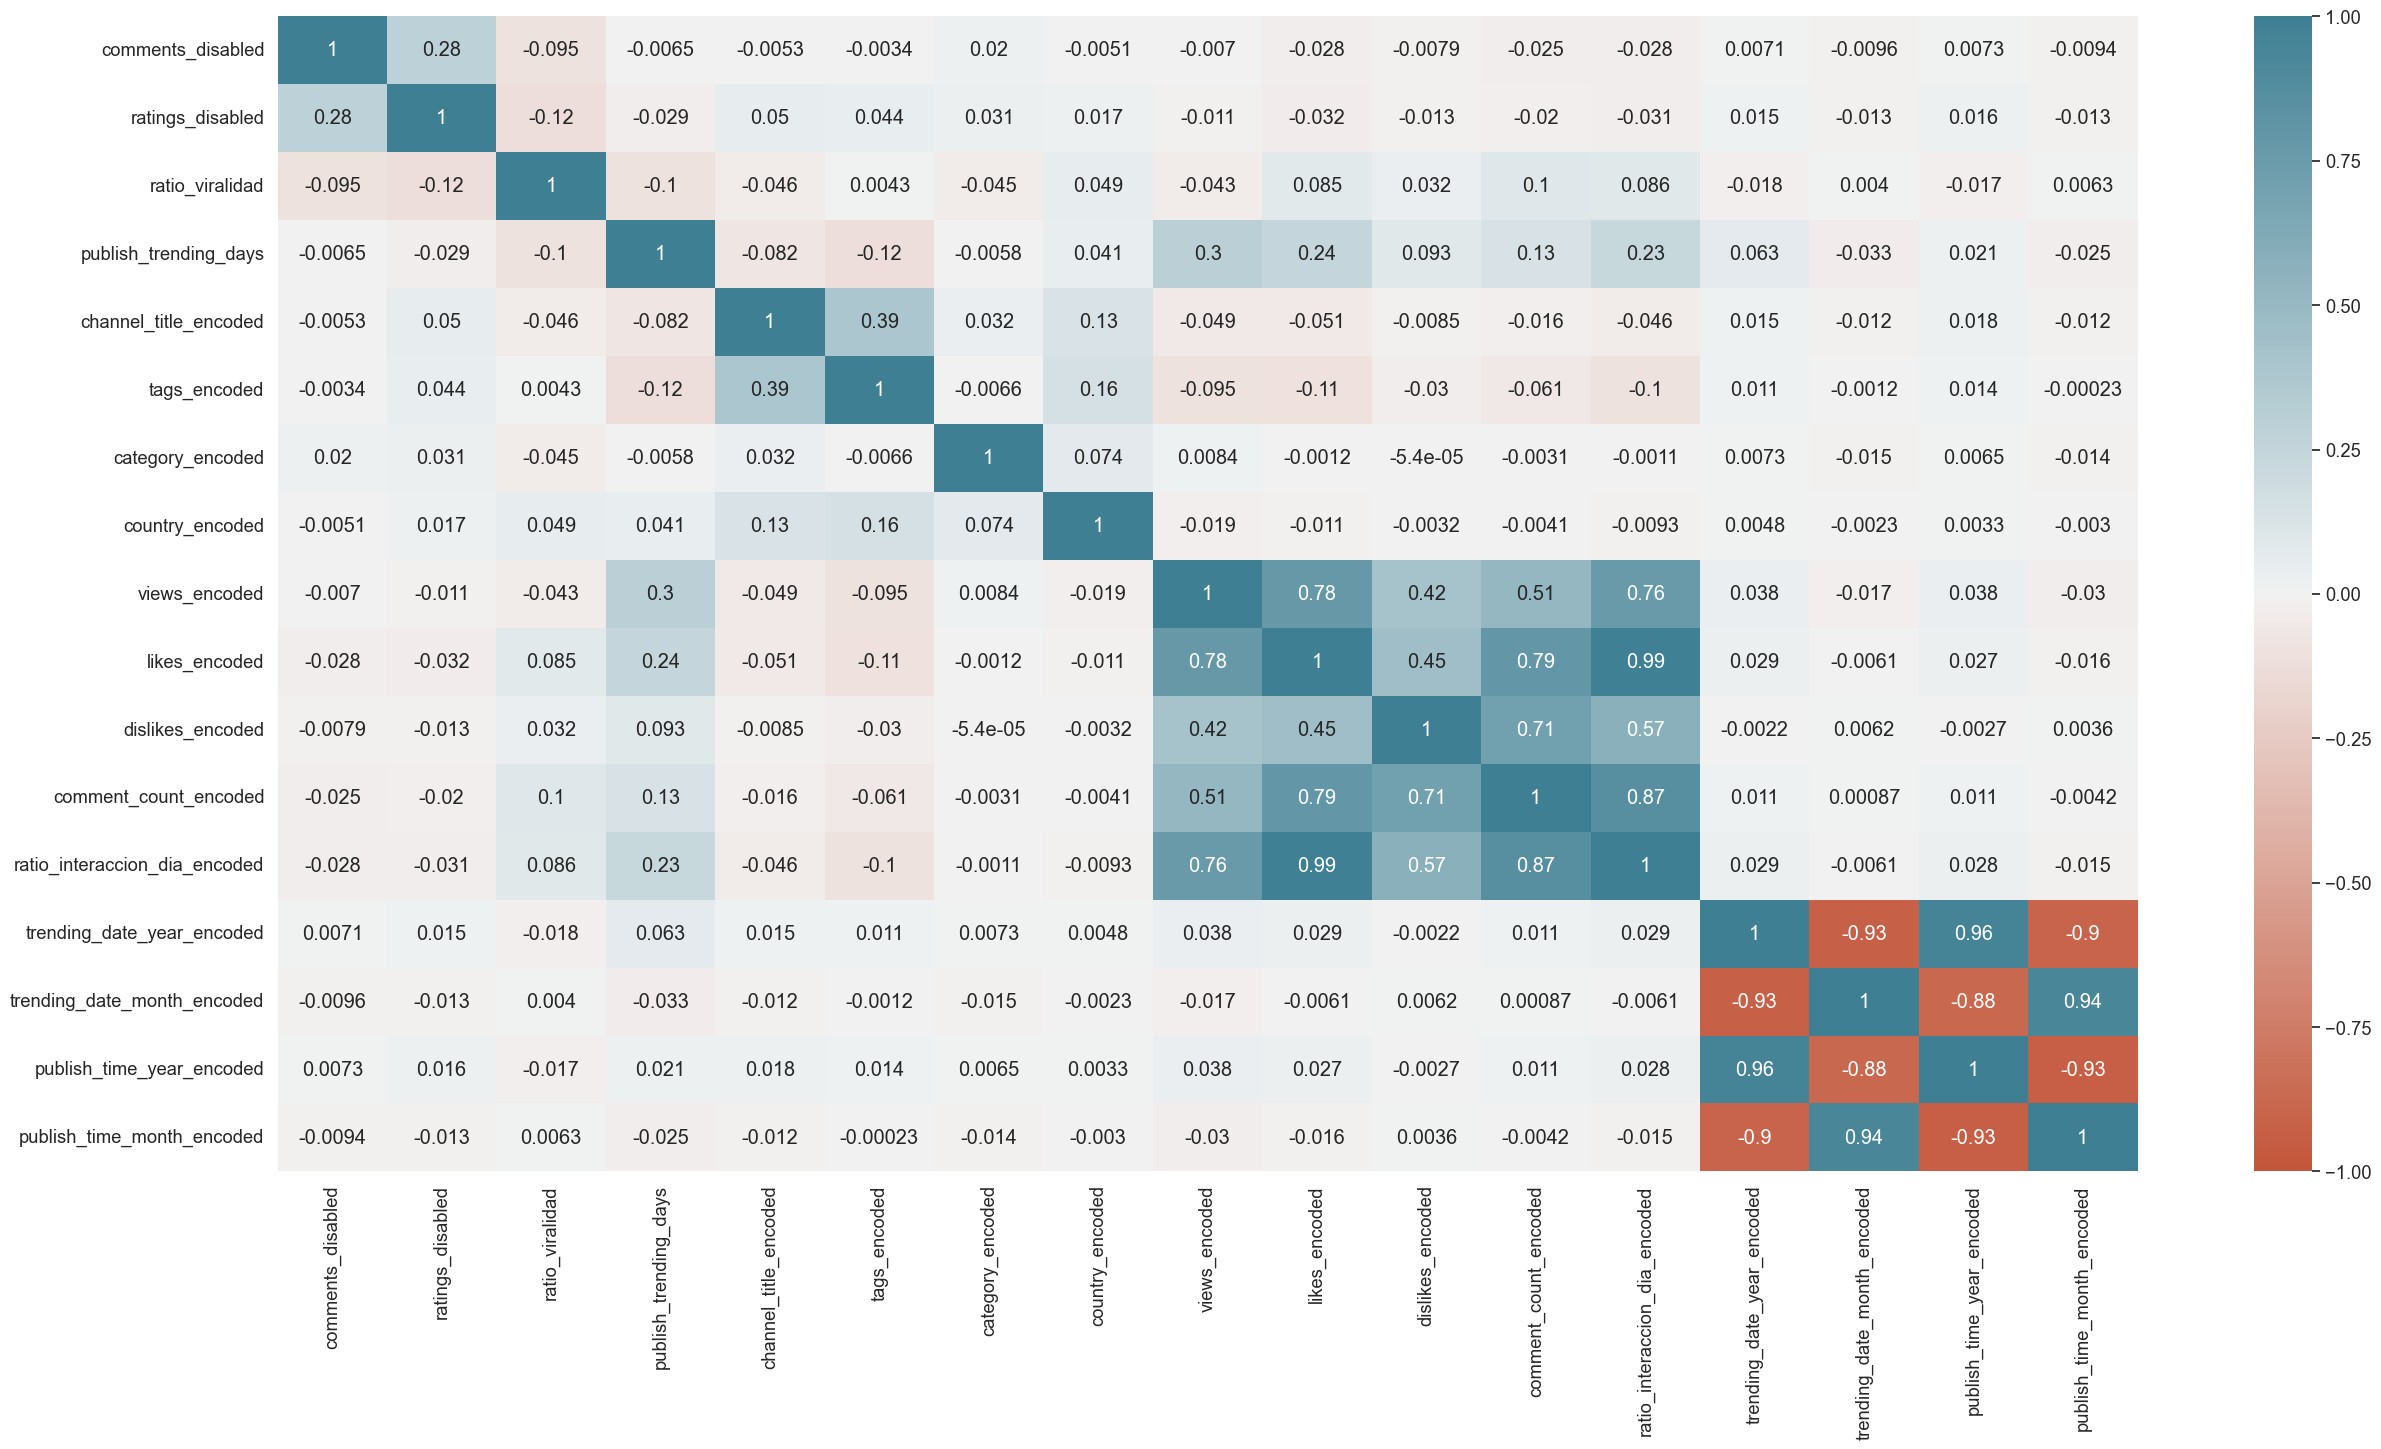

In [185]:
plt.figure(figsize=(30, 15))
sns.heatmap(corr_matrix.corr(), annot=True, cmap=sns.diverging_palette(20, 220, n=256), vmin=-1, vmax=1)
plt.show()

La matriz de correlación nos muestra la existencia de correlación lineal entre las variables numéricas views y likes, comment_count y likes y dislikes, y ratio_interaccion_dia y views, likes, dislikes y comment_count.<br>
Por otra parte, se muestra una correlación muy alta entre trending_date_year, trending_date_month, publish_time_year y publish_time_month.<br>
Por último, indicar que no hay correlación lineal entre las variables numéricas y las categóricas, como ya vimos.

# Guardar los datos

Guardamos en disco el dataset para emplearlo en los diferentes algoritmos de Machine Learning.

In [186]:
df_encoded.head()

trending_date                                              title  \
0    2017-11-14         Eminem - Walk On Water (Audio) ft. Beyoncé   
1    2017-11-14                      PLUSH - Bad Unboxing Fan Mail   
2    2017-11-14  Racist Superman | Rudy Mancuso, King Bach & Le...   
3    2017-11-14                           I Dare You: GOING BALD!?   
4    2017-11-14        Ed Sheeran - Perfect (Official Music Video)   

  channel_title        publish_time  \
0    EminemVEVO 2017-11-10 17:00:03   
1     iDubbbzTV 2017-11-13 17:00:00   
2  Rudy Mancuso 2017-11-12 19:05:24   
3      nigahiga 2017-11-12 18:01:41   
4    Ed Sheeran 2017-11-09 11:04:14   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count  comments_disabled  ...  country_encoded  \
0     43420         125882              False  ...                0   
1      1688          13030              False  ...                0   
2      5339           8181              False  ...                0   
3      1989          17518              False  ...                0   
4     21082          85067              False  ...                0   

  views_encoded likes_encoded dislikes_encoded  comment_count_encoded  \
0      2.195188      4.501606         1.803614               4.773962   
1     -0.046118      0.536588        -0.020748               0.342217   
2      0.256091      0.646234         0.138859               0.151795   
3      0.103985      0.563307        -0.007590               0.518462   
4      4.467192      9.591119         0.827083               3.171140   

   ratio_interaccion_dia_encoded trending_date_year_encoded  \
0                       4.334115                  -1.823782   
1                       0.455009                  -1.823782   
2                       0.536320                  -1.823782   
3                       0.499064                  -1.823782   
4                       8.064620                  -1.823782   

   trending_date_month_encoded  publish_time_year_encoded  \
0                     0.909091                  -1.758901   
1                     0.909091                  -1.758901   
2                     0.909091                  -1.758901   
3                     0.909091                  -1.758901   
4                     0.909091                  -1.758901   

   publish_time_month_encoded  
0                    0.909091  
1                    0.909091  
2                    0.909091  
3                    0.909091  
4                    0.909091  

[5 rows x 35 columns]

In [187]:
df_encoded.columns

Index(['trending_date', 'title', 'channel_title', 'publish_time', 'tags',
       'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled',
       'ratings_disabled', 'category', 'country', 'trending_date_str',
       'trending_date_year', 'trending_date_month', 'publish_time_str',
       'publish_time_year', 'publish_time_month', 'ratio_viralidad',
       'ratio_interaccion_dia', 'publish_trending_days',
       'channel_title_encoded', 'tags_encoded', 'category_encoded',
       'country_encoded', 'views_encoded', 'likes_encoded', 'dislikes_encoded',
       'comment_count_encoded', 'ratio_interaccion_dia_encoded',
       'trending_date_year_encoded', 'trending_date_month_encoded',
       'publish_time_year_encoded', 'publish_time_month_encoded'],
      dtype='object')

Antes de guardar en disco, vamos a eliminar las variables que no van a ser de utilidad.

In [188]:
df_encoded.drop(['trending_date', 'publish_time', 'trending_date_str', 'publish_time_str'], axis='columns', inplace=True)
df_encoded.columns

Index(['title', 'channel_title', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled', 'category',
       'country', 'trending_date_year', 'trending_date_month',
       'publish_time_year', 'publish_time_month', 'ratio_viralidad',
       'ratio_interaccion_dia', 'publish_trending_days',
       'channel_title_encoded', 'tags_encoded', 'category_encoded',
       'country_encoded', 'views_encoded', 'likes_encoded', 'dislikes_encoded',
       'comment_count_encoded', 'ratio_interaccion_dia_encoded',
       'trending_date_year_encoded', 'trending_date_month_encoded',
       'publish_time_year_encoded', 'publish_time_month_encoded'],
      dtype='object')

In [189]:
df_encoded.to_csv('..//data//processed//csv_eda.csv')